# DeepLabCut Toolbox
https://github.com/DeepLabCut/DeepLabCut

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.
This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

This notebook illustrates how to:
- create a project
- extract training frames
- label the frames
- plot the labeled images
- create a training set
- train a network
- evaluate a network
- analyze a novel video
- create an automatically labeled video 
- plot the trajectories

This notebook demonstrates the necessary steps to use DeepLabCut for your own project.

This shows the most simple code to do so, but many of the functions have additional features, so please check out the overview & the protocol paper!

Nath\*, Mathis\* et al.: Using DeepLabCut for markerless pose estimation during behavior across species. Nature Protocols, 2019.

Paper: https://www.nature.com/articles/s41596-019-0176-0

Pre-print: https://www.biorxiv.org/content/biorxiv/early/2018/11/24/476531.full.pdf

## Create a new project

It is always good idea to keep the projects separate if you want to use different networks to analze your data. You should use one project if you are tracking similar subjects/items even if in different environments. This function creates a new project with sub-directories and a basic configuration file in the user defined directory otherwise the project is created in the current working directory.

You can always add new videos (for lableing more data) to the project at any stage of the project. 

In [1]:
import deeplabcut

Loading DLC 2.2.1.1...


/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [ ]:
# task='Reaching' # Enter the name of your experiment Task
# experimenter='Mackenzie' # Enter the name of the experimenter
# video=['videos/video1.avi','videos/video2.avi'] # Enter the paths of your videos OR FOLDER you want to grab frames from.

# path_config_file=deeplabcut.create_new_project(task,experimenter,video,copy_videos=True) 

#NOTE: The function returns the path, where your project is. 
#You could also enter this manually (e.g. if the project is already created and you want to pick up, where you stopped...)
#path_config_file = '/home/Mackenzie/Reaching/config.yaml' # Enter the path of the config file that was just created from the above step (check the folder)

## Now, go edit the config.yaml file that was created! 
Add your body part labels, edit the number of frames to extract per video, etc. 

#### Note that you can see more information about ANY function by adding a ? at the end,  i.e. 

In [2]:
# deeplabcut.extract_frames?

## Extract frames from videos 
A key point for a successful feature detector is to select diverse frames, which are typical for the behavior you study that should be labeled.

This function selects N frames either uniformly sampled from a particular video (or folder) ('uniform'). Note: this might not yield diverse frames, if the behavior is sparsely distributed (consider using kmeans), and/or select frames manually etc.

Also make sure to get select data from different (behavioral) sessions and different animals if those vary substantially (to train an invariant feature detector).

Individual images should not be too big (i.e. < 850 x 850 pixel). Although this can be taken care of later as well, it is advisable to crop the frames, to remove unnecessary parts of the frame as much as possible.

Always check the output of cropping. If you are happy with the results proceed to labeling.

In [ ]:
# %matplotlib inline
#there are other ways to grab frames, such as uniformly; please see the paper:

#AUTOMATIC:
# deeplabcut.extract_frames(path_config_file) 

In [ ]:
#AND/OR:
#SELECT RARE EVENTS MANUALLY:
# %gui wx
# deeplabcut.extract_frames(path_config_file,'manual')

## Label the extracted frames

Only videos in the config file can be used to extract the frames. Extracted labels for each video are stored in the project directory under the subdirectory **'labeled-data'**. Each subdirectory is named after the name of the video. The toolbox has a labeling toolbox which could be used for labeling. 

In [ ]:
# %gui wx
# deeplabcut.label_frames(path_config_file)

## Check the labels

[OPTIONAL] Checking if the labels were created and stored correctly is beneficial for training, since labeling is one of the most critical parts for creating the training dataset. The DeepLabCut toolbox provides a function `check\_labels'  to do so. It is used as follows:

In [ ]:
# deeplabcut.check_labels(path_config_file) #this creates a subdirectory with the frames + your labels

If the labels need adjusted, you can use relauch the labeling GUI to move them around, save, and re-plot!

## Load config file

In [5]:
path_config_file = '/mnt/sdb2/DeepDraw/DLC_project/20220801_DP02_mri-YH-2022-08-22/config.yaml'

## Create a training dataset

This function generates the training data information for network training based on the pandas dataframes that hold label information. The user can set the fraction of the training set size (from all labeled image in the hd5 file) in the config.yaml file. While creating the dataset, the user can create multiple shuffles if they want to benchmark the performance (typcailly, 1 is what you will set, so you pass nothing!). 

After running this script the training dataset is created and saved in the project directory under the subdirectory **'training-datasets'**

This function also creates new subdirectories under **dlc-models** and appends the project config.yaml file with the correct path to the training and testing pose configuration file. These files hold the parameters for training the network. Such an example file is provided with the toolbox and named as **pose_cfg.yaml**. For most all use cases we have seen, the defaults are perfectly fine.

Now it is the time to start training the network!

In [3]:
deeplabcut.create_training_dataset(path_config_file)
#remember, there are several networks you can pick, the default is resnet-50!

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([ 48,  94,  95,   8,  97,  22,   7,  10,  45,  89,  33,  50,   2,
           60, 119,  74,  30,  43, 111,  76,  63,  59,  16,  24, 110,  13,
           54,  93,  26,  68,  51, 113, 107,  61,   3,  96,   6,  75, 100,
           91, 104,  84,  90,  66,  27,  18,  99,  11,  62,  71,  56,  98,
           86,   1,  73,  42,  41,   4,  15,  17,  52,  40,  38,   5,  53,
          109, 114,   0,  34,  28,  55,  35,  23,  31,  78,  57,  92, 102,
           32, 101,  14,  85,  19,  29,  49,  82, 116, 118,  79,  69,  80,
           20, 112,  72,  77,  25,  37,  81, 105,  46, 108,  39,  65,  58,
           12, 106,  88,  70,  87,  36,  21,  83,   9, 103]),
   array([115,  67,  64, 117,  47,  44])))]

## Start training:

This function trains the network for a specific shuffle of the training dataset. 

In [ ]:
# os.system("rm finished_file.p")
deeplabcut.train_network(path_config_file, shuffle=1, trainingsetindex=0, gputouse=1, max_snapshots_to_keep=50, displayiters=100, saveiters=600, maxiters=30000)
# pickle.dump(open("finished_file.p"), '')

Config:
{'all_joints': [[0],
                [1],
                [2],
                [3],
                [4],
                [5],
                [6],
                [7],
                [8],
                [9],
                [10],
                [11],
                [12],
                [13],
                [14],
                [15],
                [16],
                [17],
                [18],
                [19]],
 'all_joints_names': ['ha',
                      'hb',
                      'hc',
                      'hd',
                      'sa',
                      'sb',
                      'sc',
                      'sd',
                      'ea',
                      'eb',
                      'ec',
                      'ed',
                      'wa',
                      'wb',
                      'wc',
                      'wd',
                      'ta',
                      'tb',
                      'tc',
                      'td'],


Selecting single-animal trainer
Batch Size is 1


/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)
2022-08-31 15:52:50.417950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:52:50.423010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NU

Loading ImageNet-pretrained resnet_50


2022-08-31 15:52:51.081000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:52:51.081280: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:52:51.081468: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:52:51.081695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 15:52:51.081883: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

Max_iters overwritten as 30000
Display_iters overwritten as 100
Save_iters overwritten as 600
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/mnt/sdb2/DeepDraw/DLC_project/20220801_DP02_mri-YH-2022-08-22/dlc-models/iteration-0/20220801_DP02_mriAug22-trainset95shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'default', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2]

2022-08-31 15:52:54.855309: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2022-08-31 15:52:55.679732: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
iteration: 100 loss: 0.0937 lr: 0.005
iteration: 200 loss: 0.0276 lr: 0.005
iteration: 300 loss: 0.0261 lr: 0.005
iteration: 400 loss: 0.0287 lr: 0.005
iteration: 500 loss: 0.0229 lr: 0.005
iteration: 600 loss: 0.0232 lr: 0.005
iteration: 700 loss: 0.0257 lr: 0.005
iteration: 800 loss: 0.0213 lr: 0.005
iteration: 900 loss: 0.0192 lr: 0.005
iteration: 1000 loss: 0.0209 lr: 0.005
iteration: 1100 loss: 0.0167 lr: 0.005
iteration: 1200 loss: 0.0182 lr: 0.005
iteration: 1300 loss: 0.0172 lr: 0.005
iteration: 1400 loss: 0.0165 lr: 0.005
iteration: 1500 loss: 0.0171 lr: 0.005
iteration: 1600 loss: 0.0148 lr: 0.005
iteration: 1700 loss: 0.0158 lr: 0.005
iteration: 1800 loss: 0.0147 lr: 0.005
iteration: 1900 loss: 0.0147 lr: 0.005
iteration: 2000 loss:

## Start evaluating
This function evaluates a trained model for a specific shuffle/shuffles at a particular state or all the states on the data set (images)
and stores the results as .csv file in a subdirectory under **evaluation-results**

Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_600  with # of training iterations: 600


/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running evaluation ...


120it [00:26,  4.59it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:880: RuntimeWarning: Mean of empty slice
  testerrorpcutoff = np.nanmean(
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:883: RuntimeWarning: Mean of empty slice
  trainerrorpcutoff = np.nanmean(


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-600
Results for 600  training iterations: 95 1 train error: 218.21 pixels. Test error: 234.29  pixels.
With pcutoff of 0.6  train error: nan pixels. Test error: nan pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:47<00:00,  2.54it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_1200  with # of training iterations: 1200
Running evaluation ...


120it [00:25,  4.65it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:880: RuntimeWarning: Mean of empty slice
  testerrorpcutoff = np.nanmean(
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/core/evaluate.py:883: RuntimeWarning: Mean of empty slice
  trainerrorpcutoff = np.nanmean(


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1200
Results for 1200  training iterations: 95 1 train error: 197.66 pixels. Test error: 214.67  pixels.
With pcutoff of 0.6  train error: nan pixels. Test error: nan pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.08it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_1800  with # of training iterations: 1800
Running evaluation ...


120it [00:05, 20.95it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1800
Results for 1800  training iterations: 95 1 train error: 114.88 pixels. Test error: 132.47  pixels.
With pcutoff of 0.6  train error: 4.51 pixels. Test error: 3.45 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_2400  with # of training iterations: 2400
Running evaluation ...


120it [00:05, 21.09it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-2400
Results for 2400  training iterations: 95 1 train error: 79.87 pixels. Test error: 90.42  pixels.
With pcutoff of 0.6  train error: 17.66 pixels. Test error: 45.98 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:42<00:00,  2.82it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_3000  with # of training iterations: 3000
Running evaluation ...


120it [00:18,  6.60it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-3000
Results for 3000  training iterations: 95 1 train error: 60.0 pixels. Test error: 62.41  pixels.
With pcutoff of 0.6  train error: 11.86 pixels. Test error: 5.98 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:40<00:00,  2.95it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_3600  with # of training iterations: 3600
Running evaluation ...


120it [00:05, 20.91it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-3600
Results for 3600  training iterations: 95 1 train error: 59.3 pixels. Test error: 66.32  pixels.
With pcutoff of 0.6  train error: 19.05 pixels. Test error: 18.77 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.10it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_4200  with # of training iterations: 4200
Running evaluation ...


120it [00:05, 20.56it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-4200
Results for 4200  training iterations: 95 1 train error: 49.67 pixels. Test error: 53.37  pixels.
With pcutoff of 0.6  train error: 4.51 pixels. Test error: 4.91 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.15it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_4800  with # of training iterations: 4800
Running evaluation ...


120it [00:05, 20.65it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-4800
Results for 4800  training iterations: 95 1 train error: 39.22 pixels. Test error: 36.3  pixels.
With pcutoff of 0.6  train error: 16.74 pixels. Test error: 17.6 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.05it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_5400  with # of training iterations: 5400
Running evaluation ...


120it [00:05, 21.77it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-5400
Results for 5400  training iterations: 95 1 train error: 33.16 pixels. Test error: 28.13  pixels.
With pcutoff of 0.6  train error: 5.26 pixels. Test error: 4.93 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.03it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_6000  with # of training iterations: 6000
Running evaluation ...


120it [00:17,  6.69it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-6000
Results for 6000  training iterations: 95 1 train error: 54.23 pixels. Test error: 56.64  pixels.
With pcutoff of 0.6  train error: 5.73 pixels. Test error: 4.65 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:43<00:00,  2.74it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_6600  with # of training iterations: 6600
Running evaluation ...


120it [00:17,  6.84it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-6600
Results for 6600  training iterations: 95 1 train error: 19.21 pixels. Test error: 15.61  pixels.
With pcutoff of 0.6  train error: 5.14 pixels. Test error: 5.23 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:42<00:00,  2.85it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_7200  with # of training iterations: 7200
Running evaluation ...


120it [00:20,  5.75it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-7200
Results for 7200  training iterations: 95 1 train error: 20.72 pixels. Test error: 15.23  pixels.
With pcutoff of 0.6  train error: 4.89 pixels. Test error: 4.45 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_7800  with # of training iterations: 7800
Running evaluation ...


120it [00:08, 14.47it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-7800
Results for 7800  training iterations: 95 1 train error: 26.03 pixels. Test error: 20.55  pixels.
With pcutoff of 0.6  train error: 4.63 pixels. Test error: 4.64 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.01it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_8400  with # of training iterations: 8400
Running evaluation ...


120it [00:05, 21.47it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-8400
Results for 8400  training iterations: 95 1 train error: 20.94 pixels. Test error: 11.79  pixels.
With pcutoff of 0.6  train error: 8.23 pixels. Test error: 9.02 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.19it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_9000  with # of training iterations: 9000
Running evaluation ...


120it [00:05, 22.26it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-9000
Results for 9000  training iterations: 95 1 train error: 14.98 pixels. Test error: 5.87  pixels.
With pcutoff of 0.6  train error: 5.18 pixels. Test error: 5.07 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:36<00:00,  3.28it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_9600  with # of training iterations: 9600
Running evaluation ...


120it [00:05, 22.14it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-9600
Results for 9600  training iterations: 95 1 train error: 18.34 pixels. Test error: 8.81  pixels.
With pcutoff of 0.6  train error: 5.45 pixels. Test error: 4.73 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.09it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_10200  with # of training iterations: 10200
Running evaluation ...


120it [00:09, 13.19it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10200
Results for 10200  training iterations: 95 1 train error: 16.05 pixels. Test error: 7.01  pixels.
With pcutoff of 0.6  train error: 6.56 pixels. Test error: 6.47 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.23it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_10800  with # of training iterations: 10800
Running evaluation ...


120it [00:05, 21.89it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-10800
Results for 10800  training iterations: 95 1 train error: 49.43 pixels. Test error: 40.15  pixels.
With pcutoff of 0.6  train error: 4.66 pixels. Test error: 4.47 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.23it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_11400  with # of training iterations: 11400
Running evaluation ...


120it [00:05, 21.54it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-11400
Results for 11400  training iterations: 95 1 train error: 18.12 pixels. Test error: 8.45  pixels.
With pcutoff of 0.6  train error: 4.7 pixels. Test error: 4.69 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_12000  with # of training iterations: 12000
Running evaluation ...


120it [00:05, 21.01it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-12000
Results for 12000  training iterations: 95 1 train error: 24.96 pixels. Test error: 11.86  pixels.
With pcutoff of 0.6  train error: 4.66 pixels. Test error: 4.65 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.16it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_12600  with # of training iterations: 12600
Running evaluation ...


120it [00:05, 20.52it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/utils/visualization.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(frameon=False, dpi=dpi)


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-12600
Results for 12600  training iterations: 95 1 train error: 28.32 pixels. Test error: 26.67  pixels.
With pcutoff of 0.6  train error: 4.69 pixels. Test error: 4.76 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:36<00:00,  3.24it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_13200  with # of training iterations: 13200
Running evaluation ...


120it [00:05, 21.17it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-13200
Results for 13200  training iterations: 95 1 train error: 16.23 pixels. Test error: 7.8  pixels.
With pcutoff of 0.6  train error: 4.35 pixels. Test error: 4.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.21it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_13800  with # of training iterations: 13800
Running evaluation ...


120it [00:05, 21.79it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-13800
Results for 13800  training iterations: 95 1 train error: 13.76 pixels. Test error: 8.35  pixels.
With pcutoff of 0.6  train error: 4.58 pixels. Test error: 4.72 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.21it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_14400  with # of training iterations: 14400
Running evaluation ...


120it [00:05, 21.36it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-14400
Results for 14400  training iterations: 95 1 train error: 11.83 pixels. Test error: 5.23  pixels.
With pcutoff of 0.6  train error: 4.99 pixels. Test error: 5.08 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.12it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_15000  with # of training iterations: 15000
Running evaluation ...


120it [00:05, 20.17it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-15000
Results for 15000  training iterations: 95 1 train error: 11.27 pixels. Test error: 5.06  pixels.
With pcutoff of 0.6  train error: 4.59 pixels. Test error: 4.81 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_15600  with # of training iterations: 15600
Running evaluation ...


120it [00:09, 13.04it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-15600
Results for 15600  training iterations: 95 1 train error: 9.1 pixels. Test error: 5.44  pixels.
With pcutoff of 0.6  train error: 5.11 pixels. Test error: 5.4 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_16200  with # of training iterations: 16200
Running evaluation ...


120it [00:11, 10.91it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-16200
Results for 16200  training iterations: 95 1 train error: 9.89 pixels. Test error: 5.13  pixels.
With pcutoff of 0.6  train error: 5.03 pixels. Test error: 4.99 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:45<00:00,  2.64it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_16800  with # of training iterations: 16800
Running evaluation ...


120it [00:12,  9.31it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-16800
Results for 16800  training iterations: 95 1 train error: 8.98 pixels. Test error: 5.0  pixels.
With pcutoff of 0.6  train error: 4.84 pixels. Test error: 5.03 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_17400  with # of training iterations: 17400
Running evaluation ...


120it [00:05, 20.67it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-17400
Results for 17400  training iterations: 95 1 train error: 8.72 pixels. Test error: 4.63  pixels.
With pcutoff of 0.6  train error: 4.51 pixels. Test error: 4.61 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.16it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_18000  with # of training iterations: 18000
Running evaluation ...


120it [00:05, 20.61it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-18000
Results for 18000  training iterations: 95 1 train error: 11.17 pixels. Test error: 4.45  pixels.
With pcutoff of 0.6  train error: 4.12 pixels. Test error: 4.29 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:40<00:00,  2.97it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_18600  with # of training iterations: 18600
Running evaluation ...


120it [00:05, 20.96it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-18600
Results for 18600  training iterations: 95 1 train error: 7.75 pixels. Test error: 4.64  pixels.
With pcutoff of 0.6  train error: 4.62 pixels. Test error: 4.62 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.24it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_19200  with # of training iterations: 19200
Running evaluation ...


120it [00:05, 20.41it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-19200
Results for 19200  training iterations: 95 1 train error: 7.96 pixels. Test error: 4.41  pixels.
With pcutoff of 0.6  train error: 4.16 pixels. Test error: 4.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.20it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_19800  with # of training iterations: 19800
Running evaluation ...


120it [00:06, 19.07it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-19800
Results for 19800  training iterations: 95 1 train error: 8.51 pixels. Test error: 5.12  pixels.
With pcutoff of 0.6  train error: 4.77 pixels. Test error: 5.06 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.01it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_20400  with # of training iterations: 20400
Running evaluation ...


120it [00:08, 14.67it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-20400
Results for 20400  training iterations: 95 1 train error: 9.06 pixels. Test error: 4.93  pixels.
With pcutoff of 0.6  train error: 4.96 pixels. Test error: 4.9 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.20it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_21000  with # of training iterations: 21000
Running evaluation ...


120it [00:05, 21.33it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-21000
Results for 21000  training iterations: 95 1 train error: 7.52 pixels. Test error: 4.2  pixels.
With pcutoff of 0.6  train error: 3.95 pixels. Test error: 4.2 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.14it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_21600  with # of training iterations: 21600
Running evaluation ...


120it [00:05, 20.80it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-21600
Results for 21600  training iterations: 95 1 train error: 6.85 pixels. Test error: 4.4  pixels.
With pcutoff of 0.6  train error: 4.45 pixels. Test error: 4.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.07it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_22200  with # of training iterations: 22200
Running evaluation ...


120it [00:05, 20.85it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-22200
Results for 22200  training iterations: 95 1 train error: 7.08 pixels. Test error: 4.4  pixels.
With pcutoff of 0.6  train error: 4.26 pixels. Test error: 4.36 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:39<00:00,  3.02it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_22800  with # of training iterations: 22800
Running evaluation ...


120it [00:07, 15.11it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-22800
Results for 22800  training iterations: 95 1 train error: 8.34 pixels. Test error: 5.18  pixels.
With pcutoff of 0.6  train error: 5.04 pixels. Test error: 5.15 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_23400  with # of training iterations: 23400
Running evaluation ...


120it [00:05, 21.57it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-23400
Results for 23400  training iterations: 95 1 train error: 7.24 pixels. Test error: 4.51  pixels.
With pcutoff of 0.6  train error: 4.36 pixels. Test error: 4.45 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.22it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_24000  with # of training iterations: 24000
Running evaluation ...


120it [00:05, 21.54it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-24000
Results for 24000  training iterations: 95 1 train error: 6.81 pixels. Test error: 5.06  pixels.
With pcutoff of 0.6  train error: 4.77 pixels. Test error: 5.04 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.11it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_24600  with # of training iterations: 24600
Running evaluation ...


120it [00:08, 13.61it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-24600
Results for 24600  training iterations: 95 1 train error: 7.33 pixels. Test error: 4.66  pixels.
With pcutoff of 0.6  train error: 4.34 pixels. Test error: 4.61 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:40<00:00,  2.98it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_25200  with # of training iterations: 25200
Running evaluation ...


120it [00:13,  8.85it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-25200
Results for 25200  training iterations: 95 1 train error: 6.67 pixels. Test error: 4.62  pixels.
With pcutoff of 0.6  train error: 4.25 pixels. Test error: 4.62 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:40<00:00,  3.00it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_25800  with # of training iterations: 25800
Running evaluation ...


120it [00:05, 21.52it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-25800
Results for 25800  training iterations: 95 1 train error: 5.66 pixels. Test error: 4.55  pixels.
With pcutoff of 0.6  train error: 4.26 pixels. Test error: 4.5 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.20it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_26400  with # of training iterations: 26400
Running evaluation ...


120it [00:06, 18.91it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-26400
Results for 26400  training iterations: 95 1 train error: 6.61 pixels. Test error: 4.55  pixels.
With pcutoff of 0.6  train error: 4.24 pixels. Test error: 4.45 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.21it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_27000  with # of training iterations: 27000
Running evaluation ...


120it [00:05, 21.19it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-27000
Results for 27000  training iterations: 95 1 train error: 5.96 pixels. Test error: 4.38  pixels.
With pcutoff of 0.6  train error: 4.23 pixels. Test error: 4.4 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.13it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_27600  with # of training iterations: 27600
Running evaluation ...


120it [00:13,  9.05it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-27600
Results for 27600  training iterations: 95 1 train error: 5.98 pixels. Test error: 4.31  pixels.
With pcutoff of 0.6  train error: 4.15 pixels. Test error: 4.27 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.20it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_28200  with # of training iterations: 28200
Running evaluation ...


120it [00:05, 20.63it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-28200
Results for 28200  training iterations: 95 1 train error: 5.91 pixels. Test error: 4.39  pixels.
With pcutoff of 0.6  train error: 4.25 pixels. Test error: 4.33 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:38<00:00,  3.15it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_28800  with # of training iterations: 28800
Running evaluation ...


120it [00:05, 21.00it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-28800
Results for 28800  training iterations: 95 1 train error: 5.85 pixels. Test error: 4.47  pixels.
With pcutoff of 0.6  train error: 4.28 pixels. Test error: 4.47 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:40<00:00,  2.97it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_29400  with # of training iterations: 29400
Running evaluation ...


120it [00:05, 20.59it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-29400
Results for 29400  training iterations: 95 1 train error: 6.17 pixels. Test error: 5.11  pixels.
With pcutoff of 0.6  train error: 4.75 pixels. Test error: 5.06 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.16it/s]
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/home/yunho/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tf_slim/layers/layers.py:684: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  outputs = layer.apply(inputs, training=is_training)


Running  DLC_resnet50_20220801_DP02_mriAug22shuffle1_30000  with # of training iterations: 30000
Running evaluation ...


120it [00:06, 19.96it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-30000
Results for 30000  training iterations: 95 1 train error: 5.86 pixels. Test error: 4.32  pixels.
With pcutoff of 0.6  train error: 4.0 pixels. Test error: 4.24 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 120/120 [00:37<00:00,  3.17it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


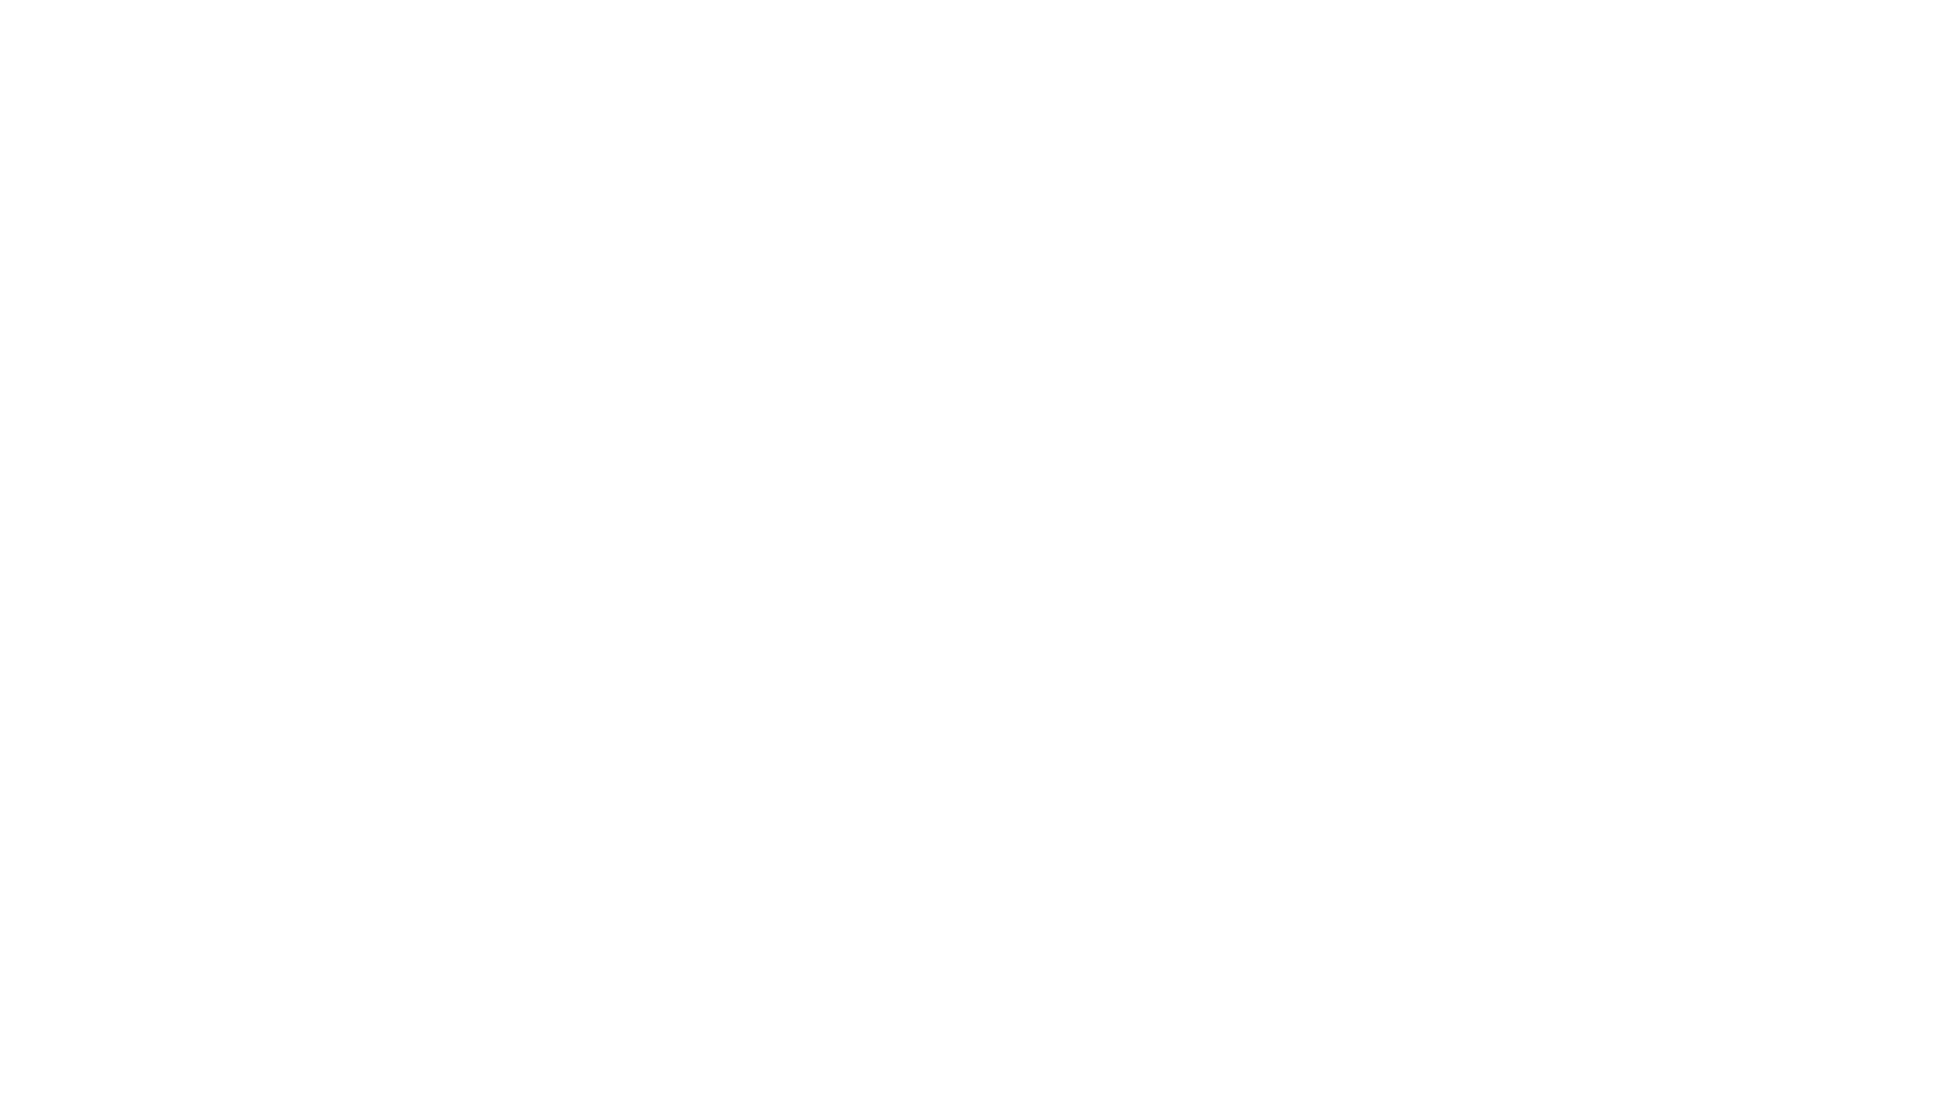

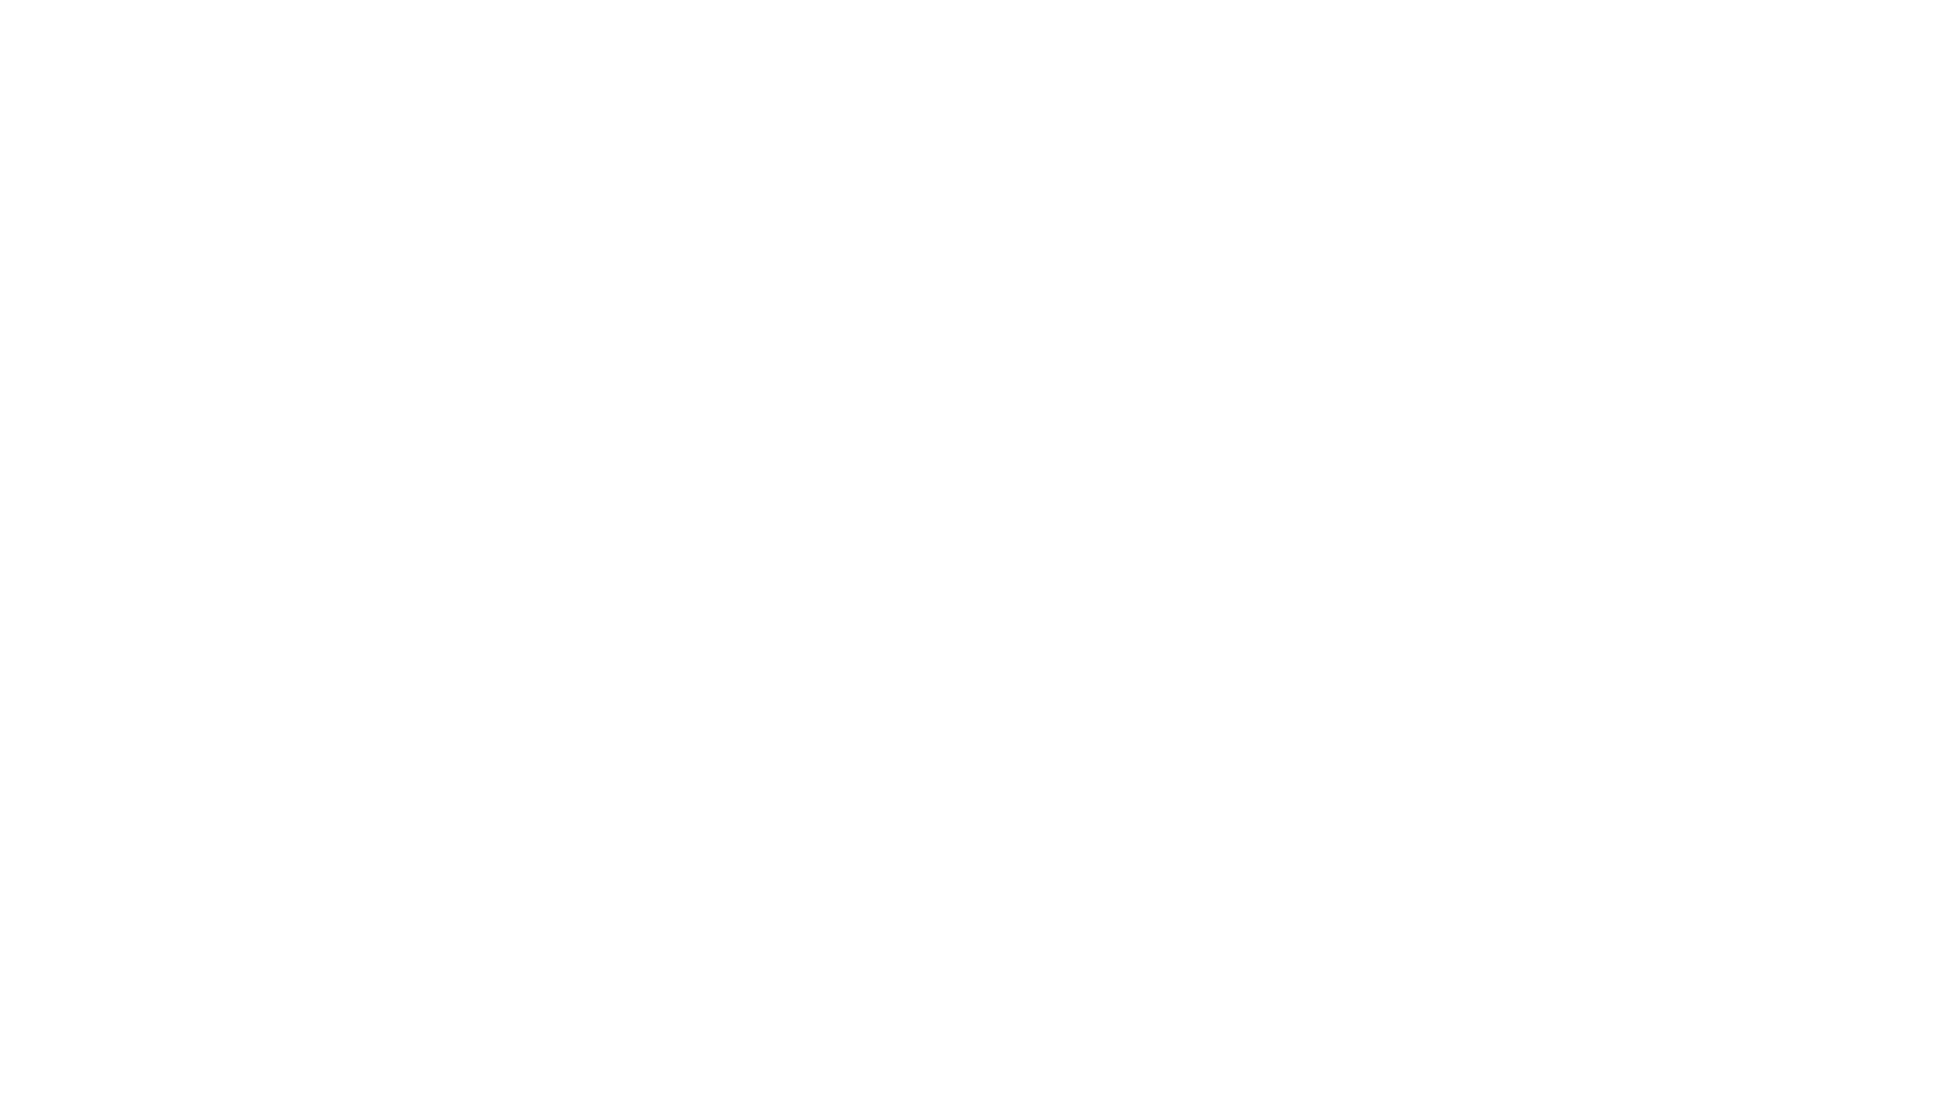

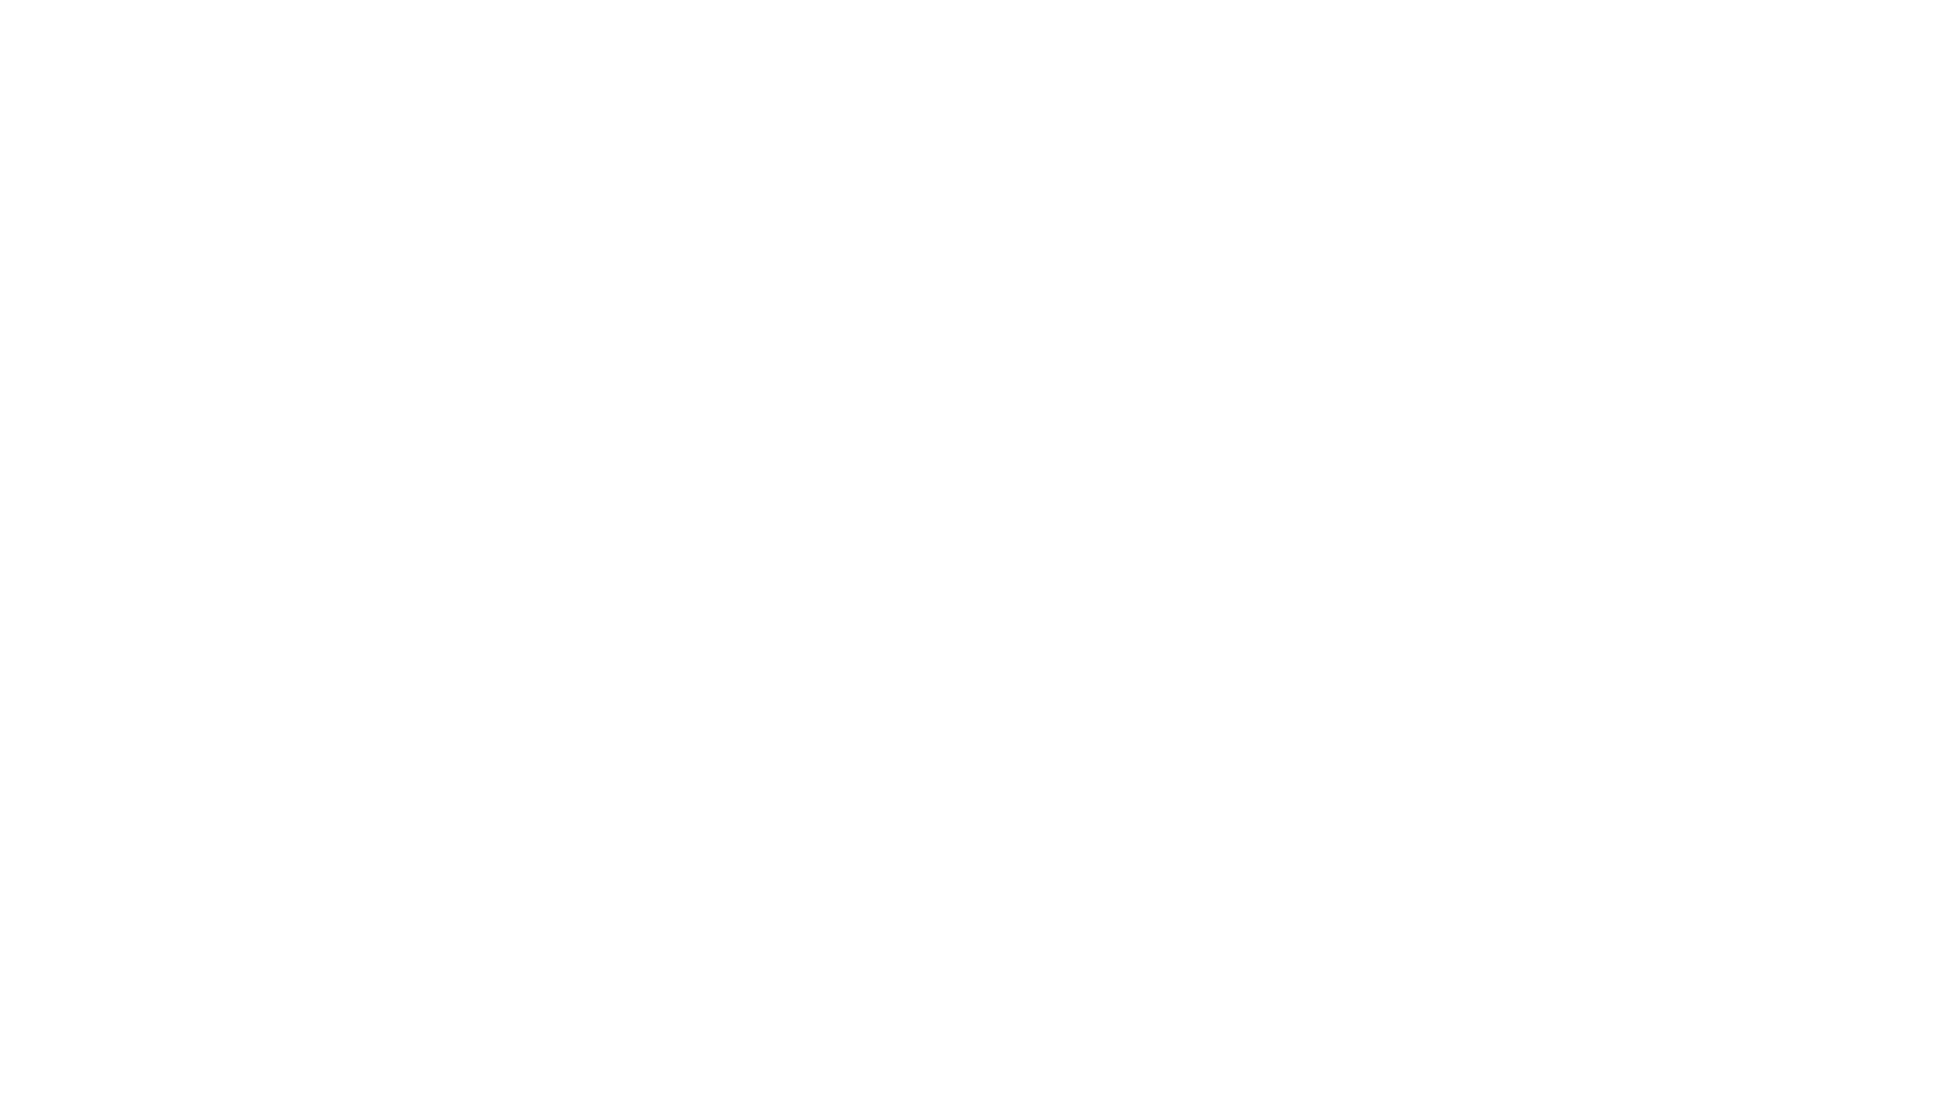

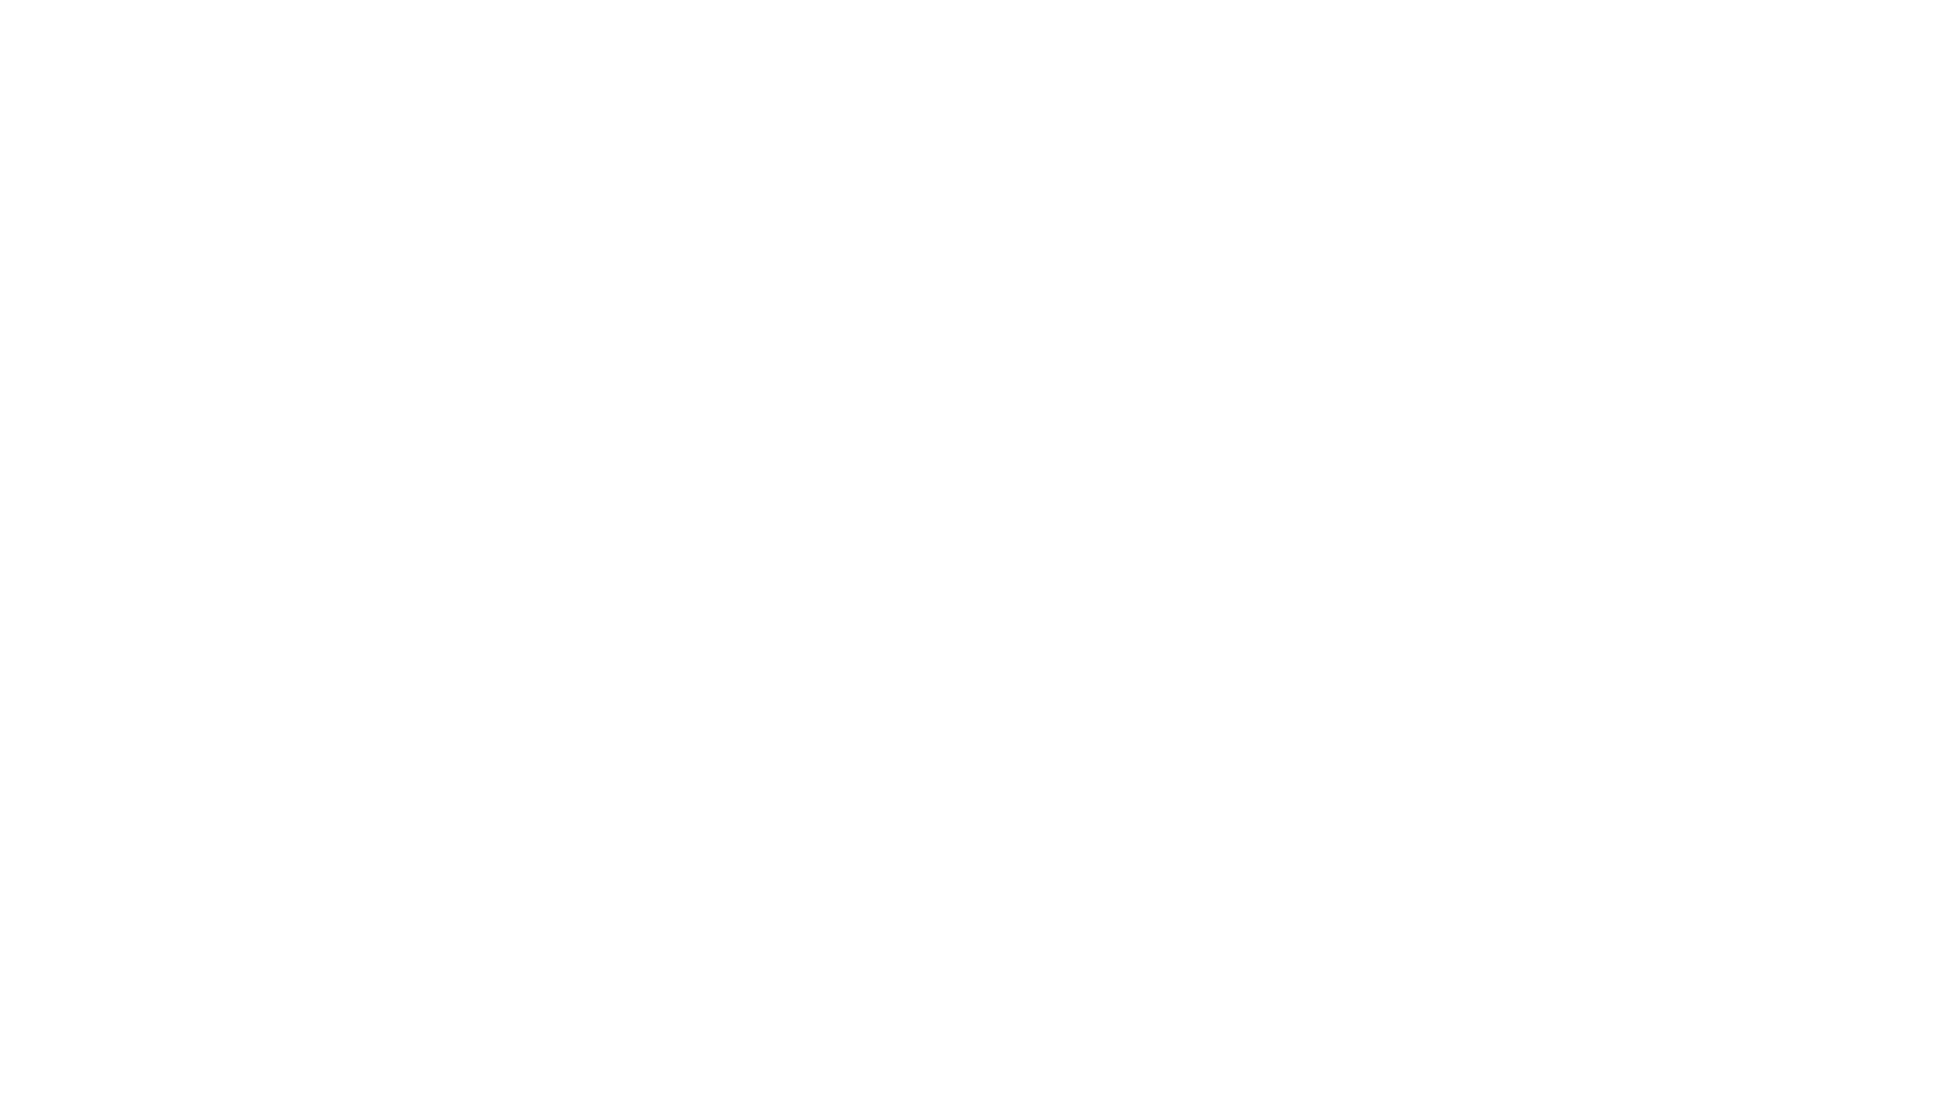

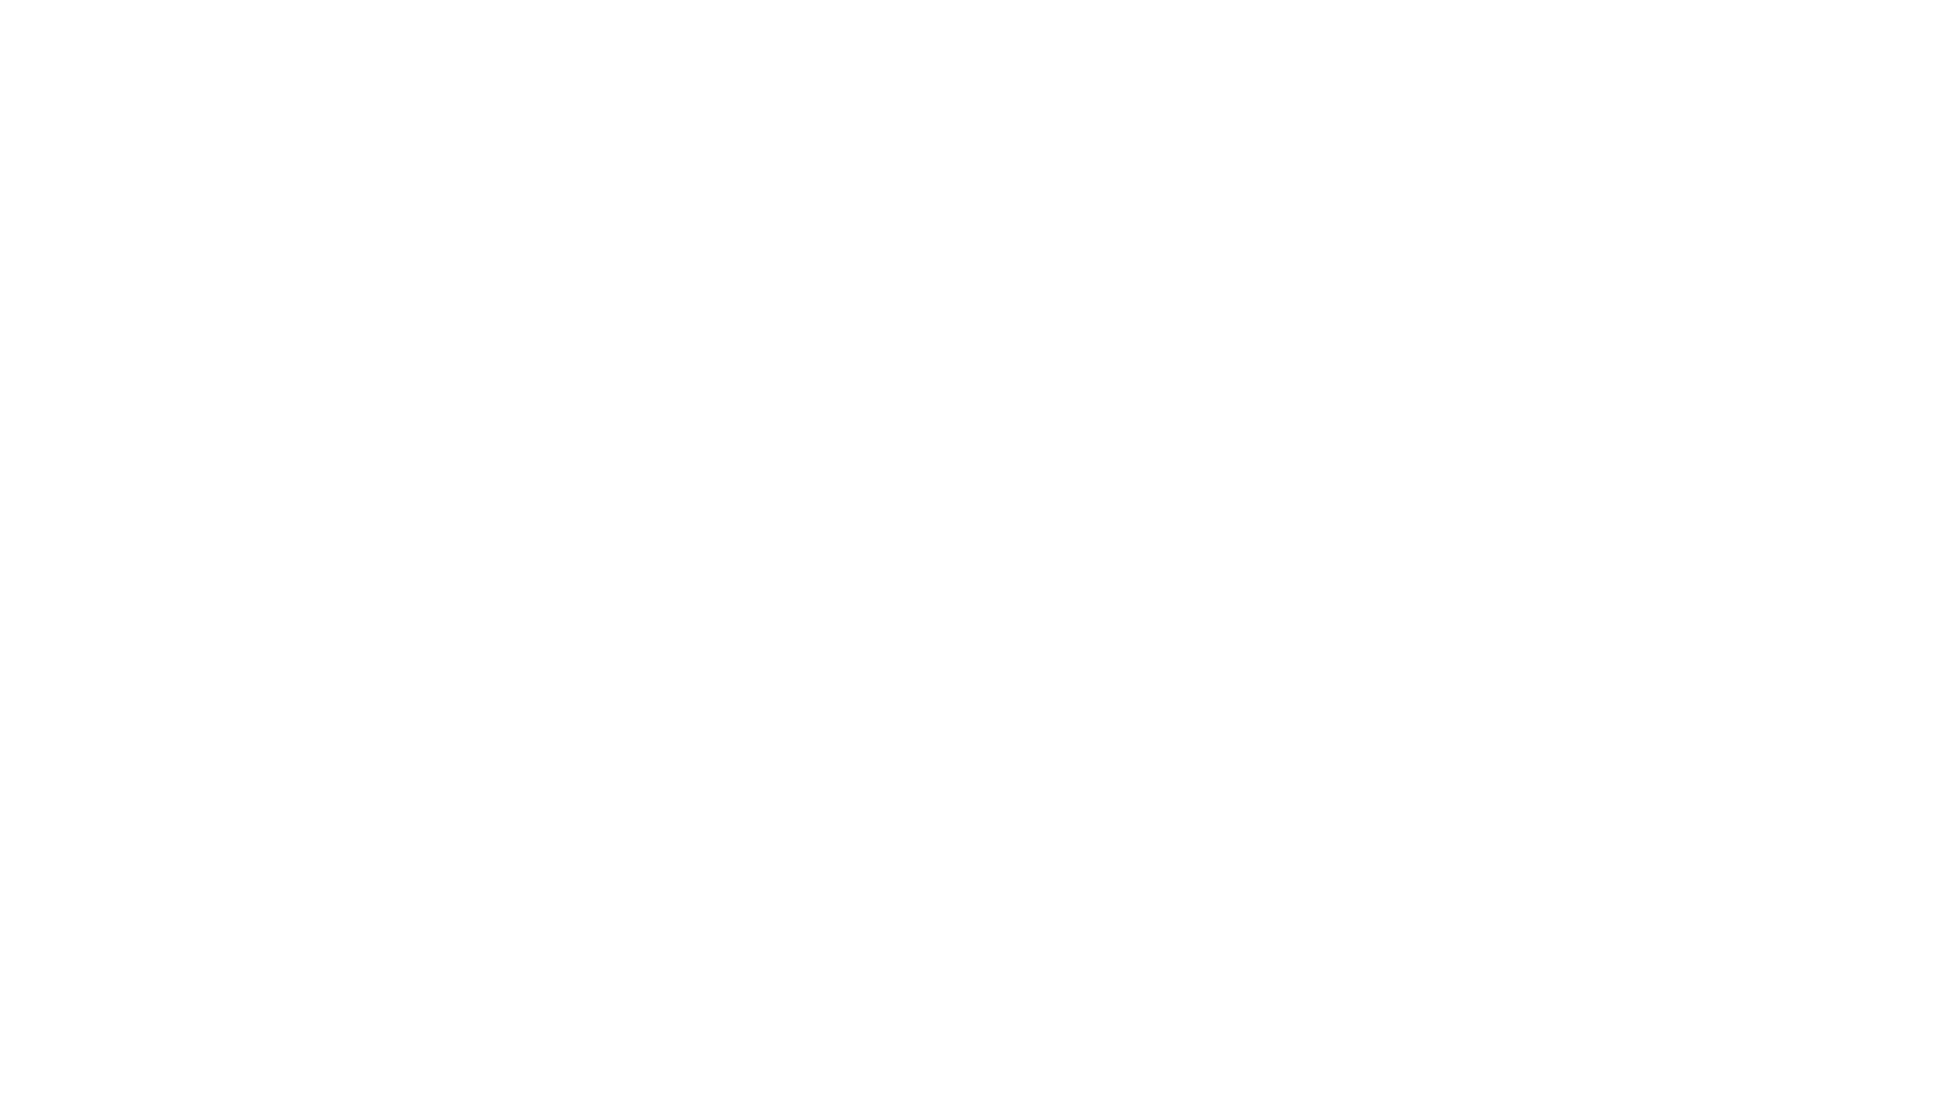

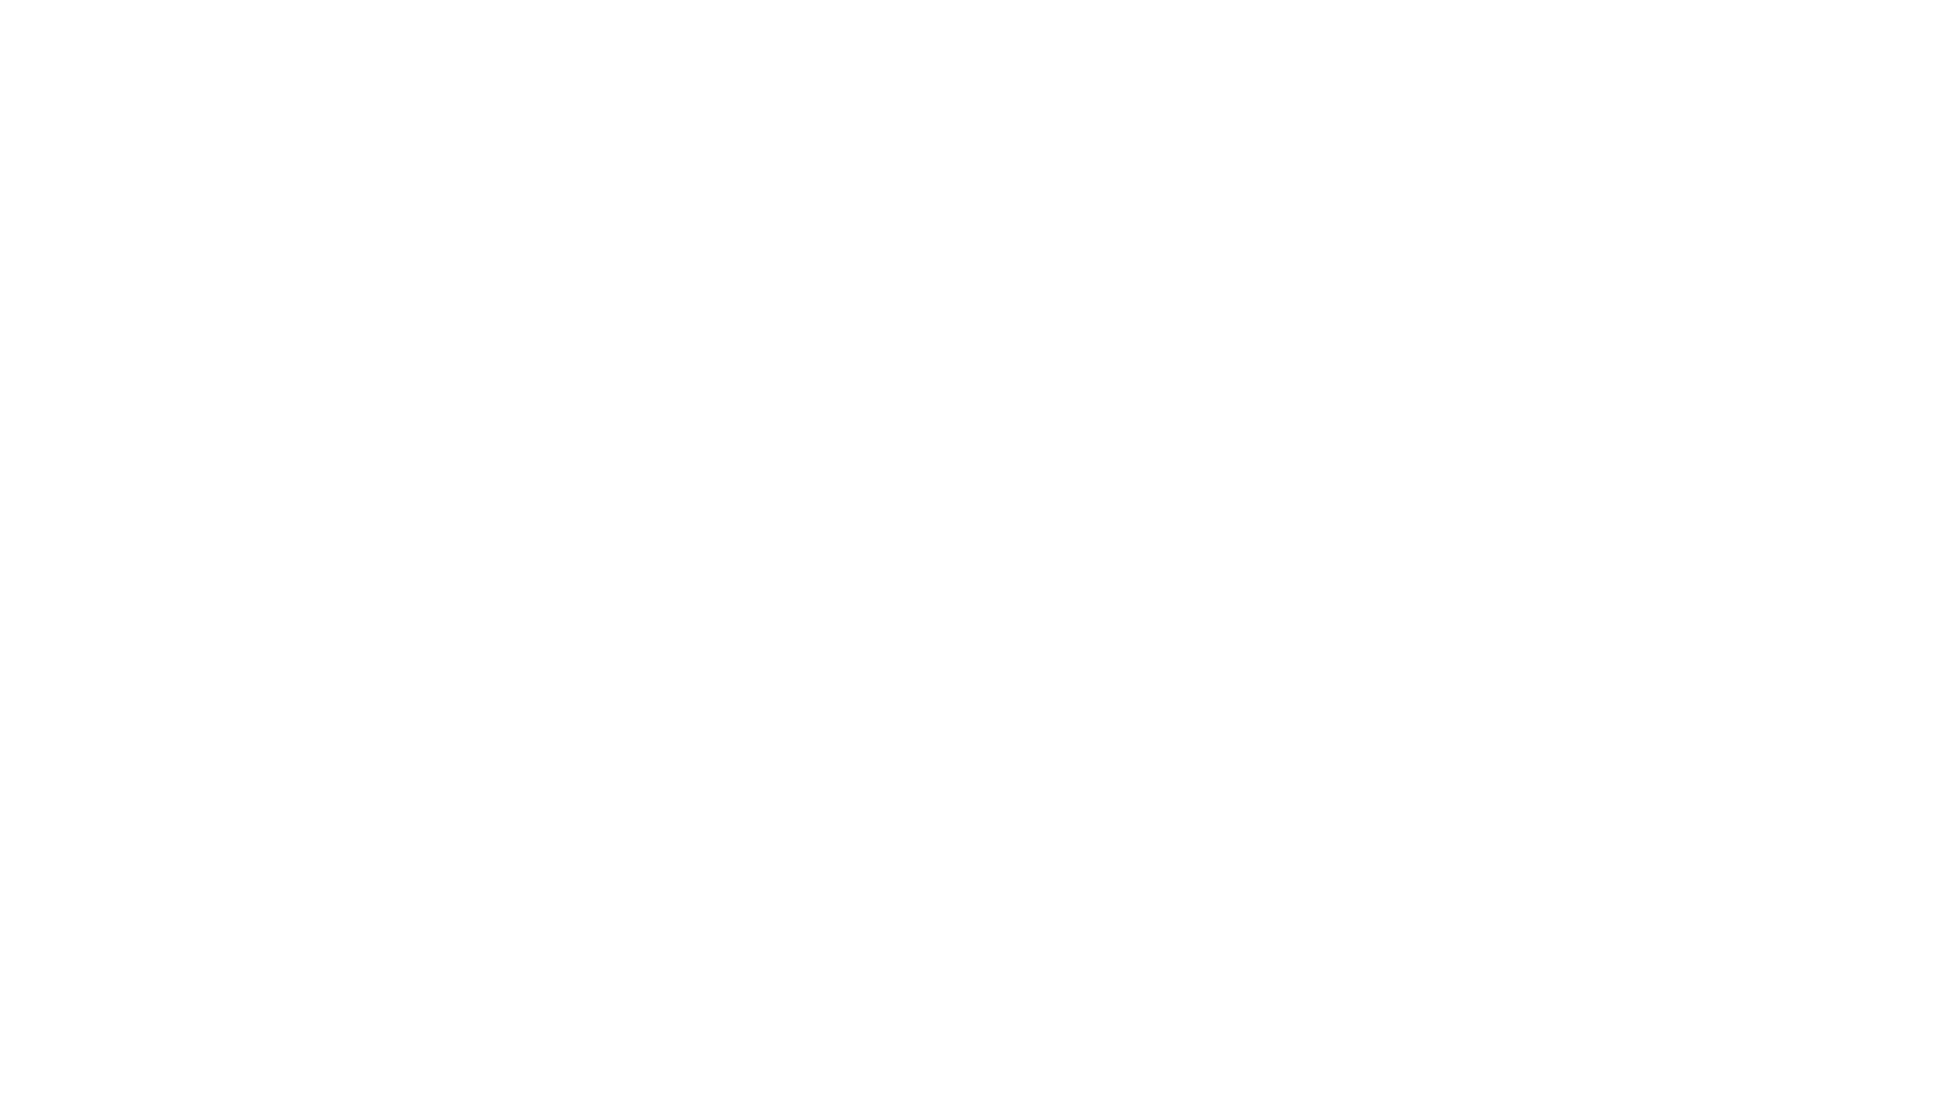

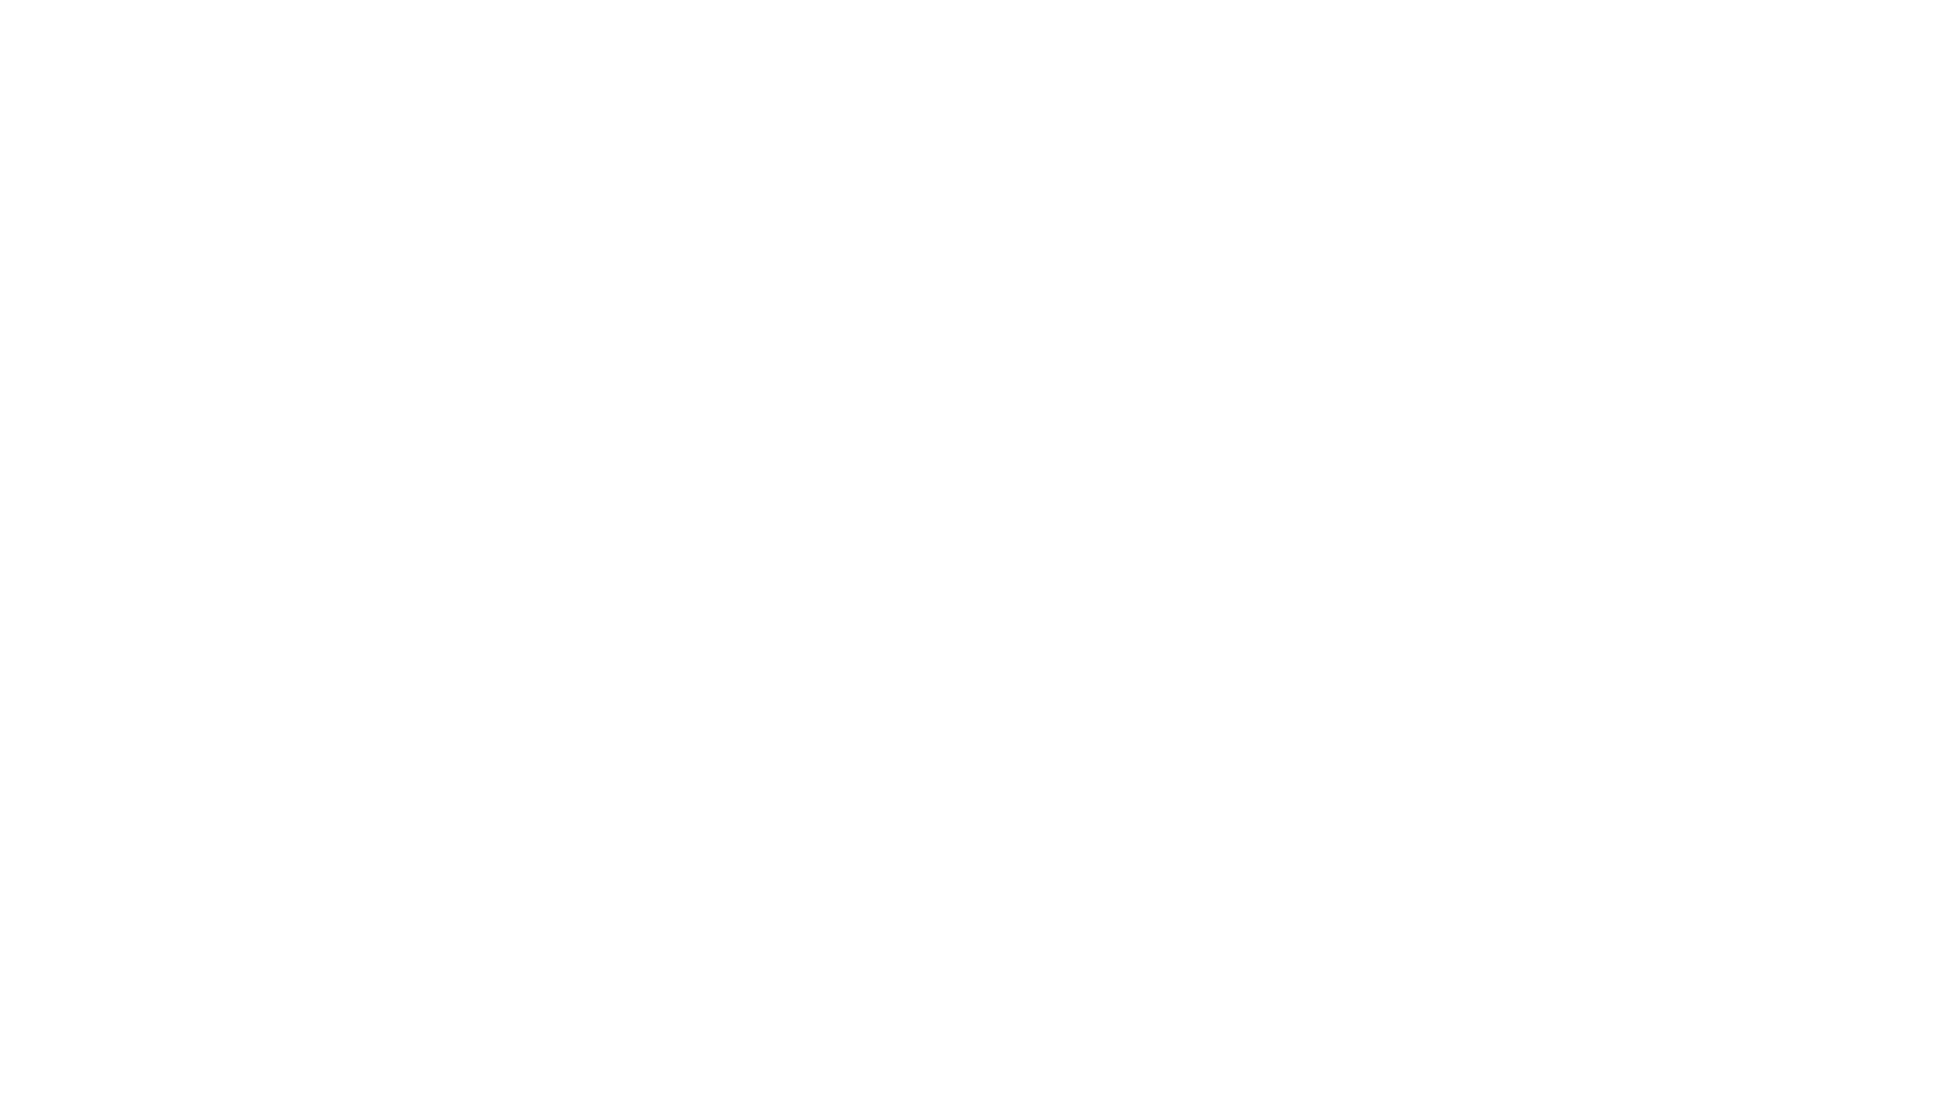

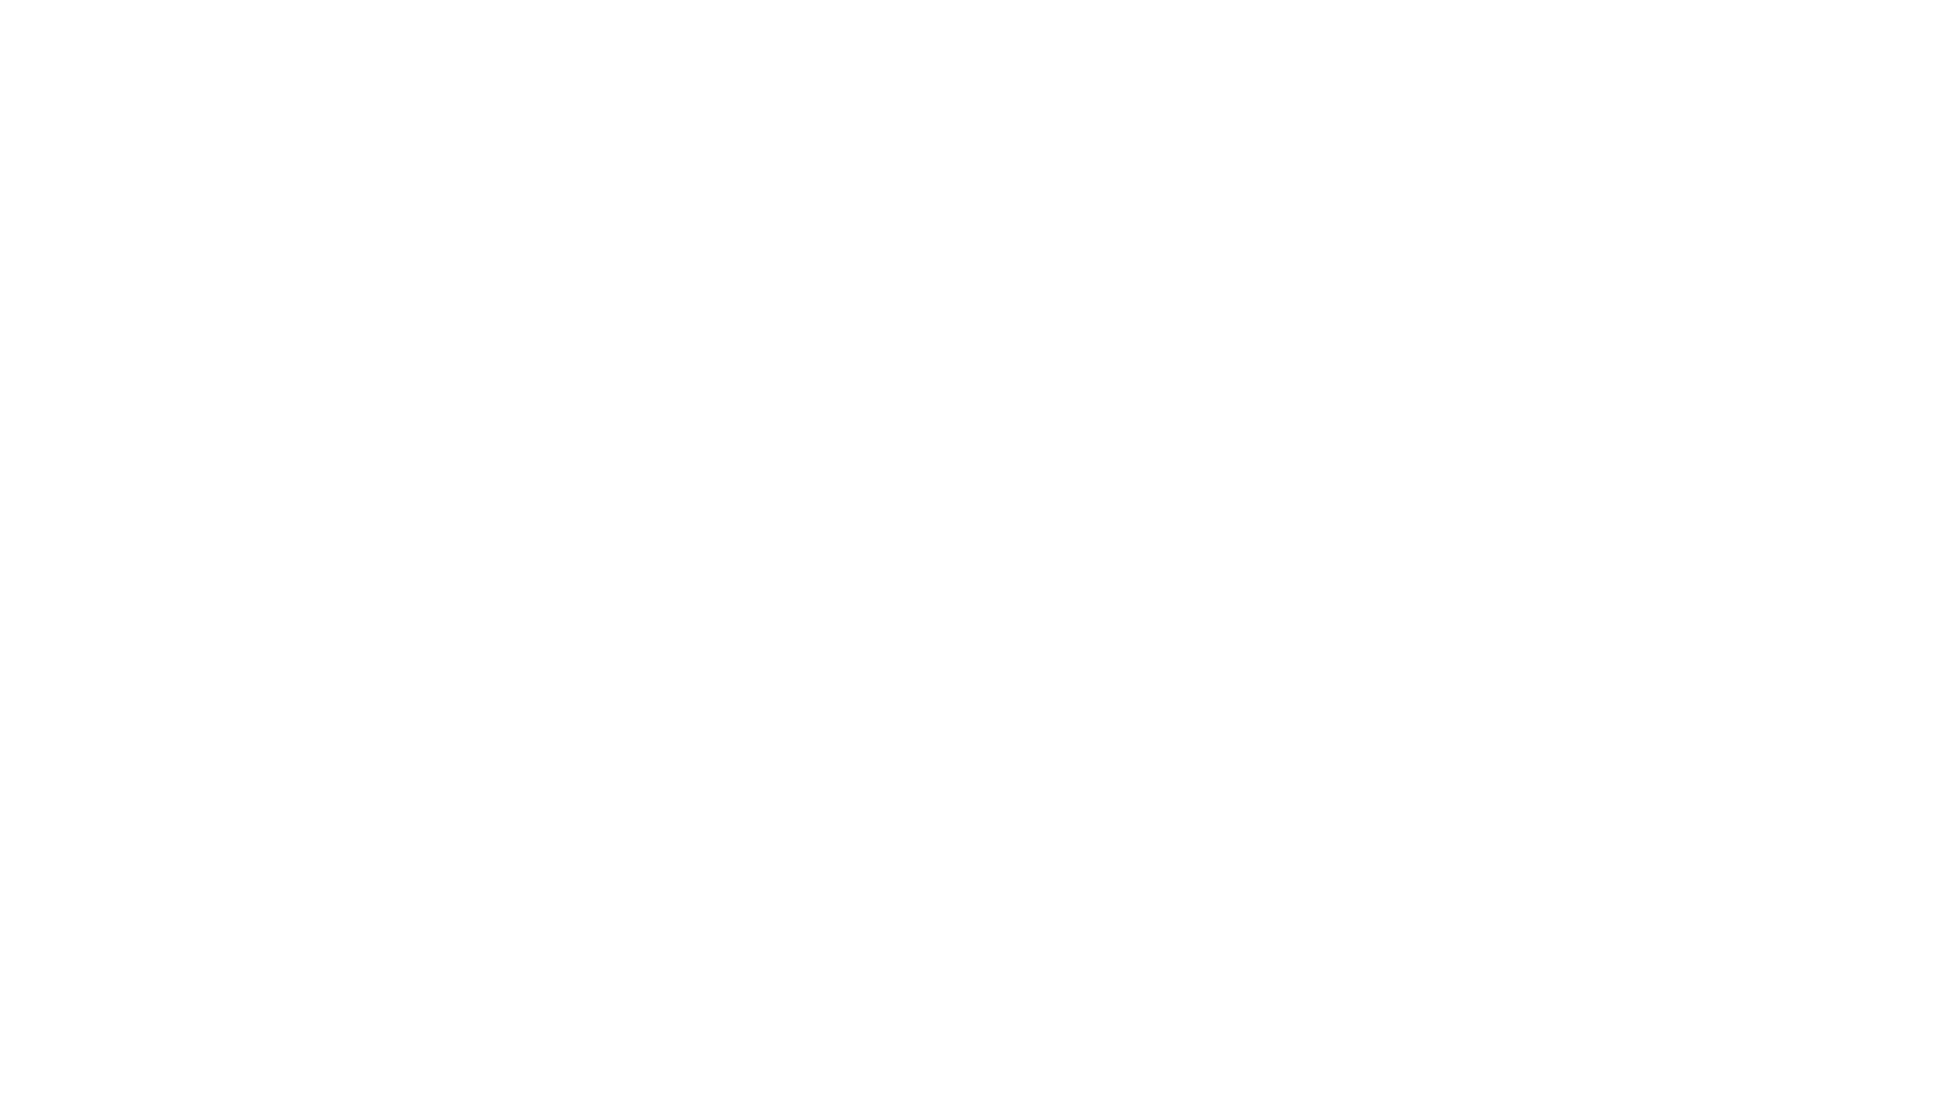

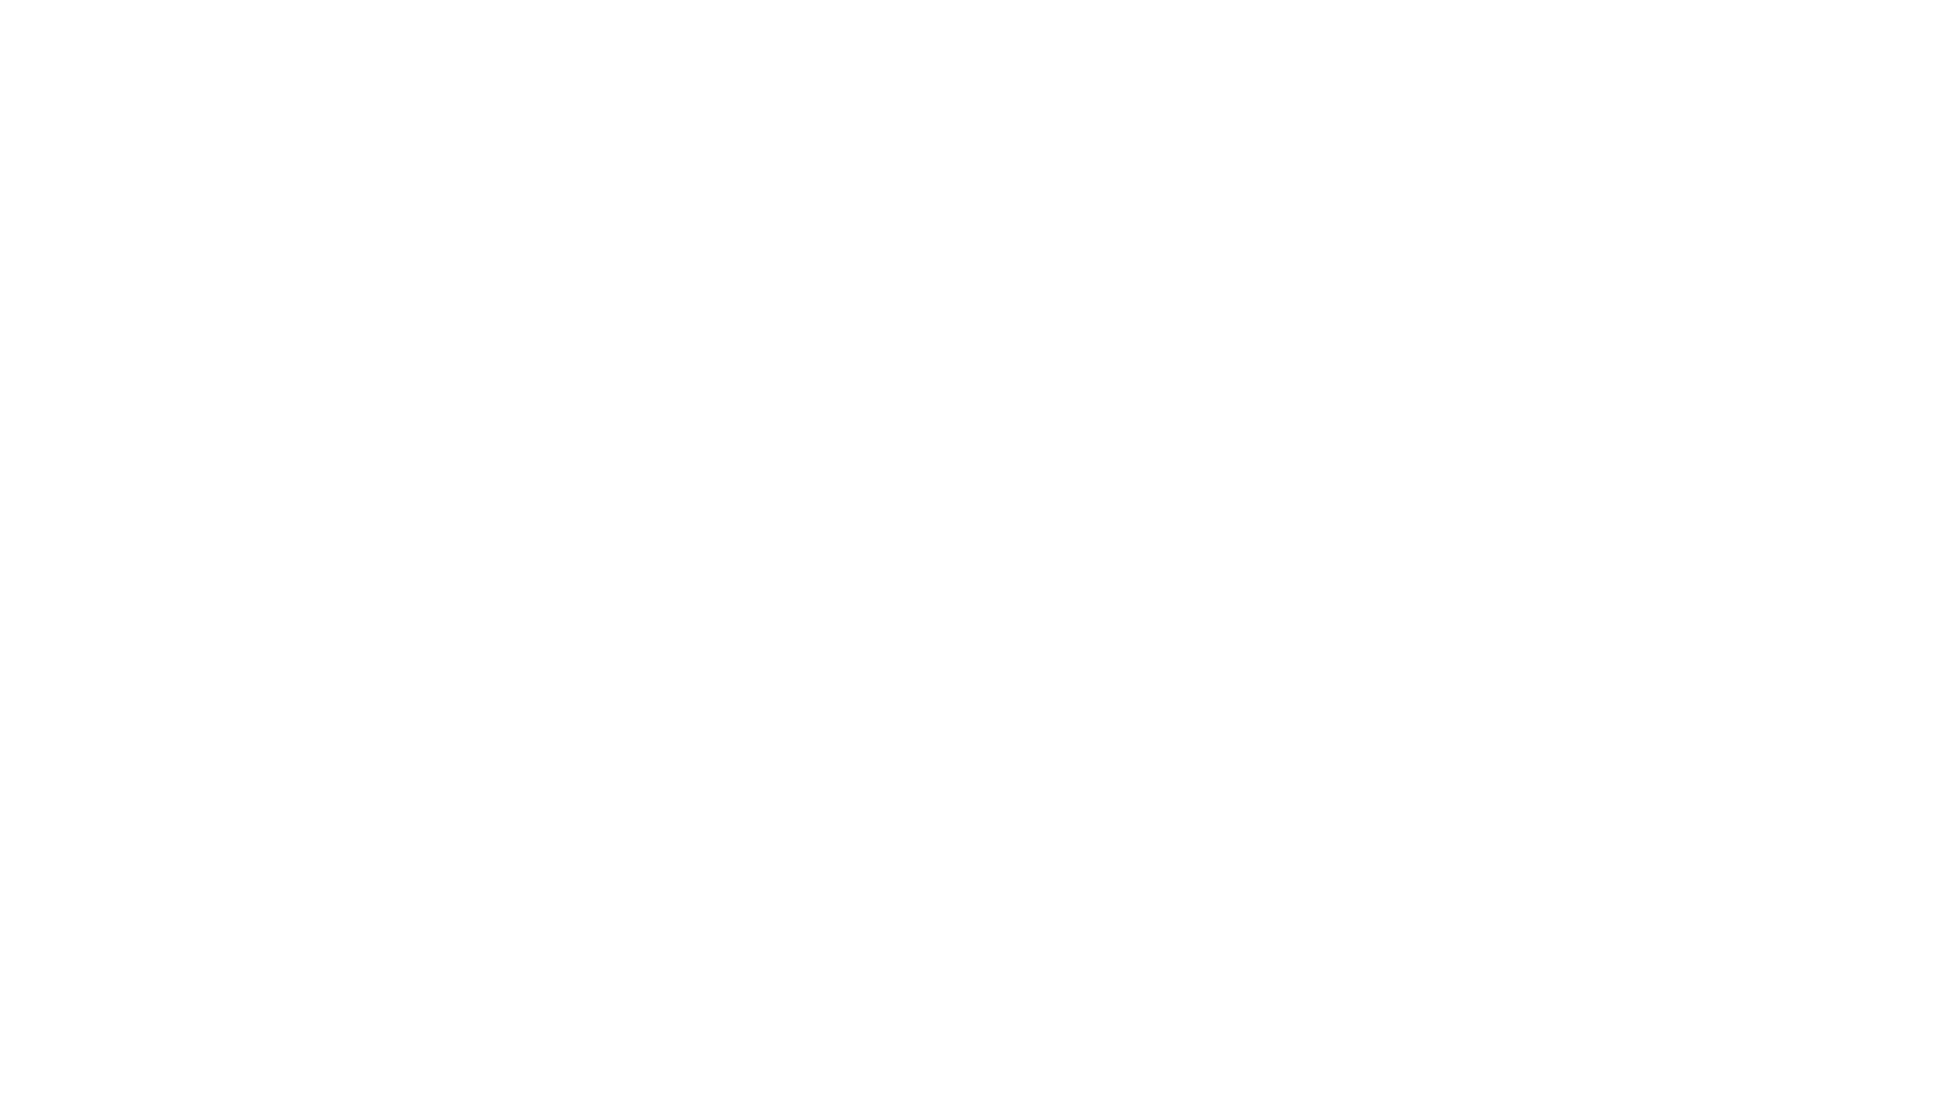

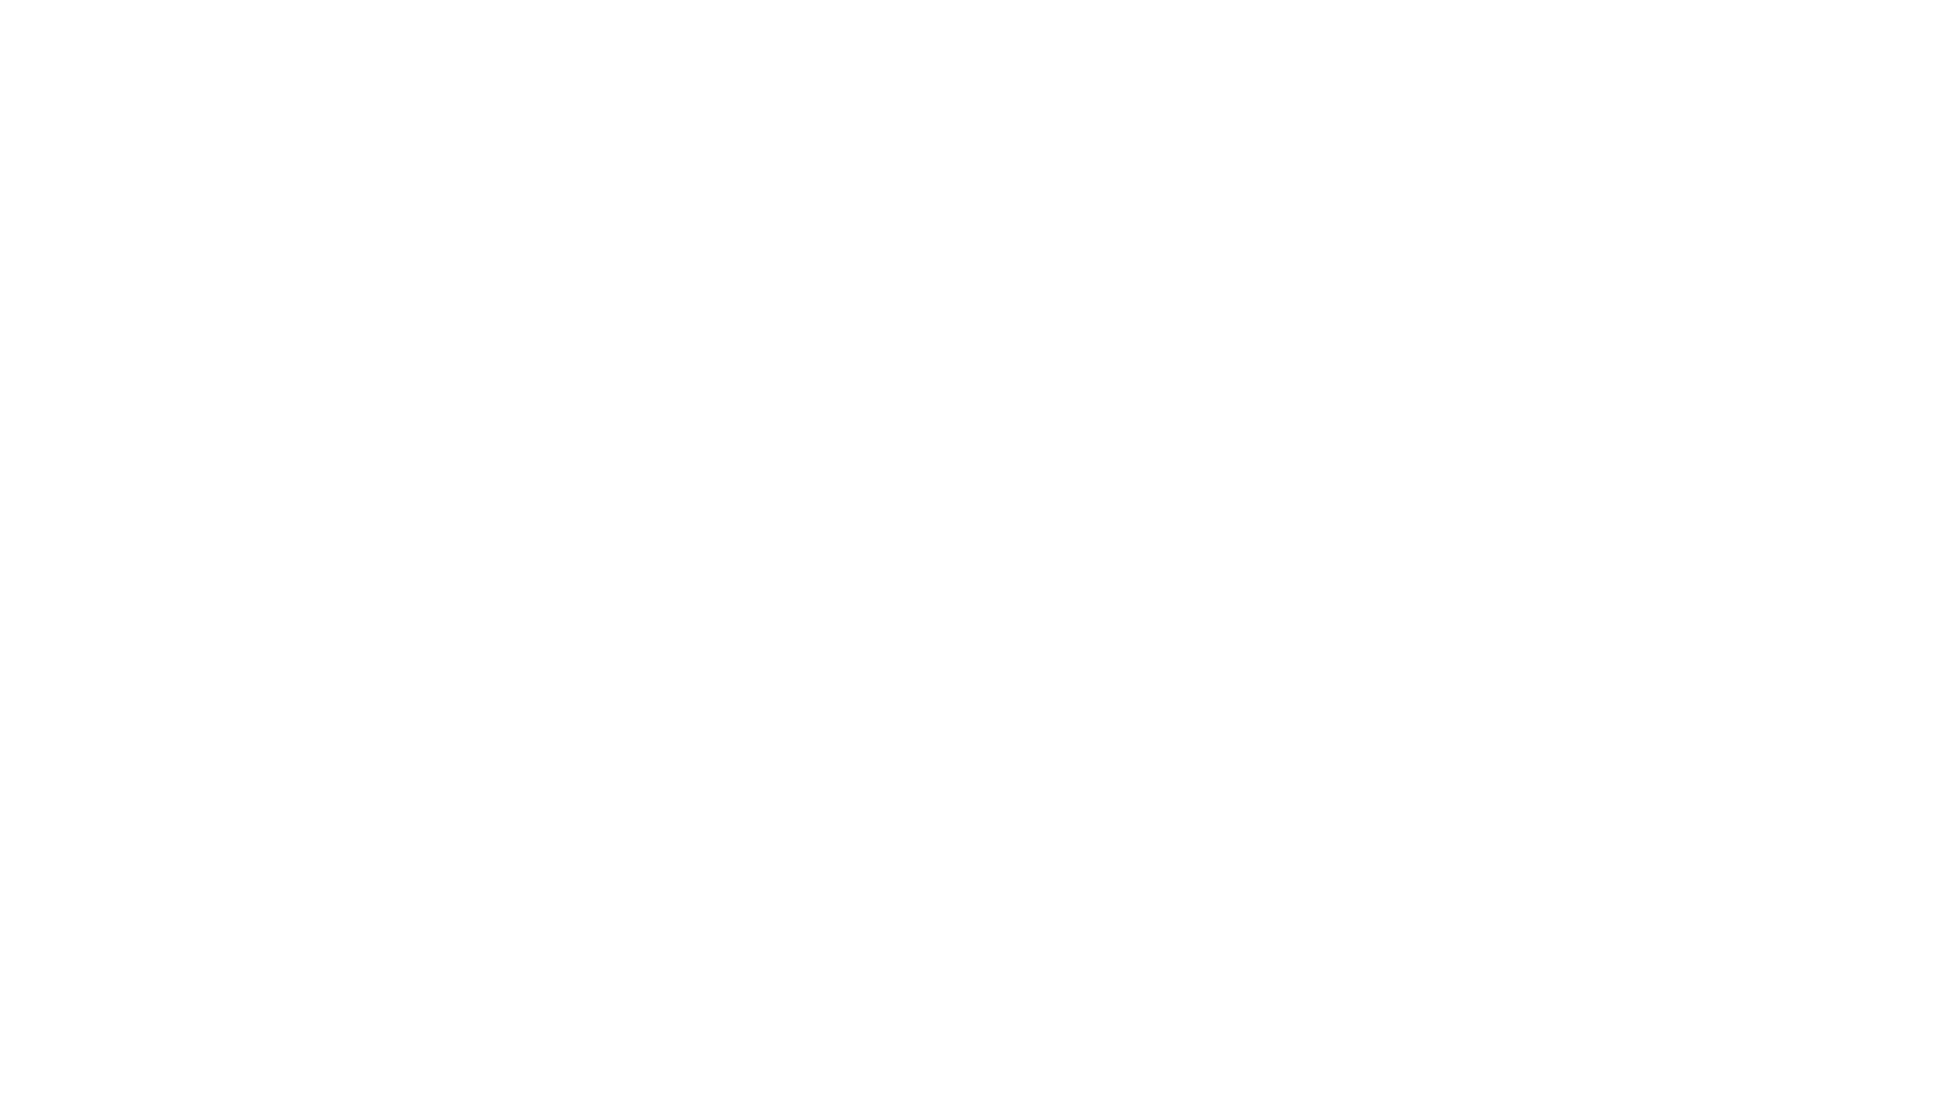

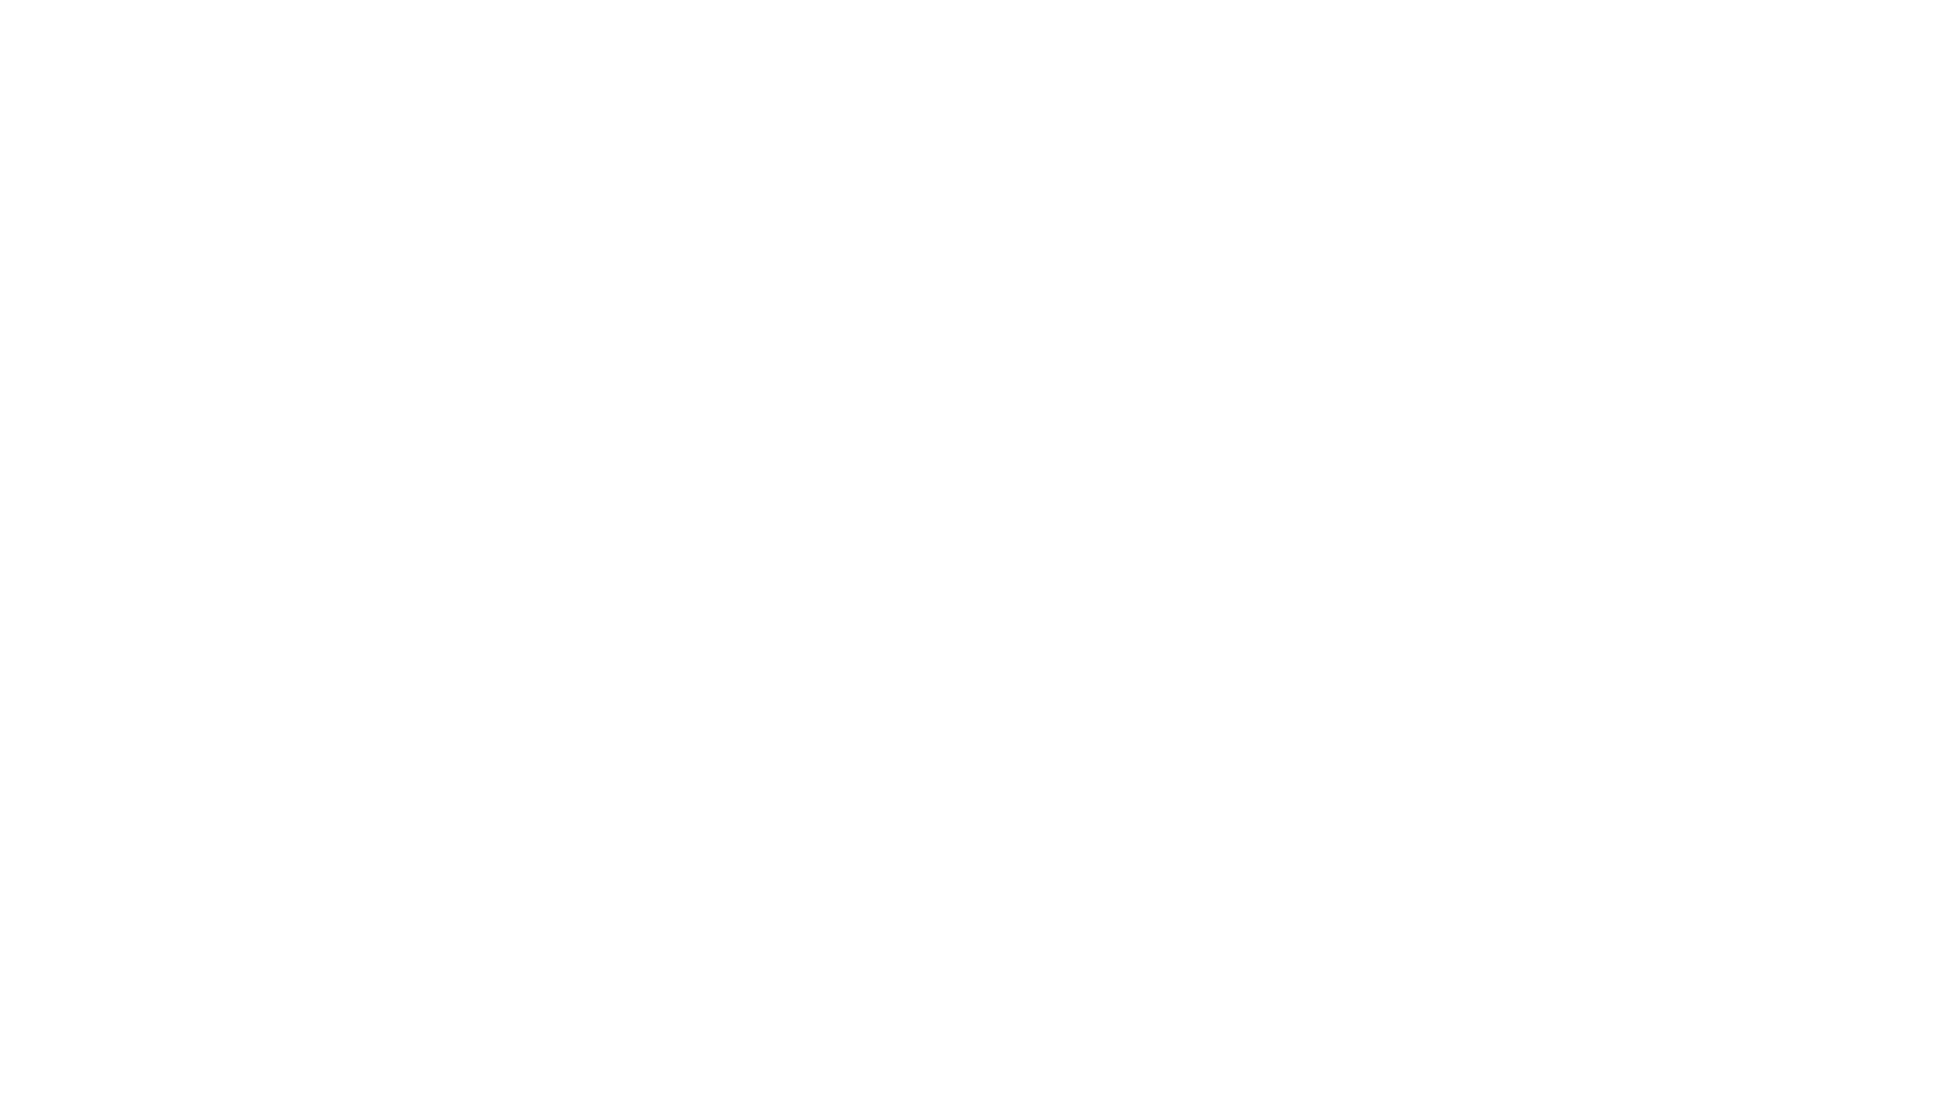

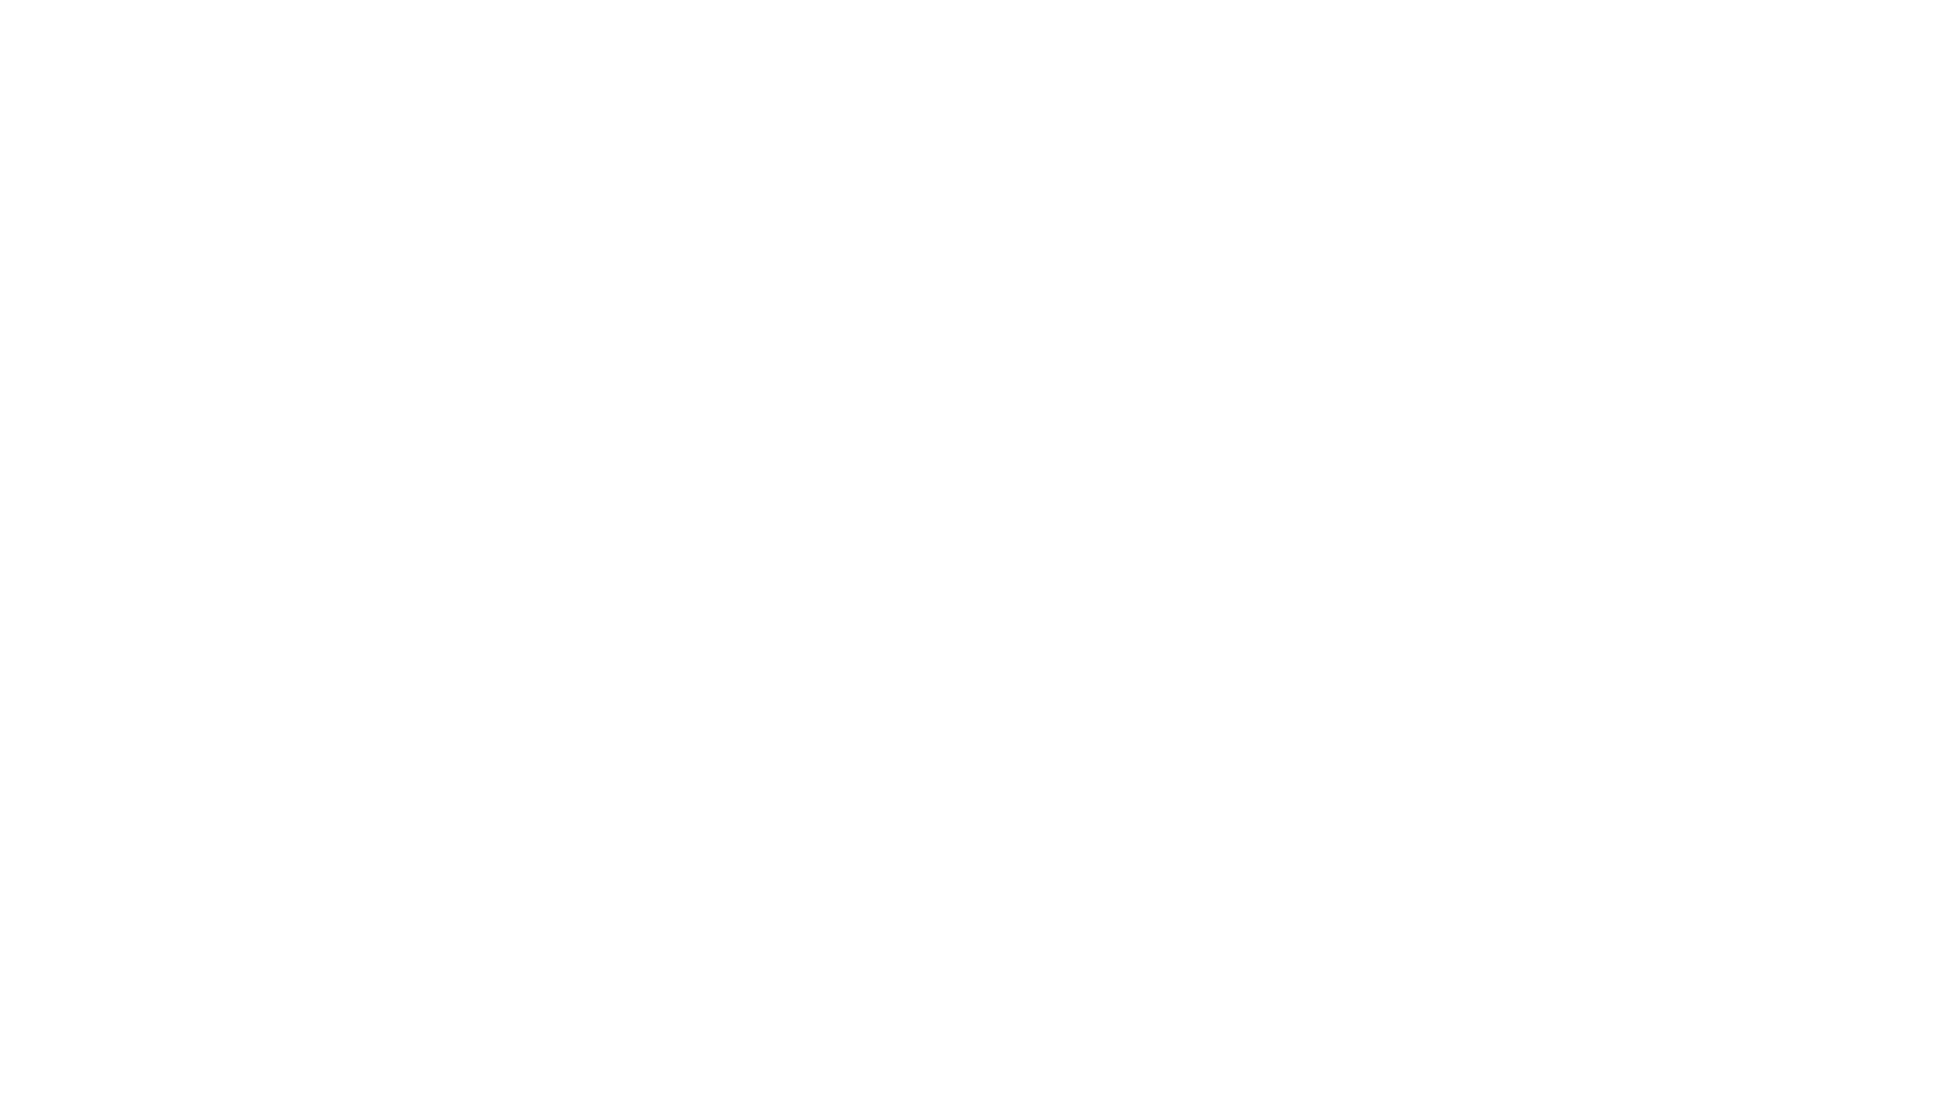

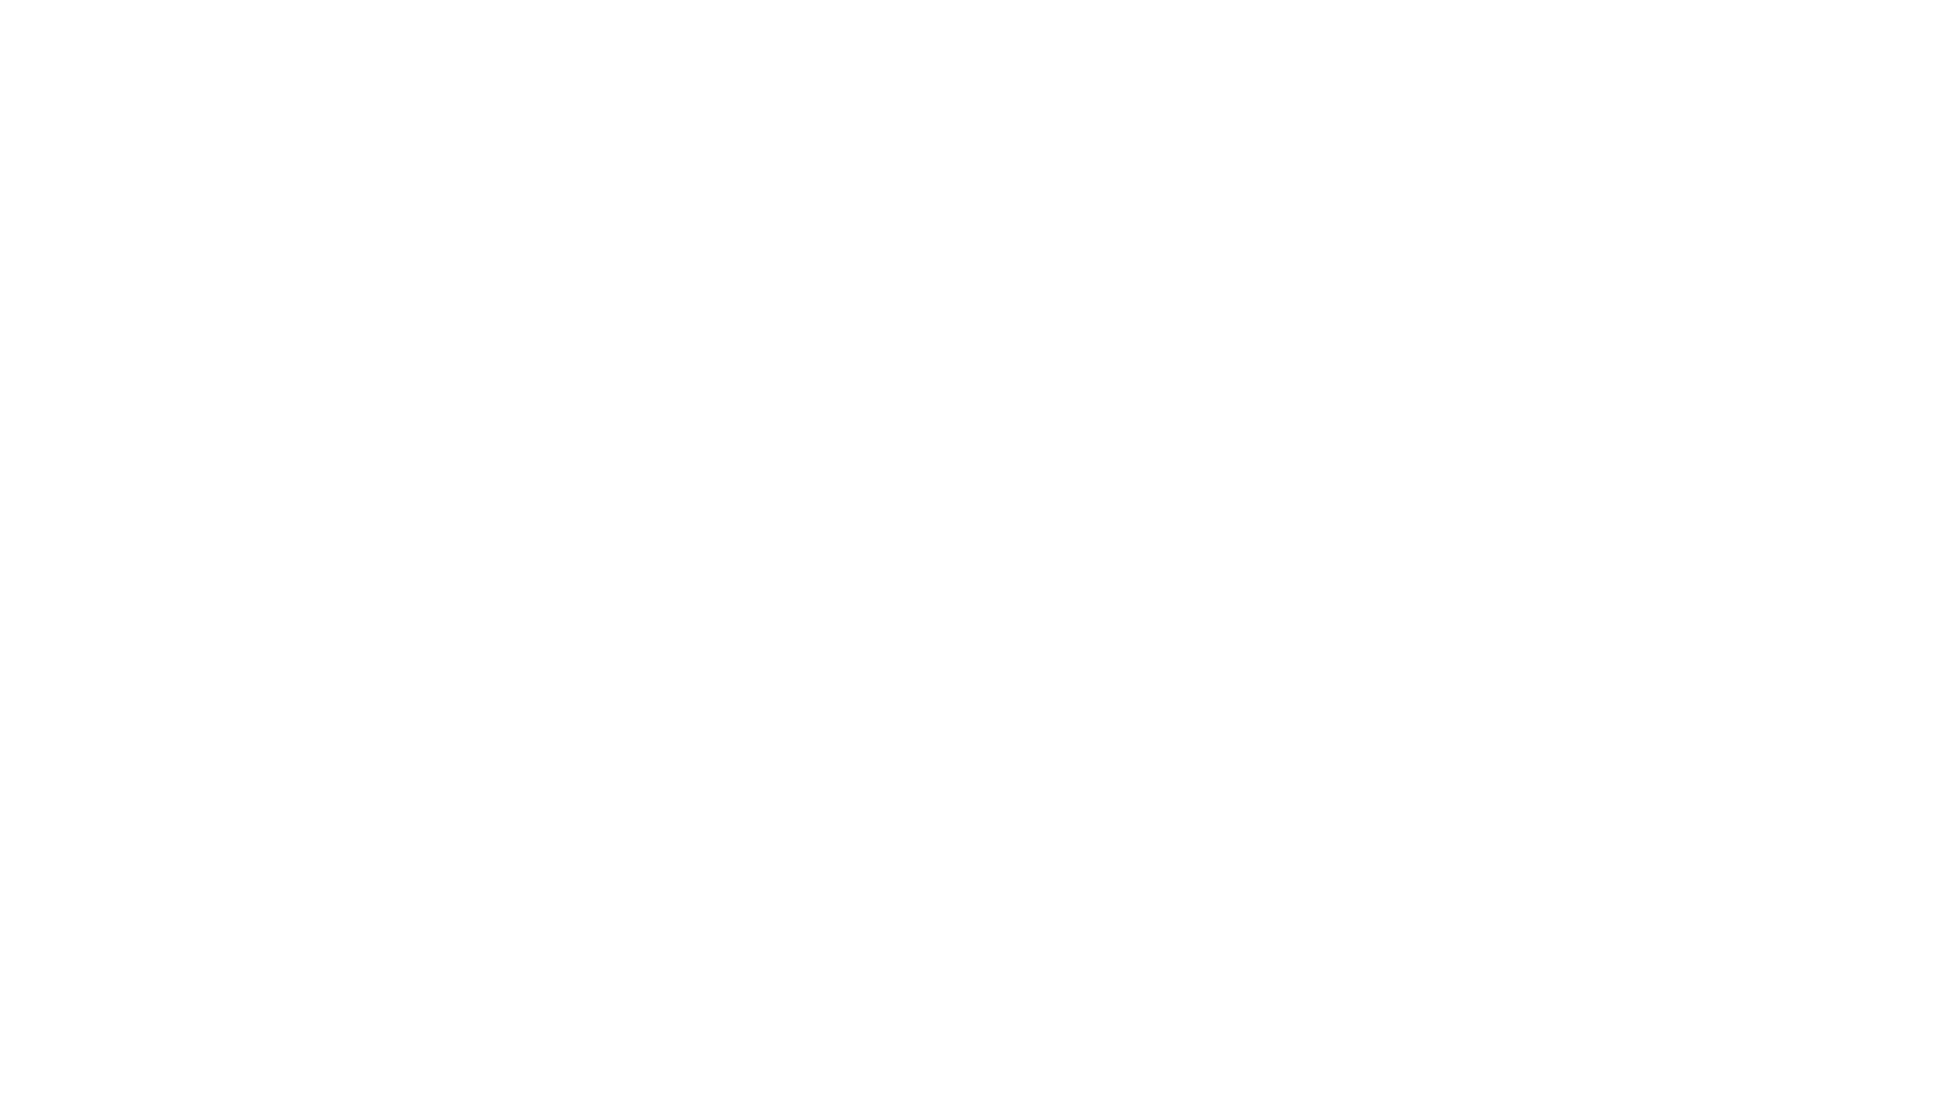

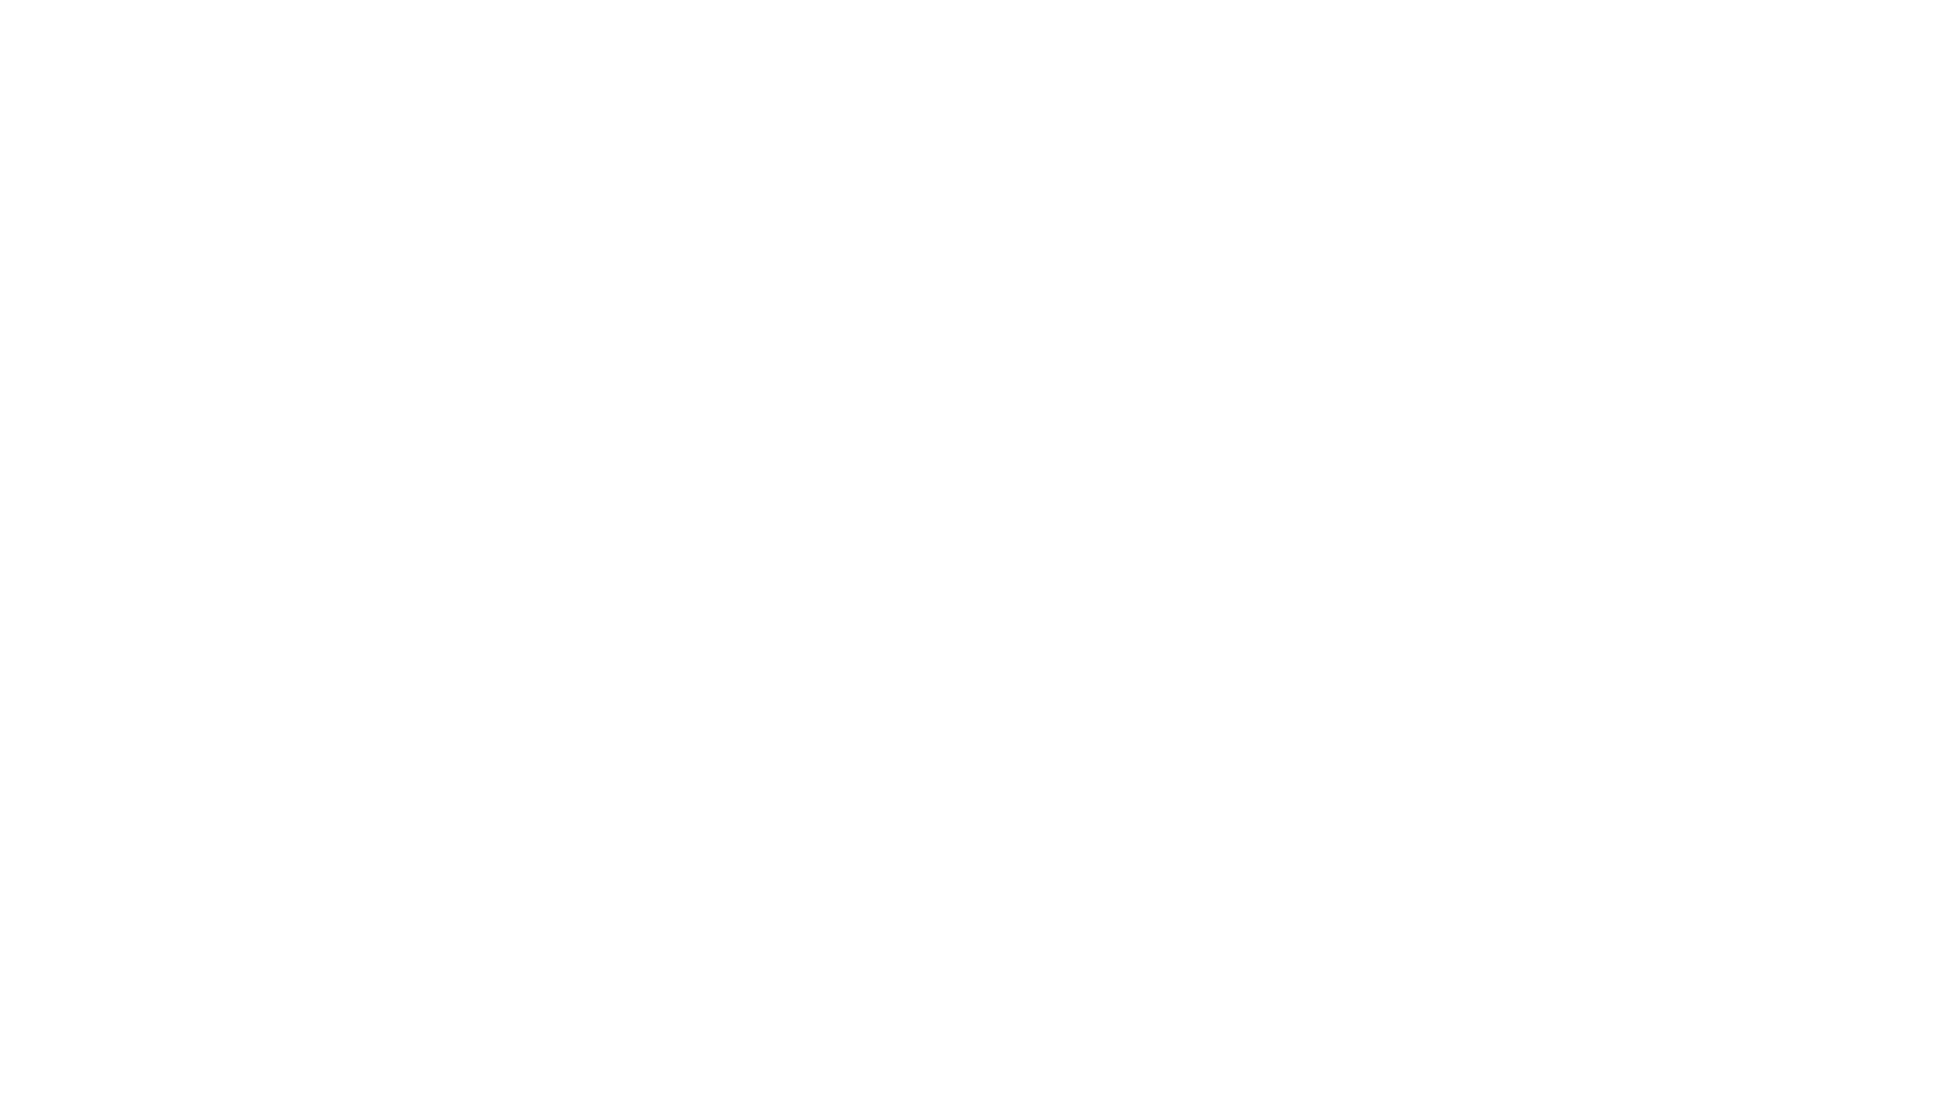

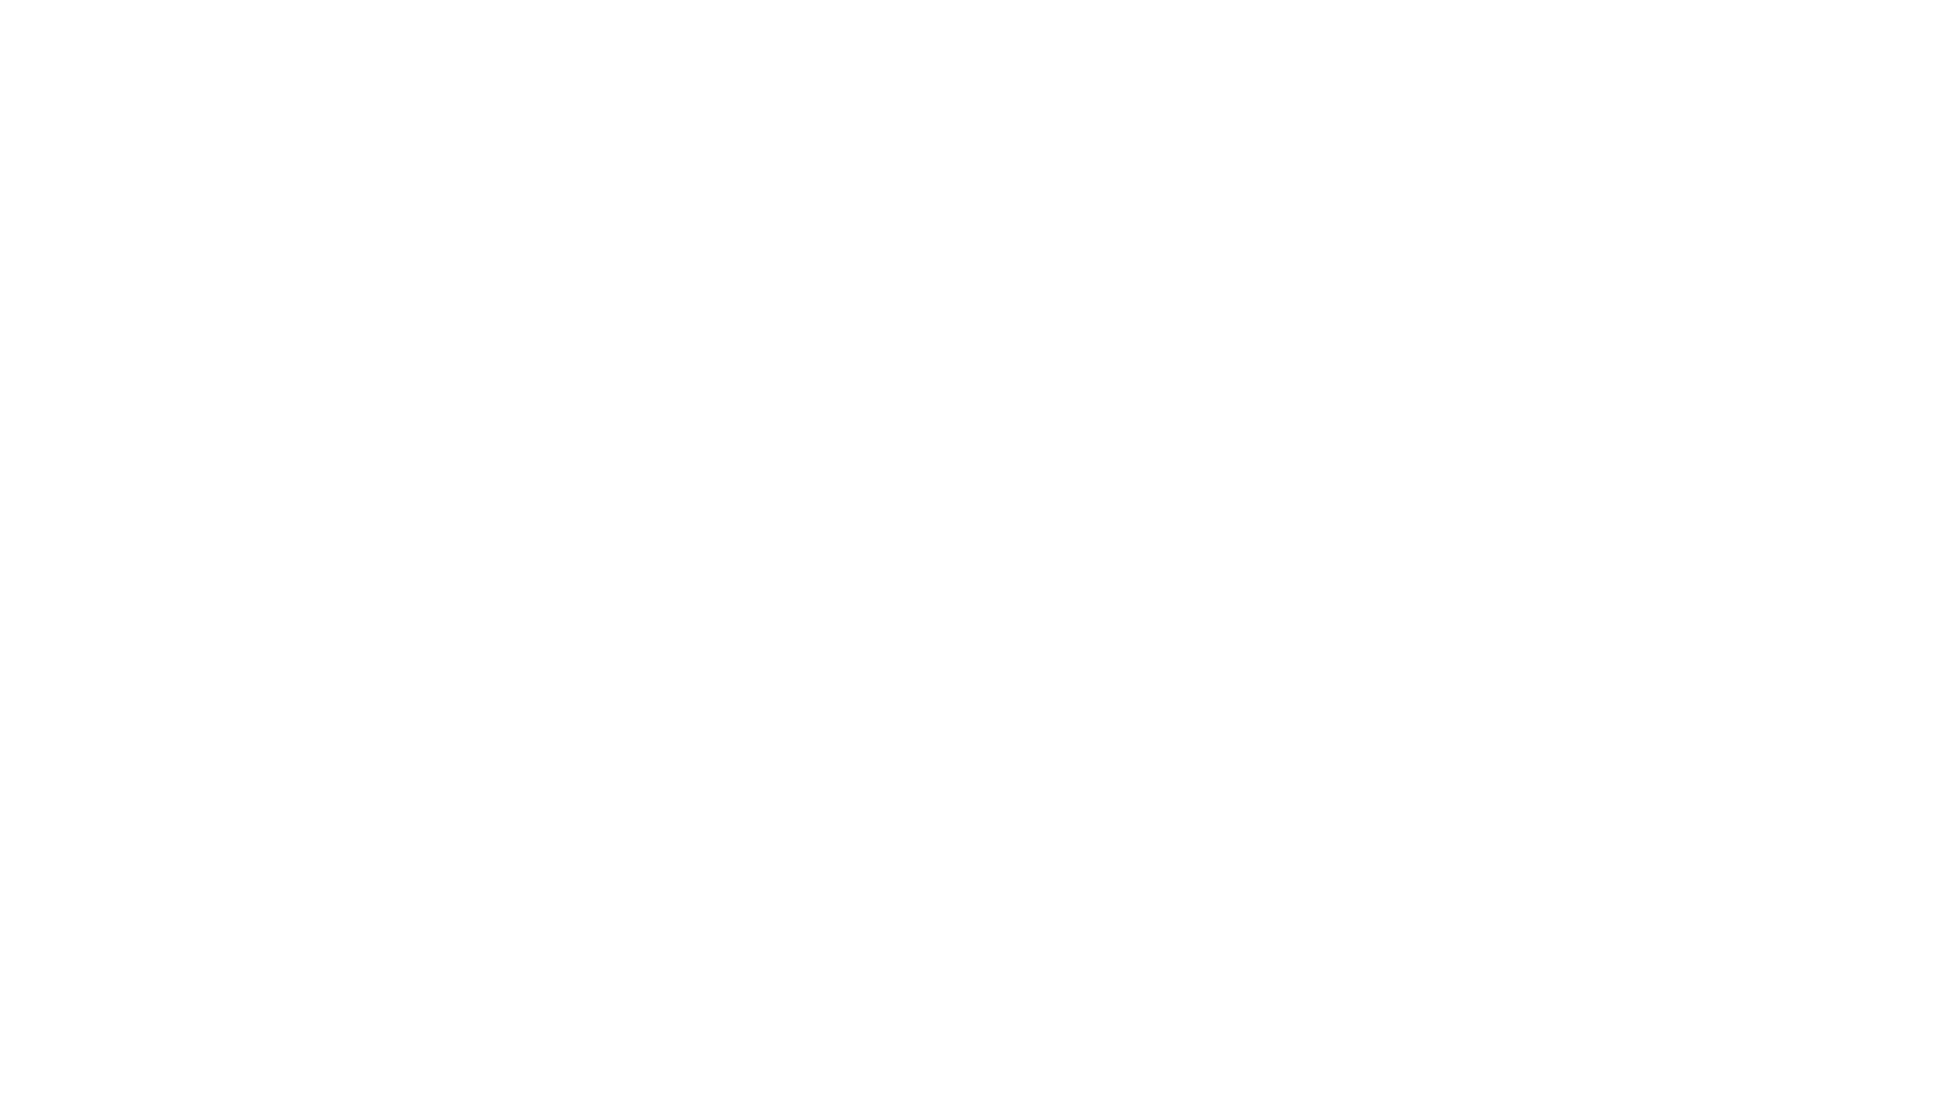

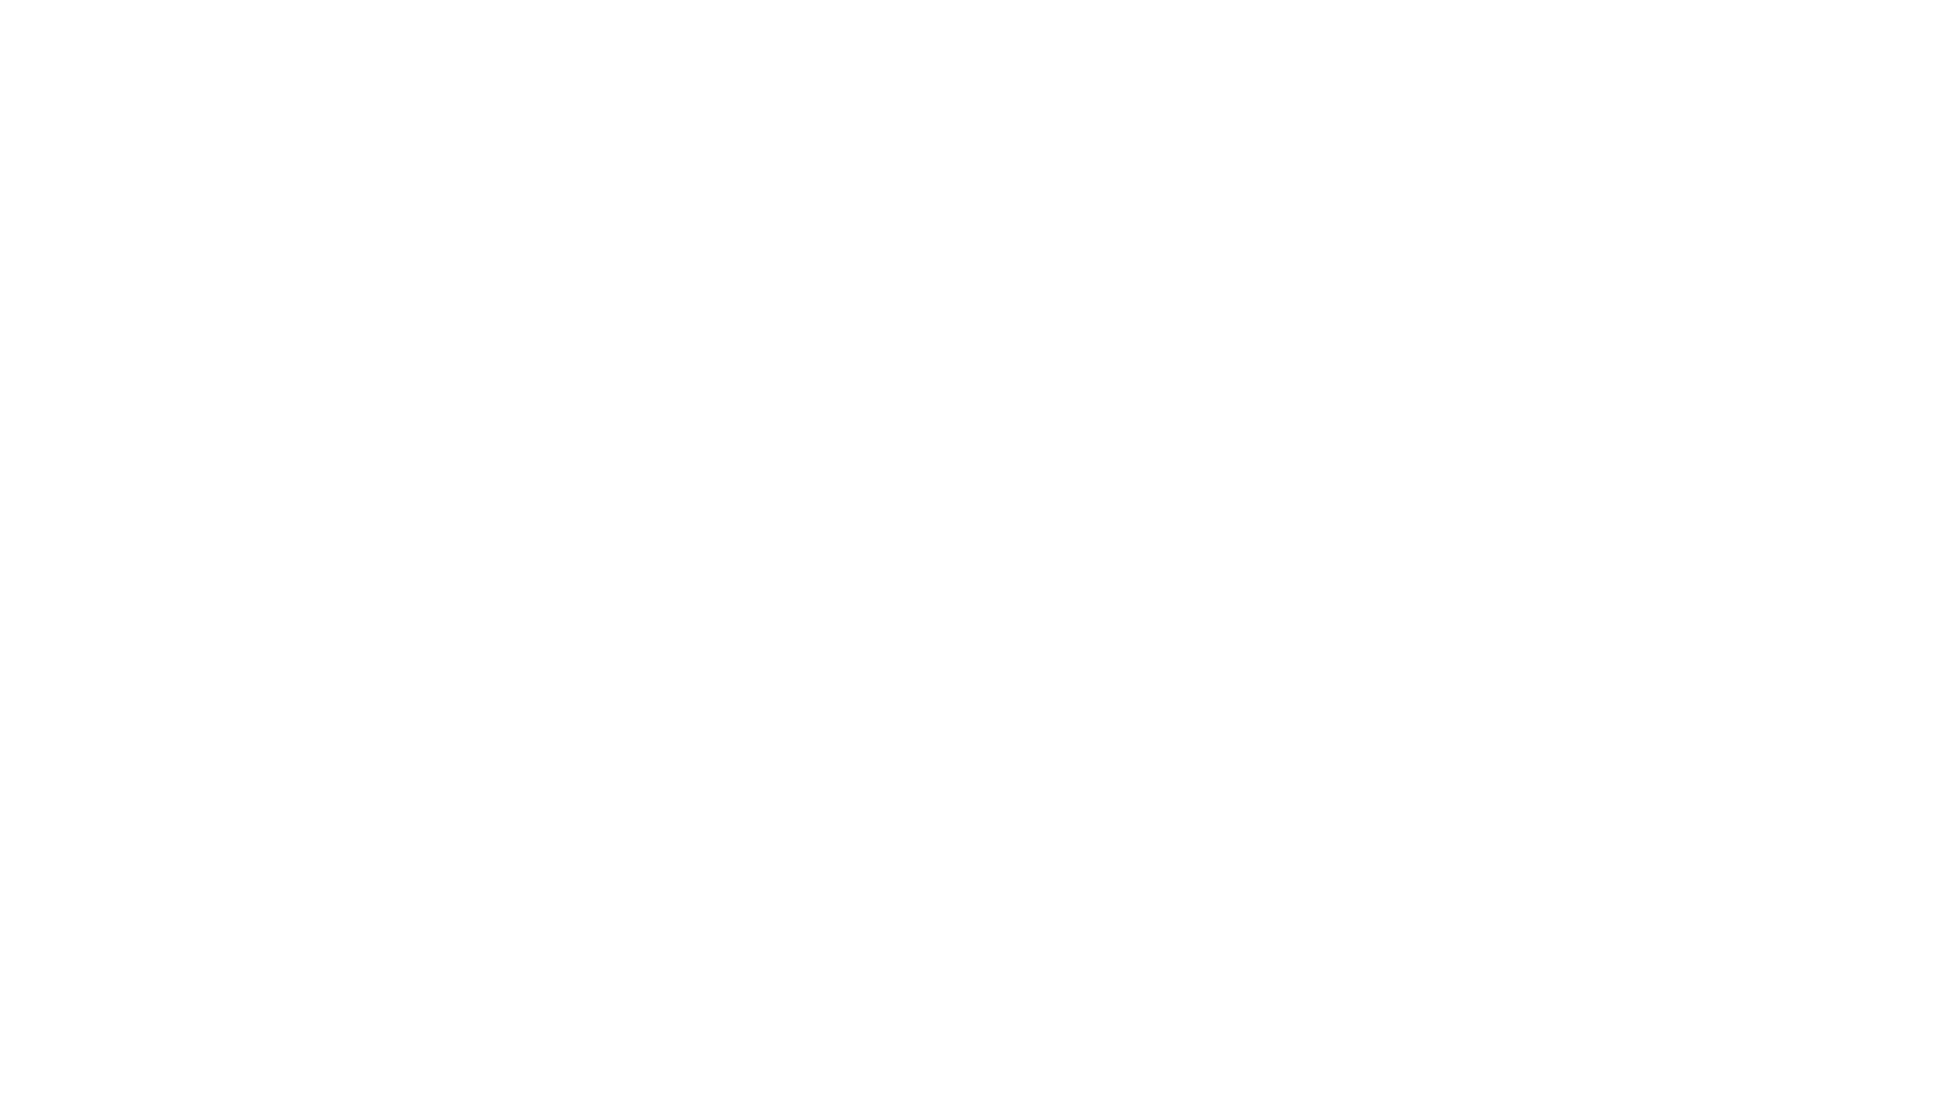

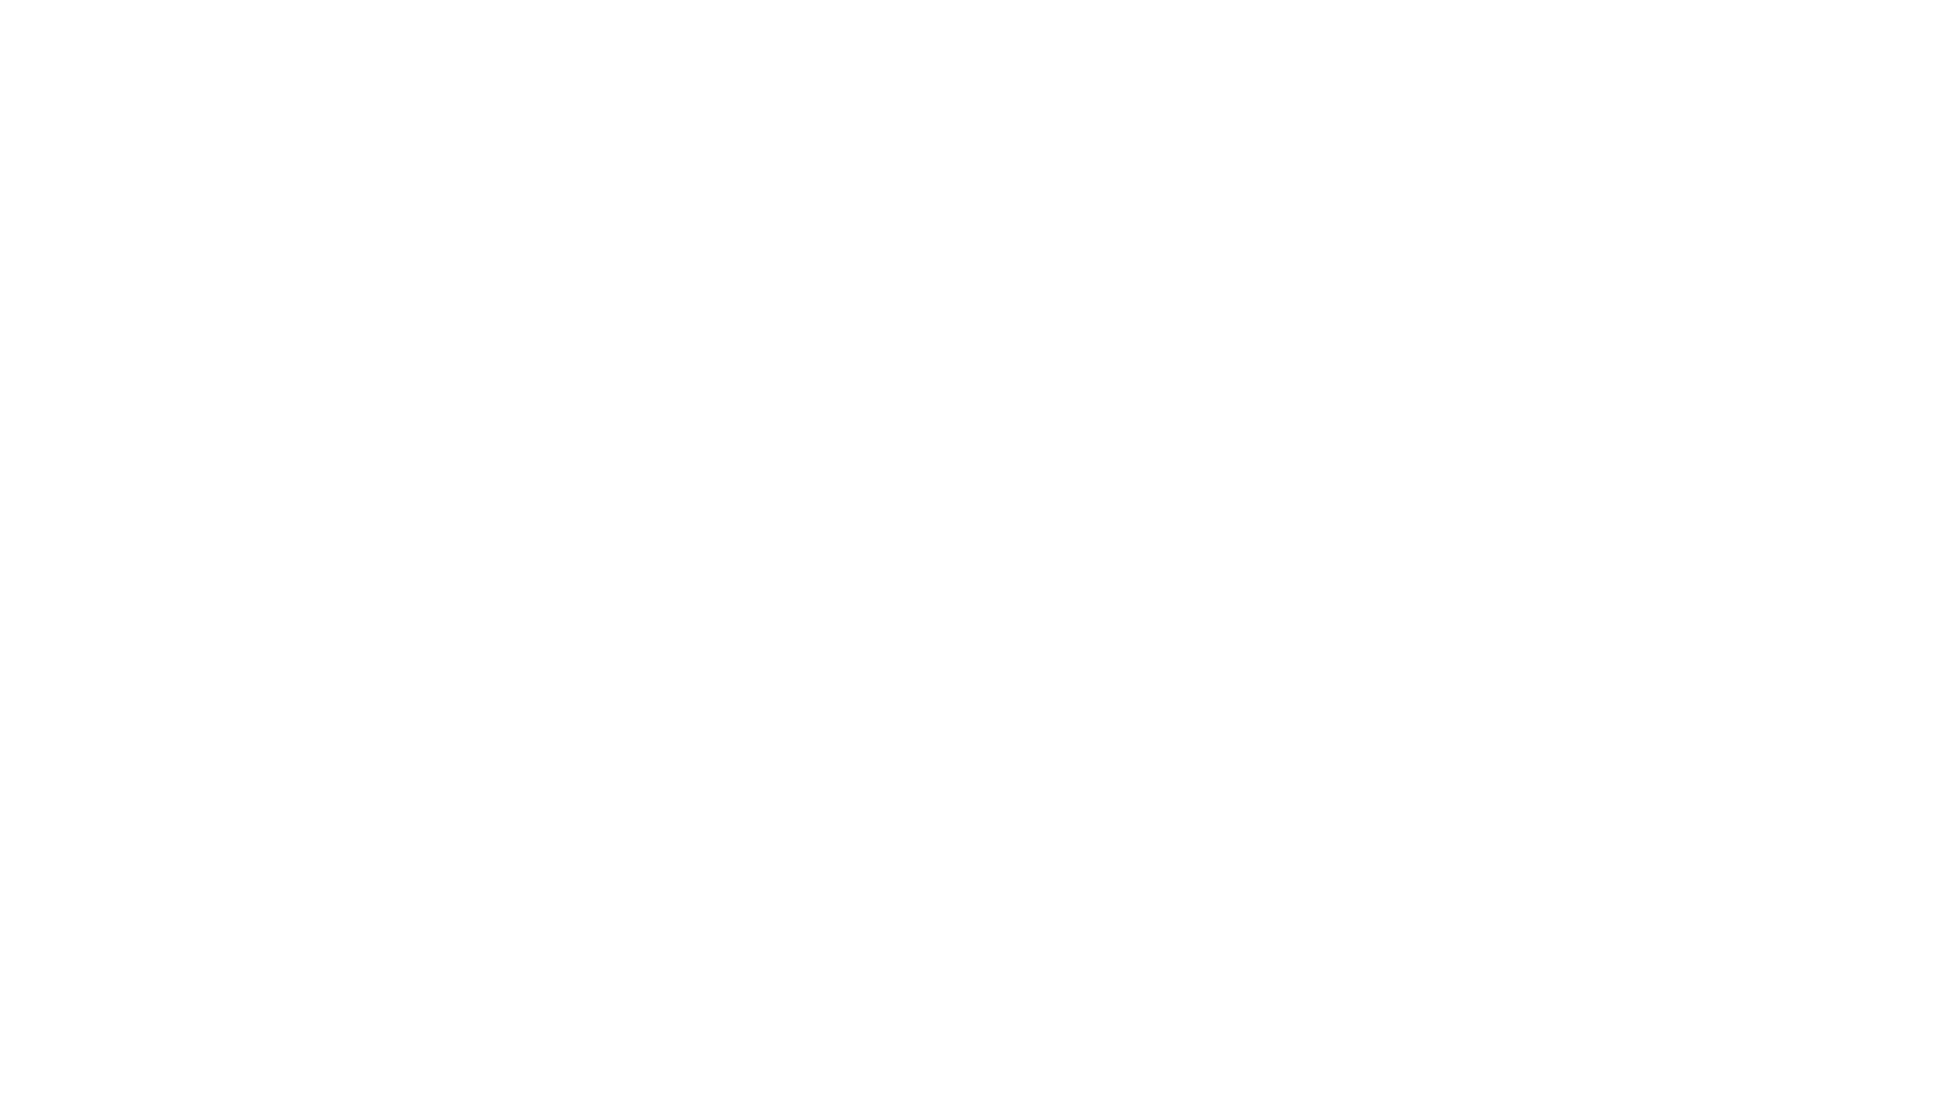

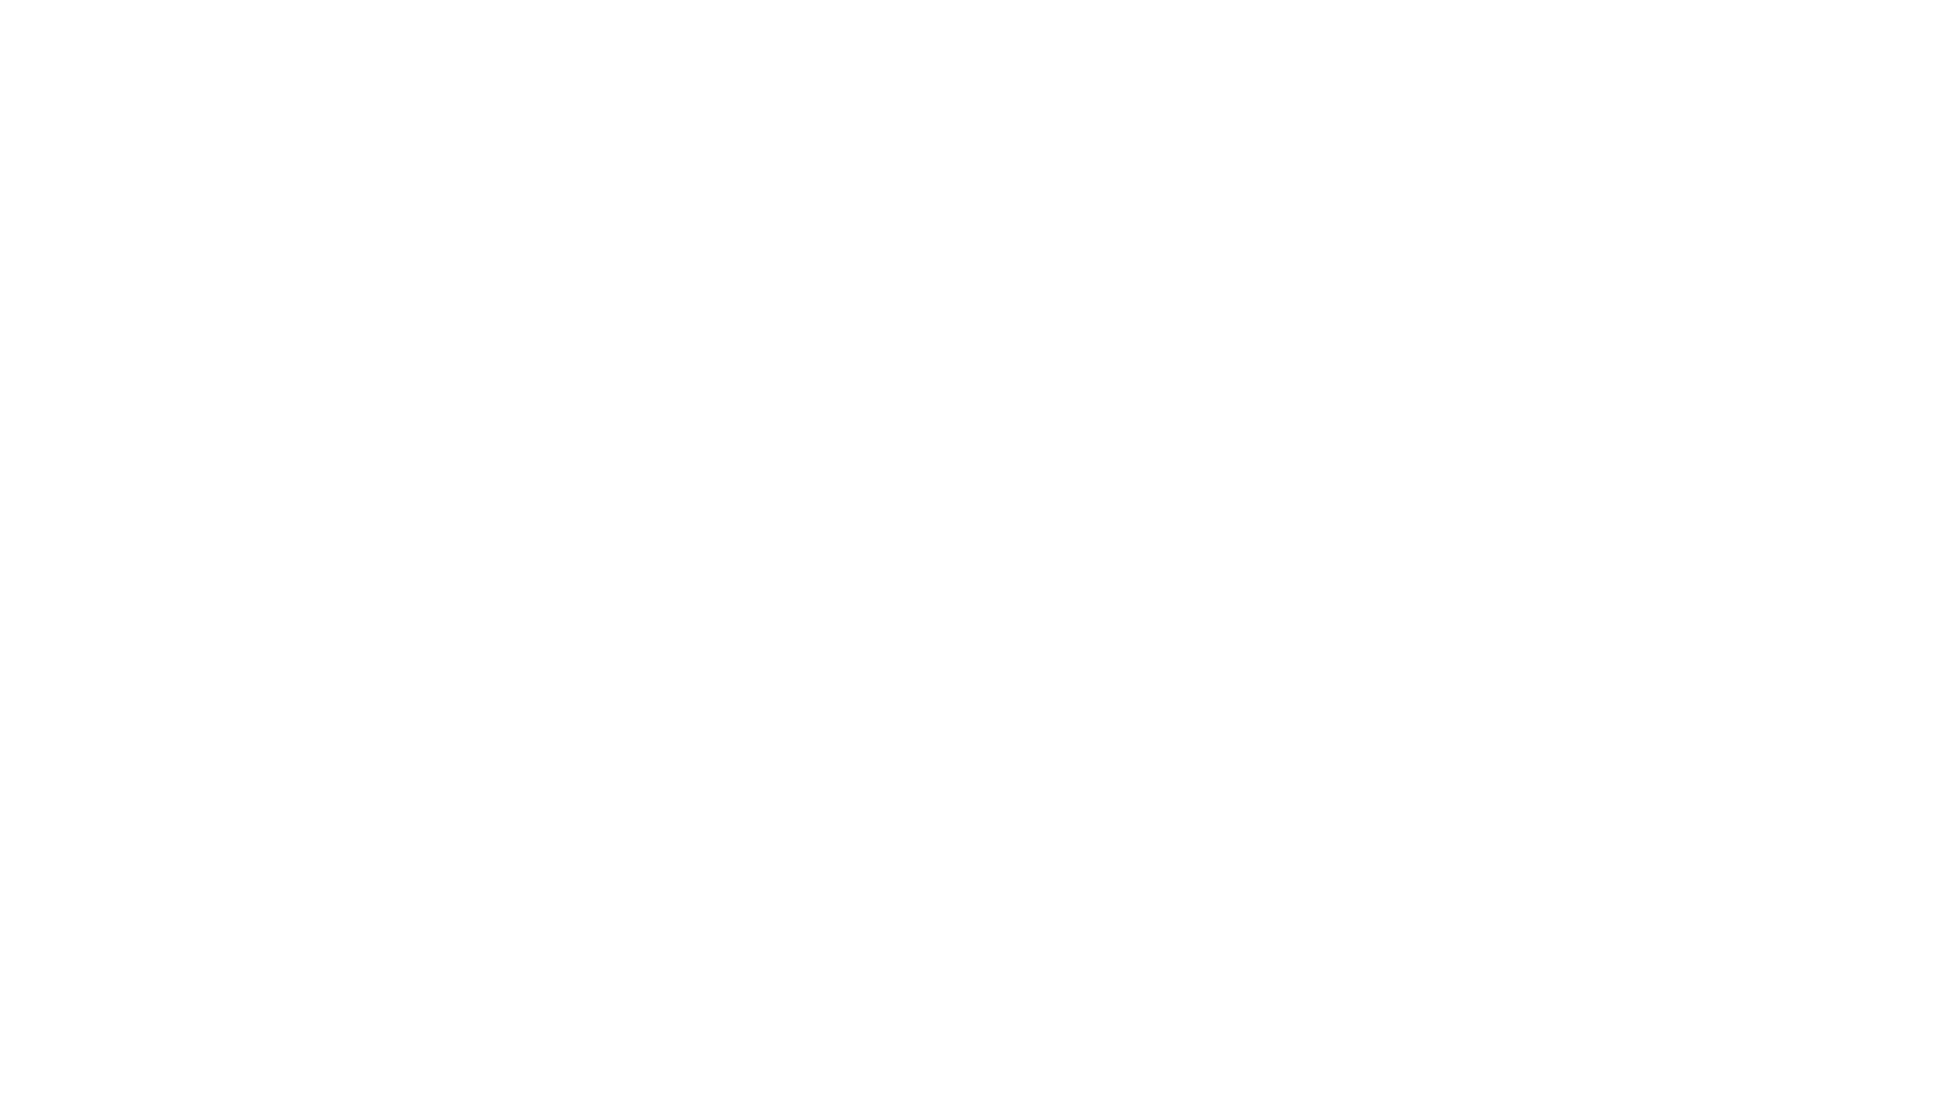

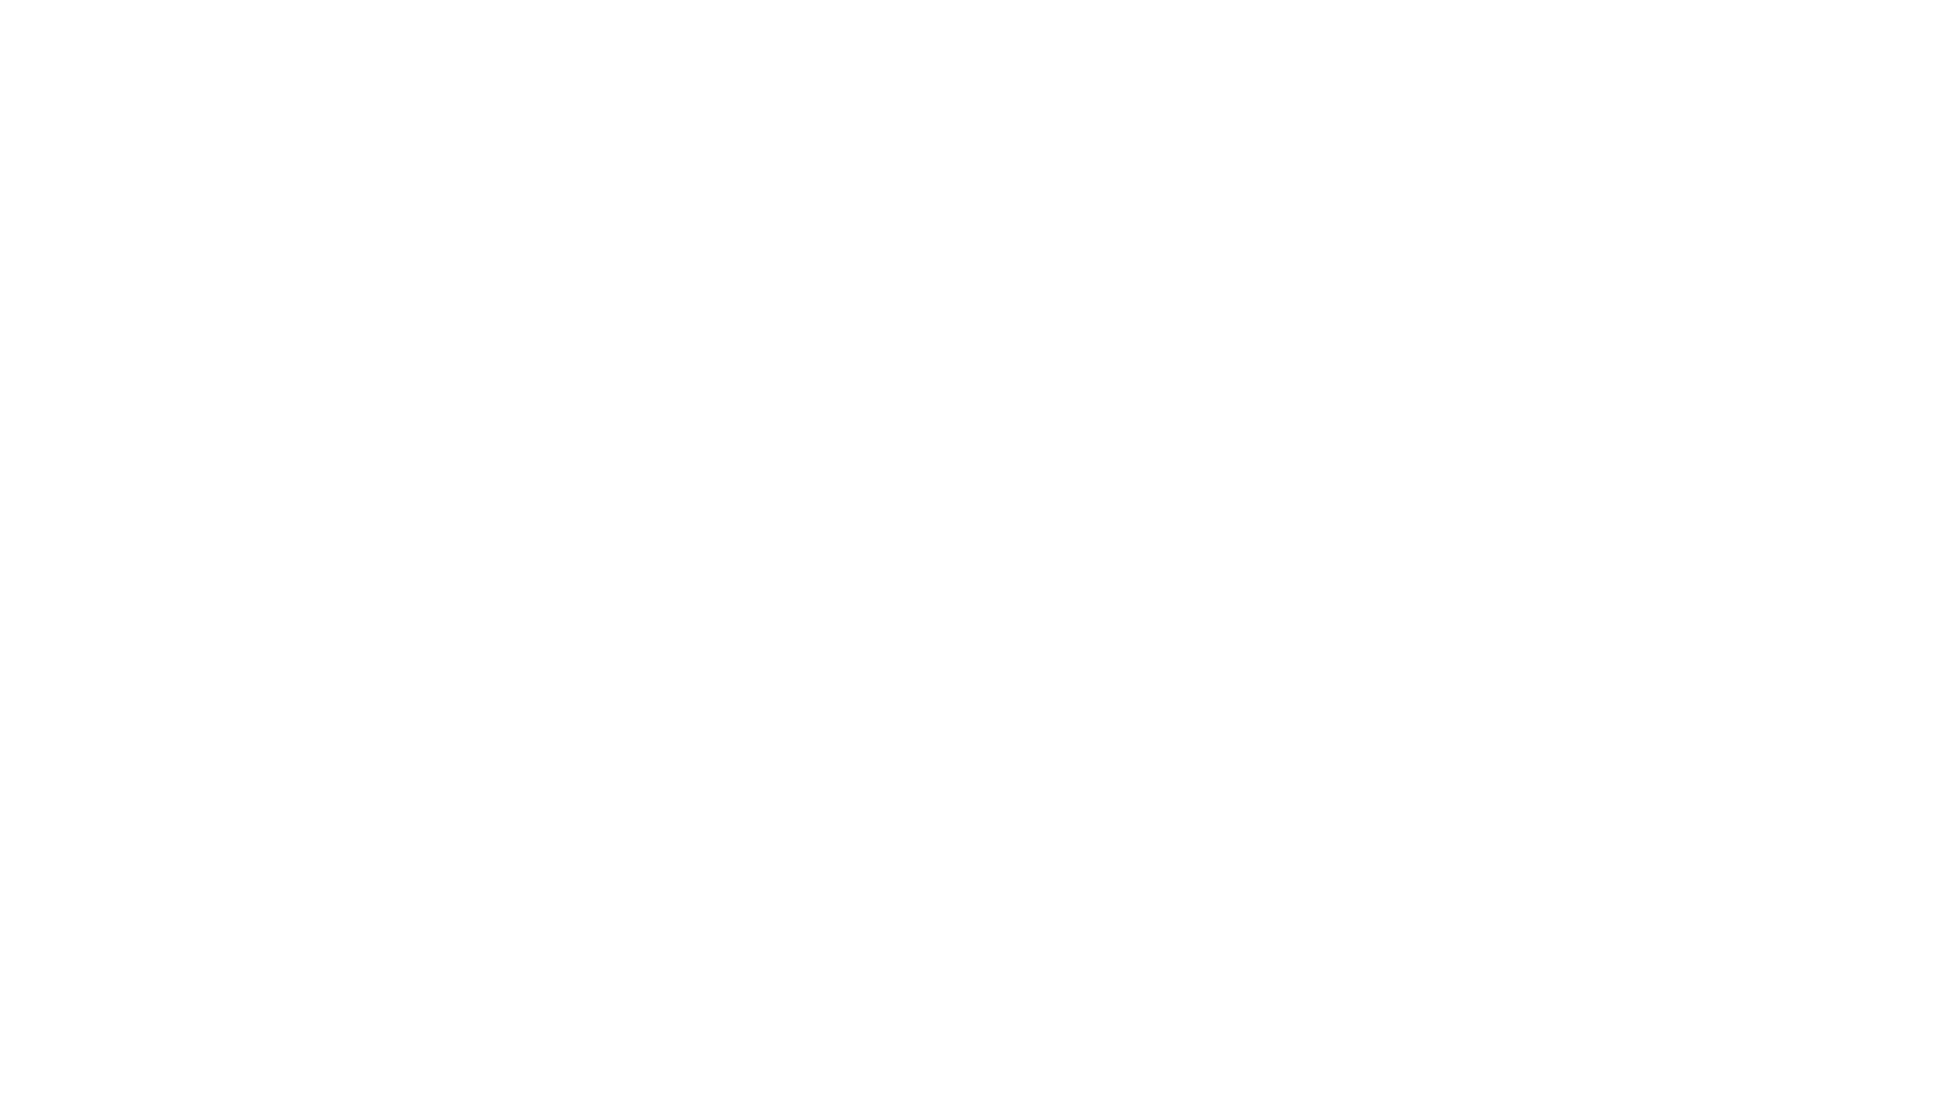

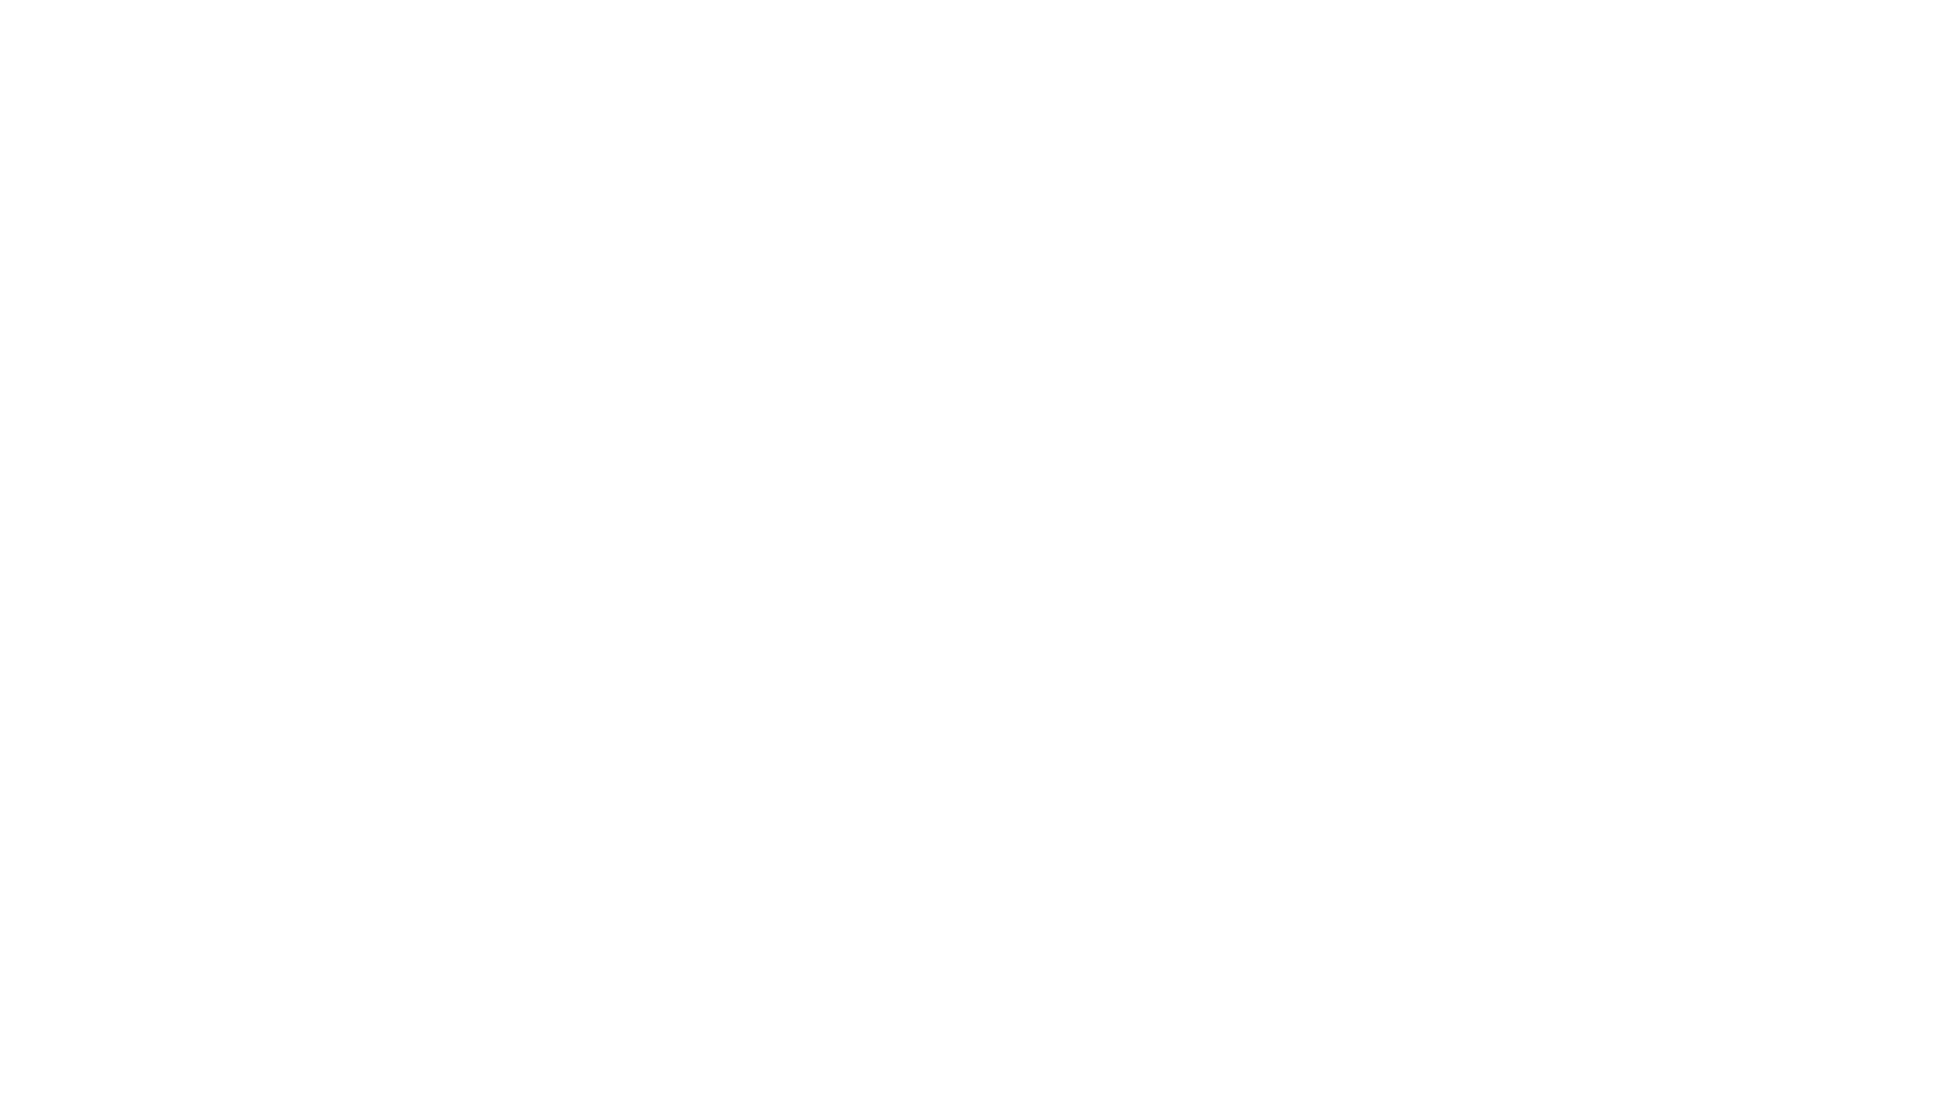

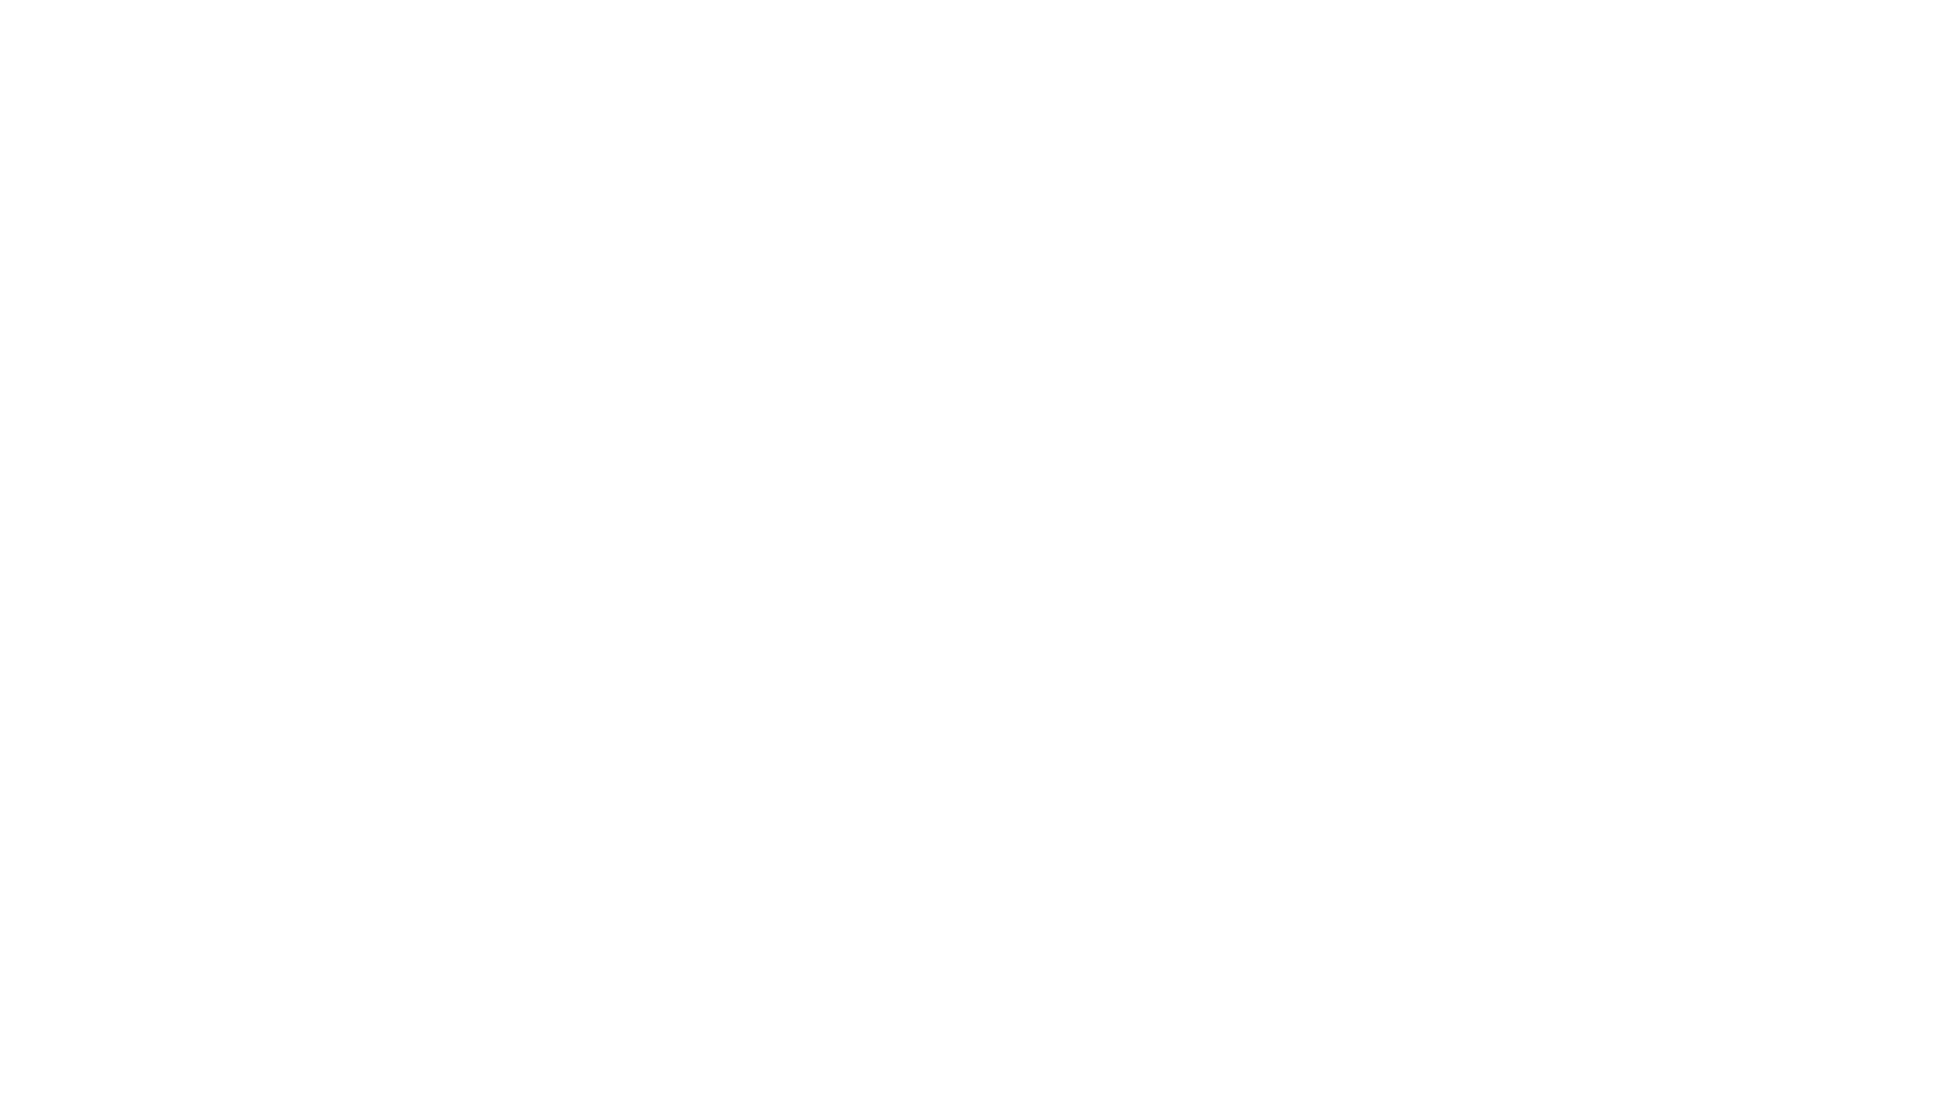

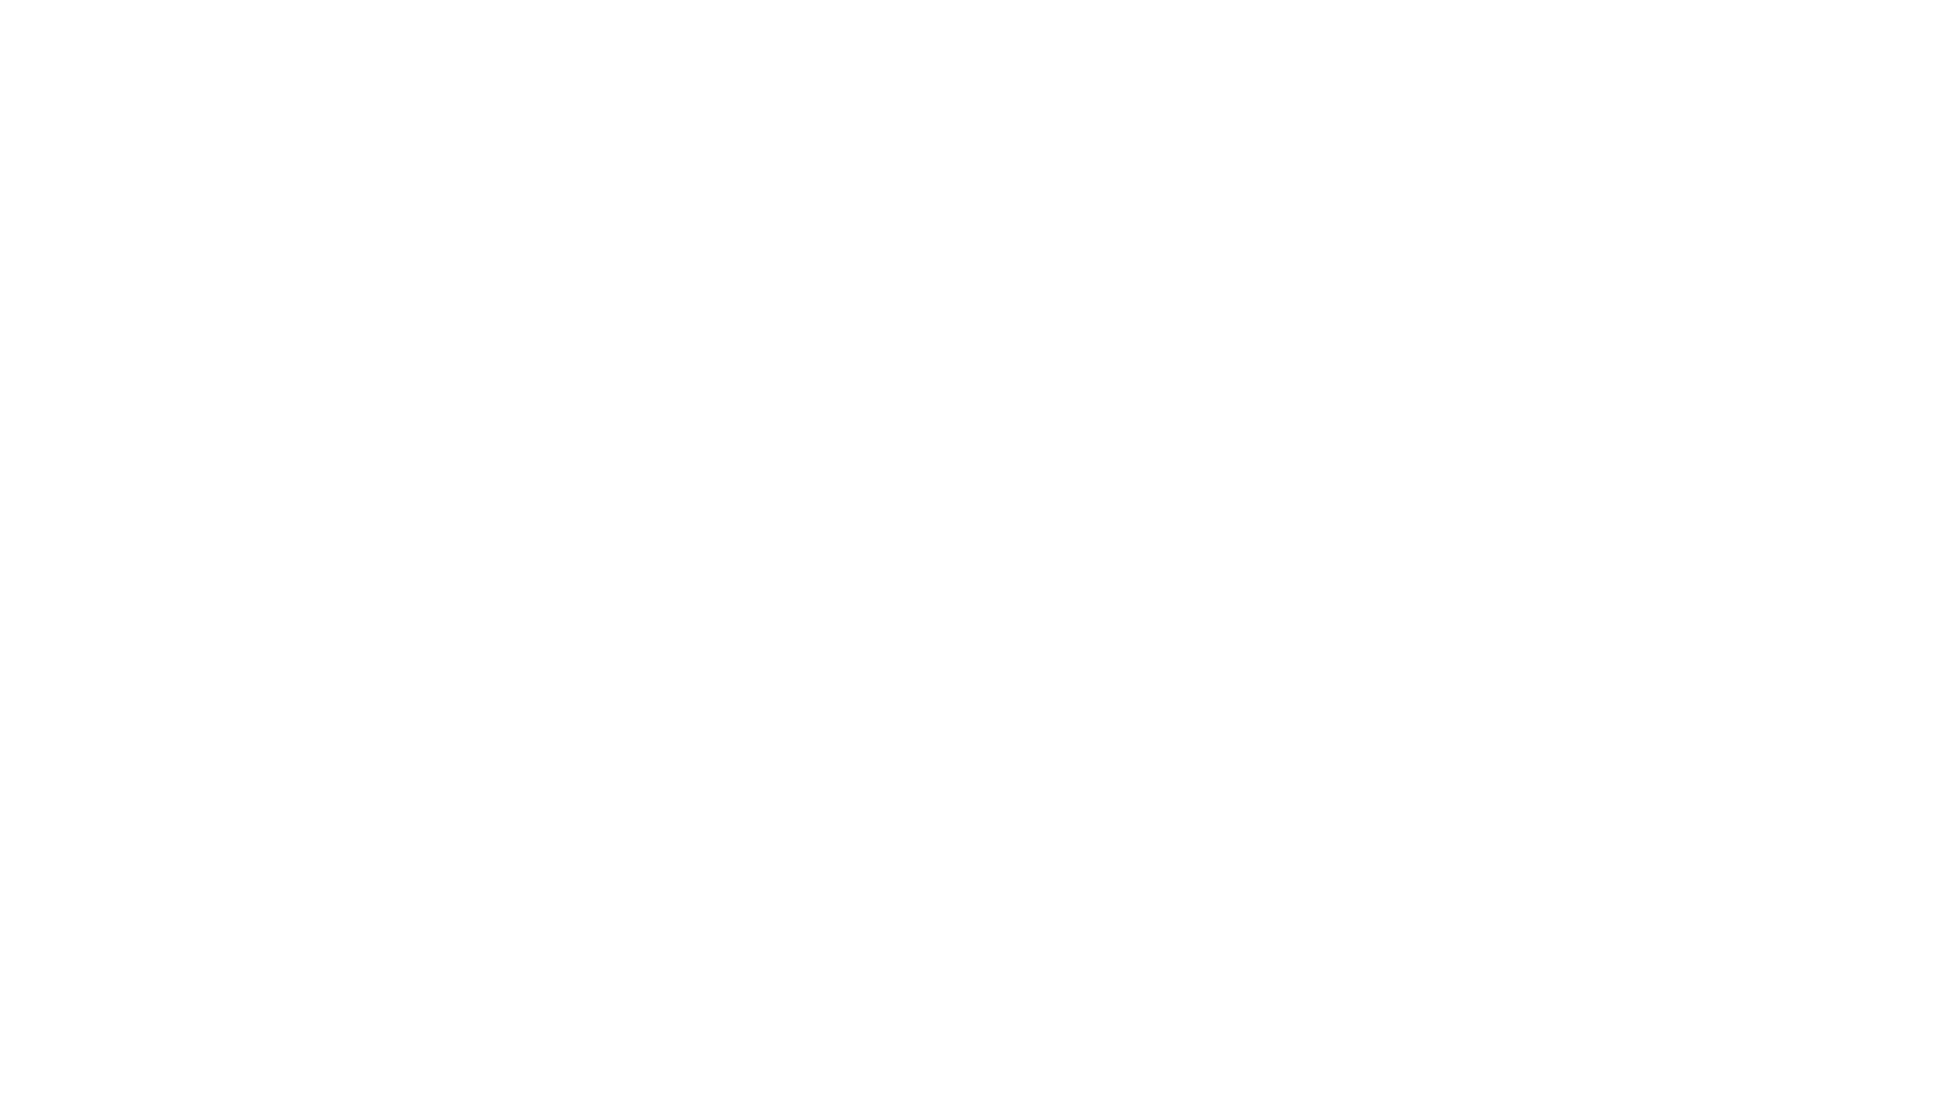

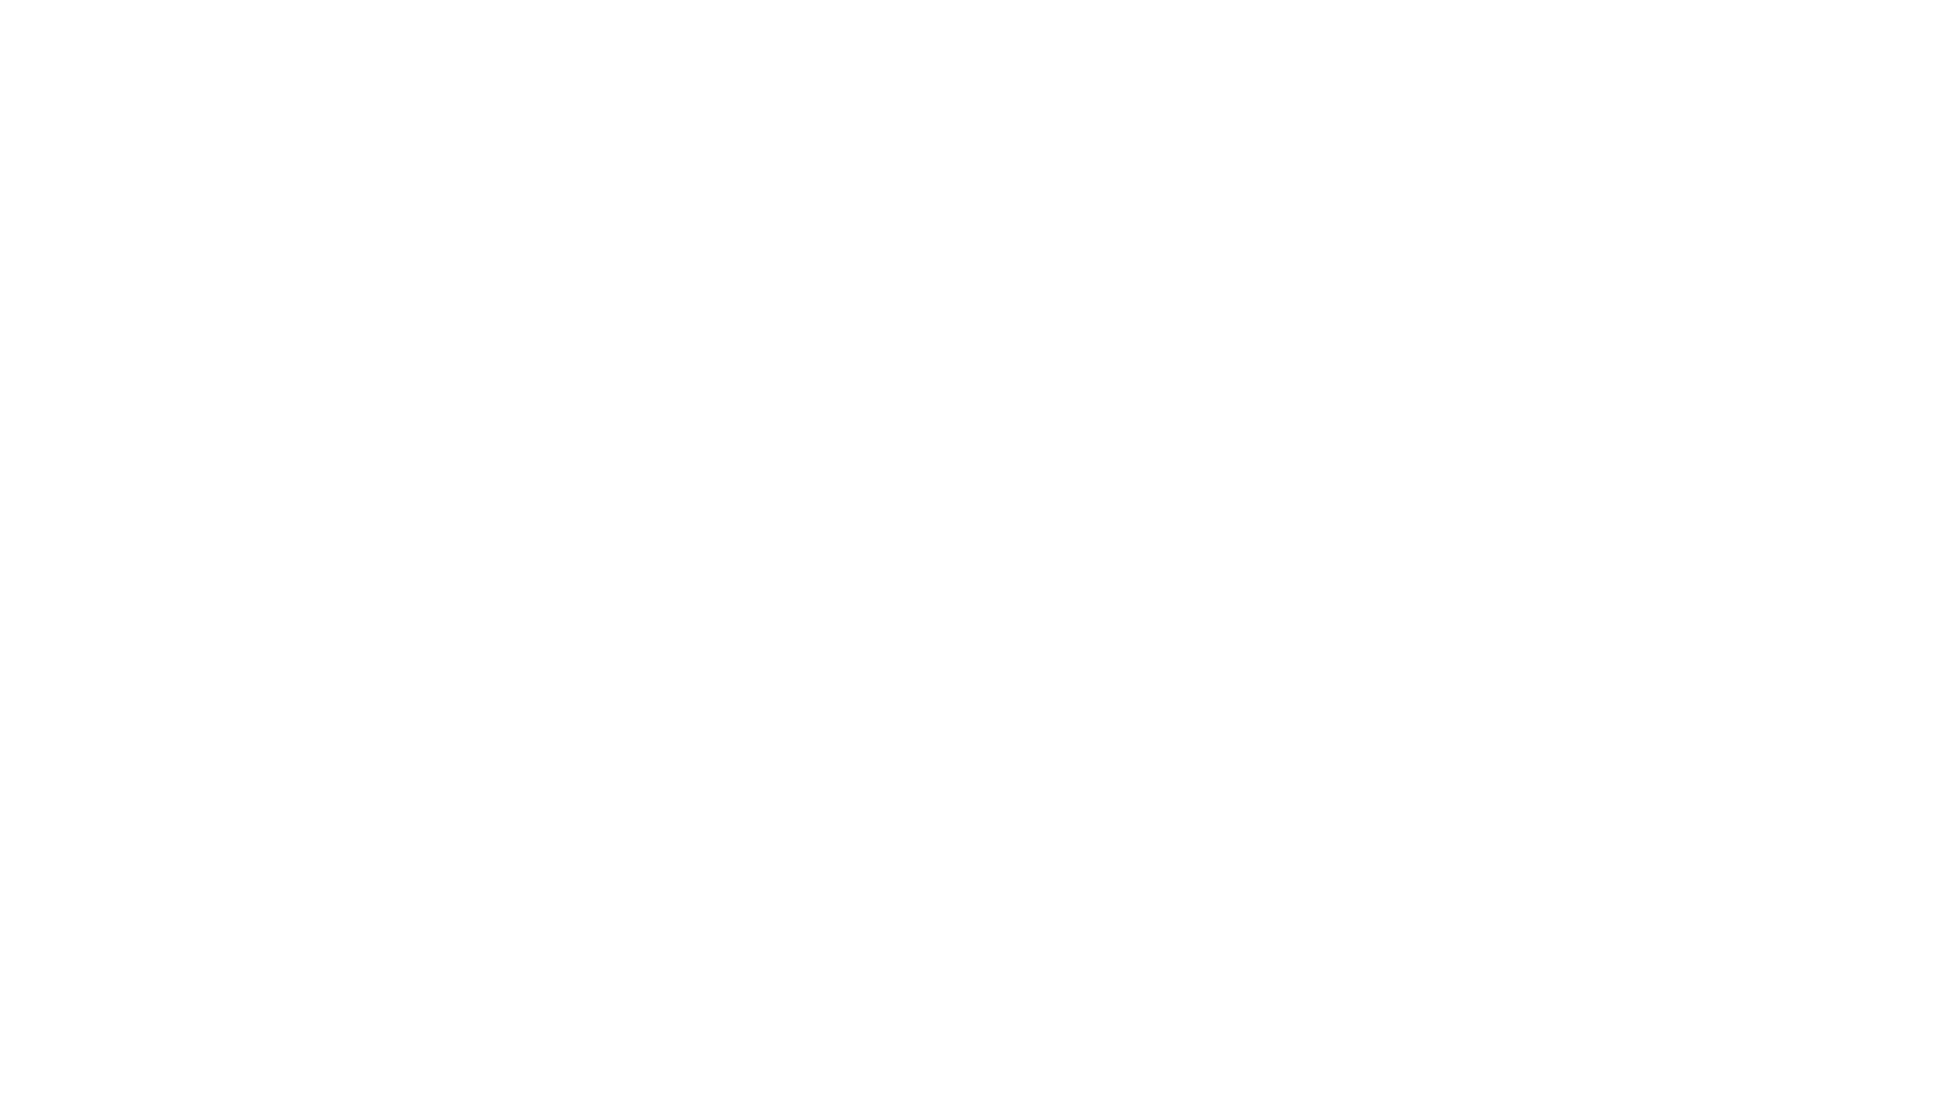

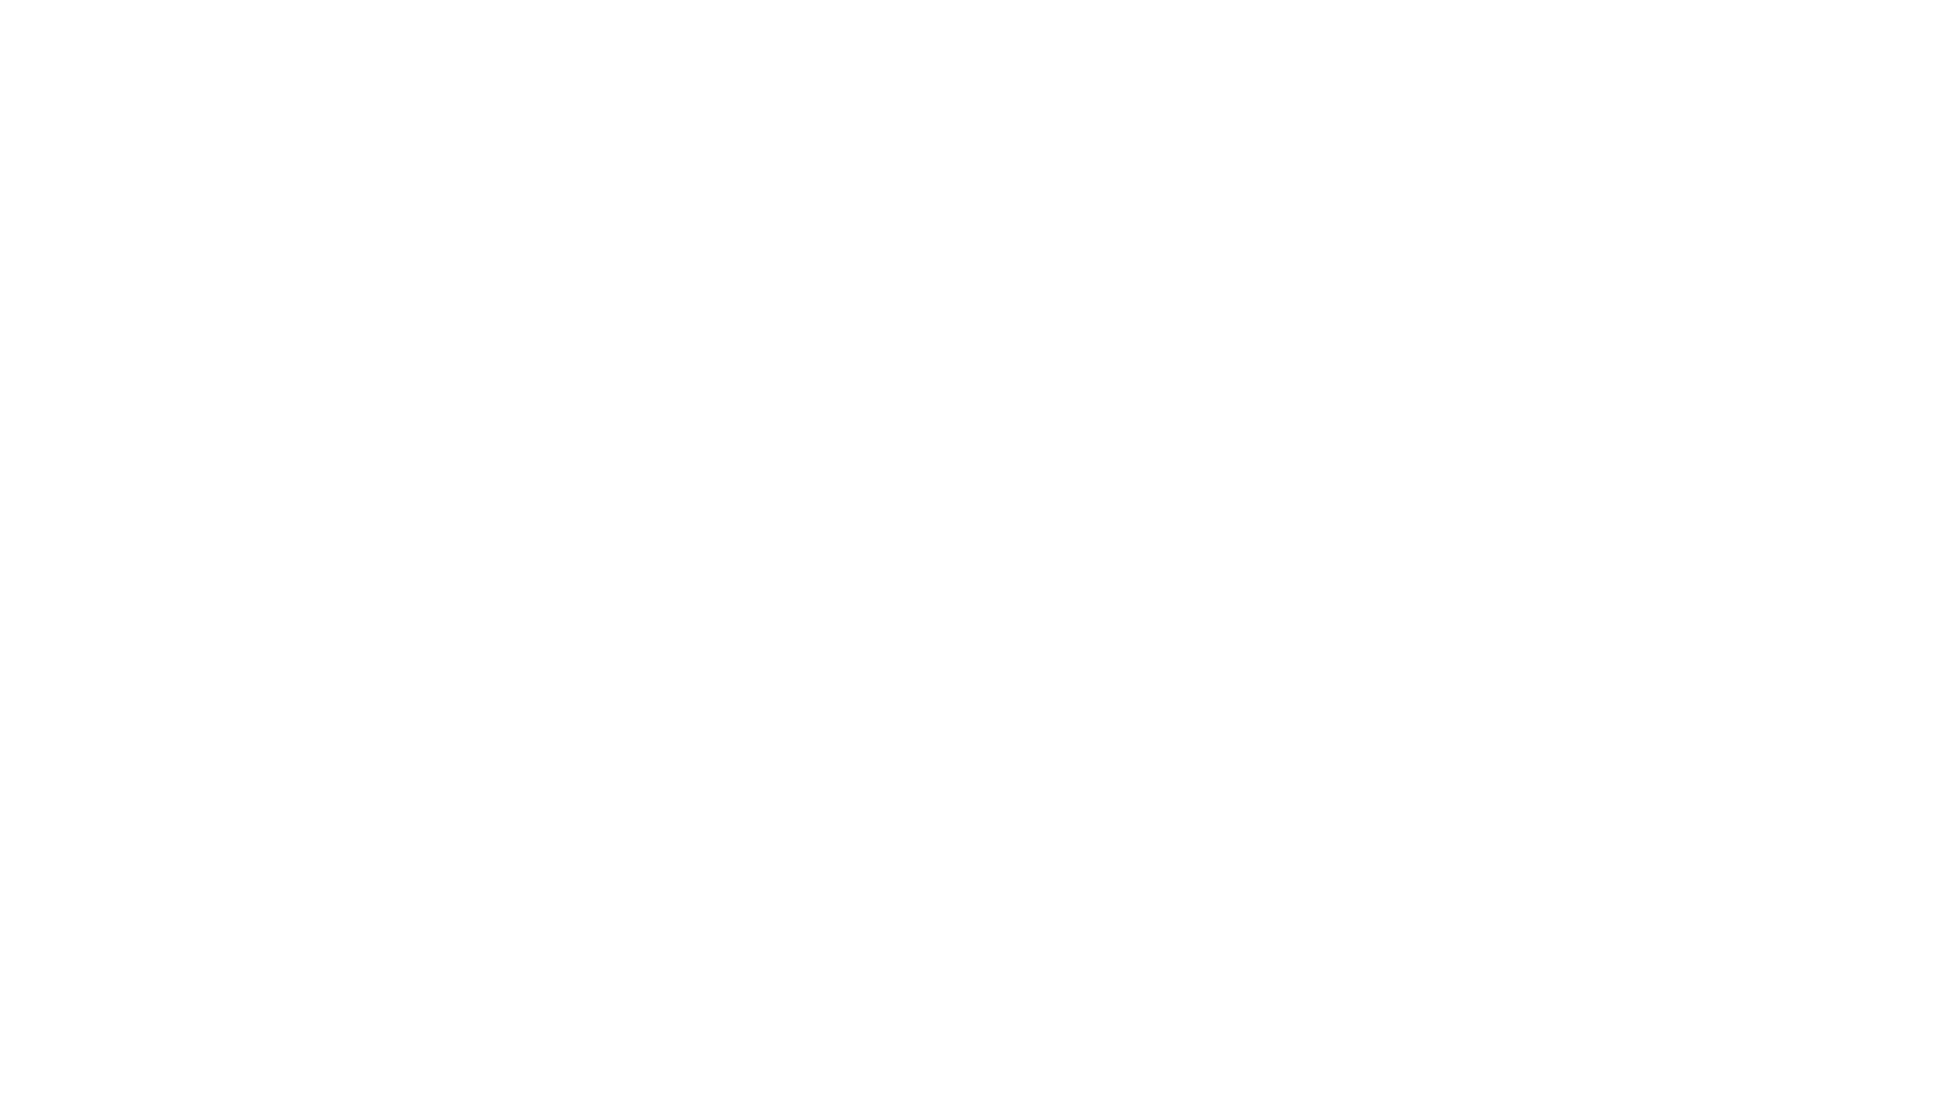

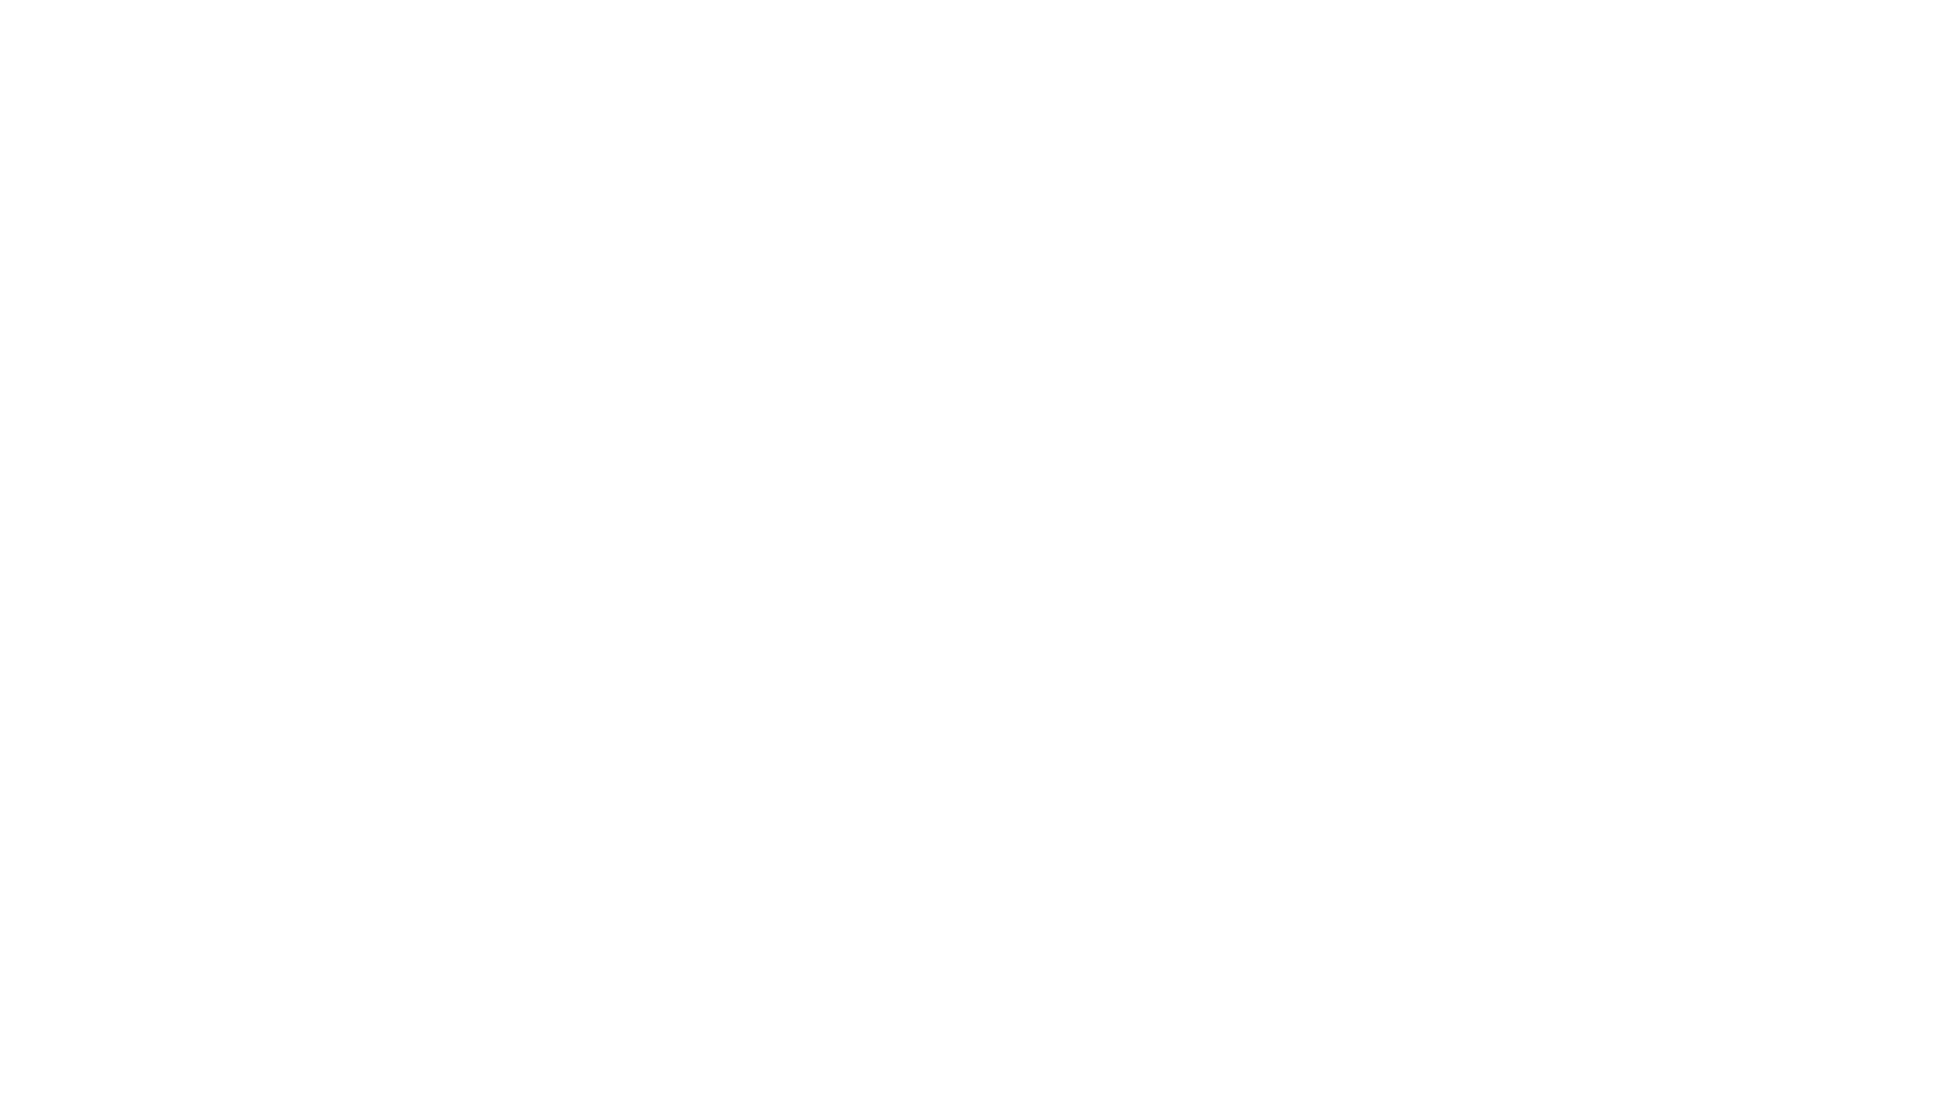

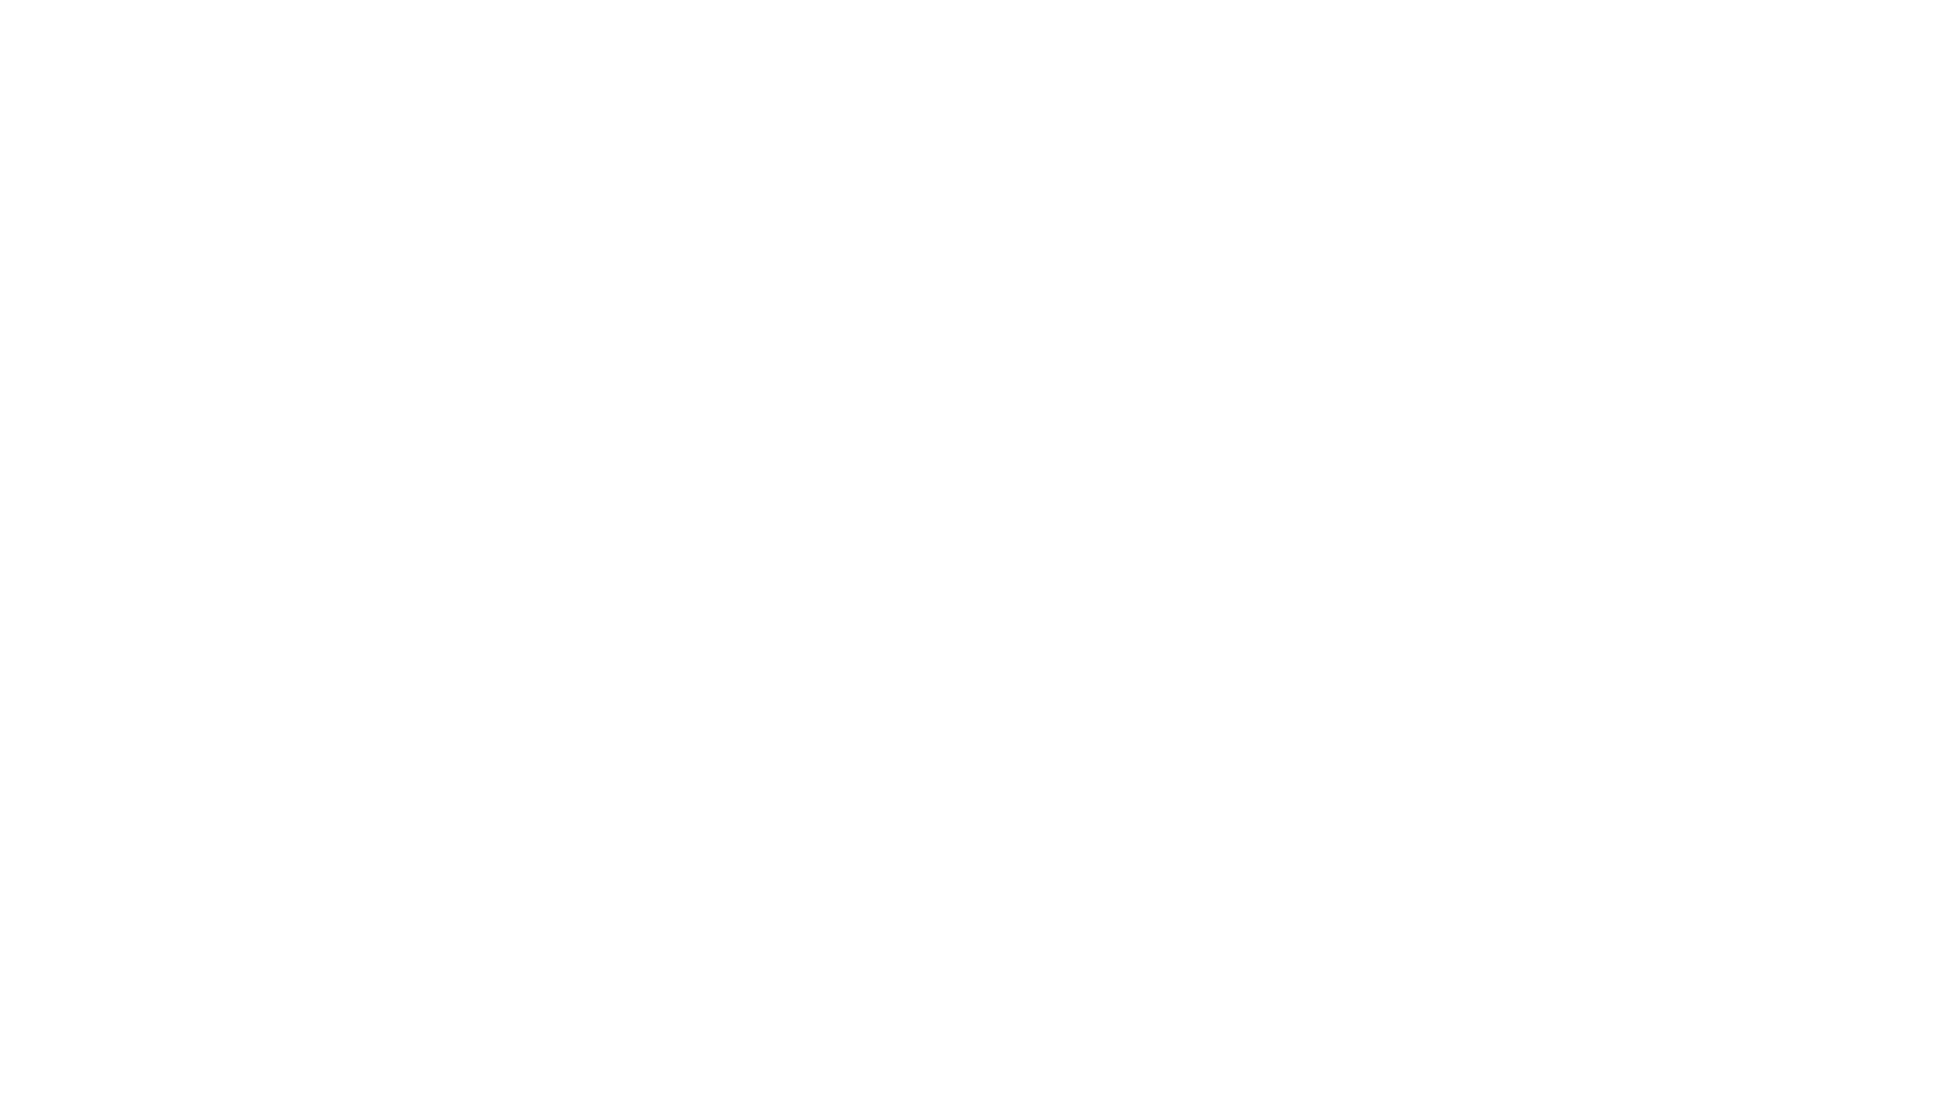

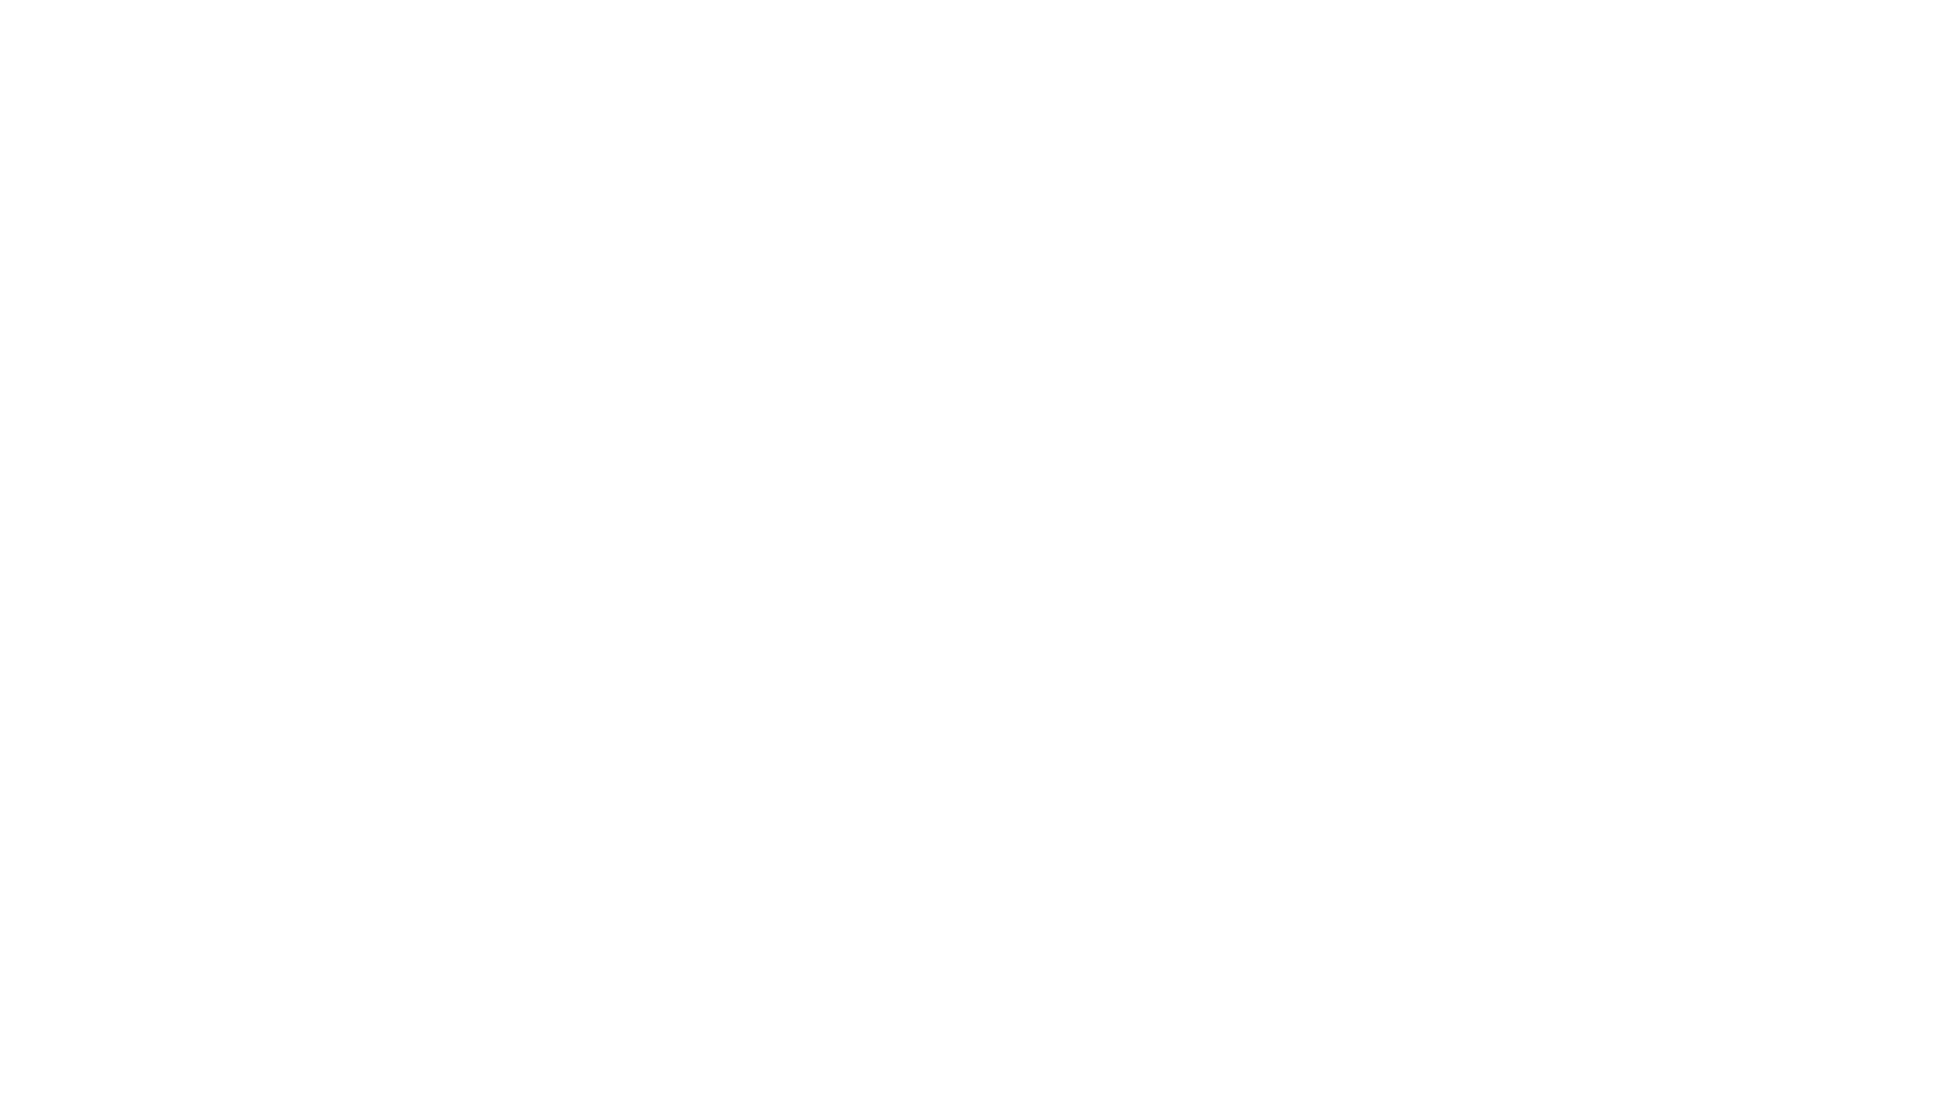

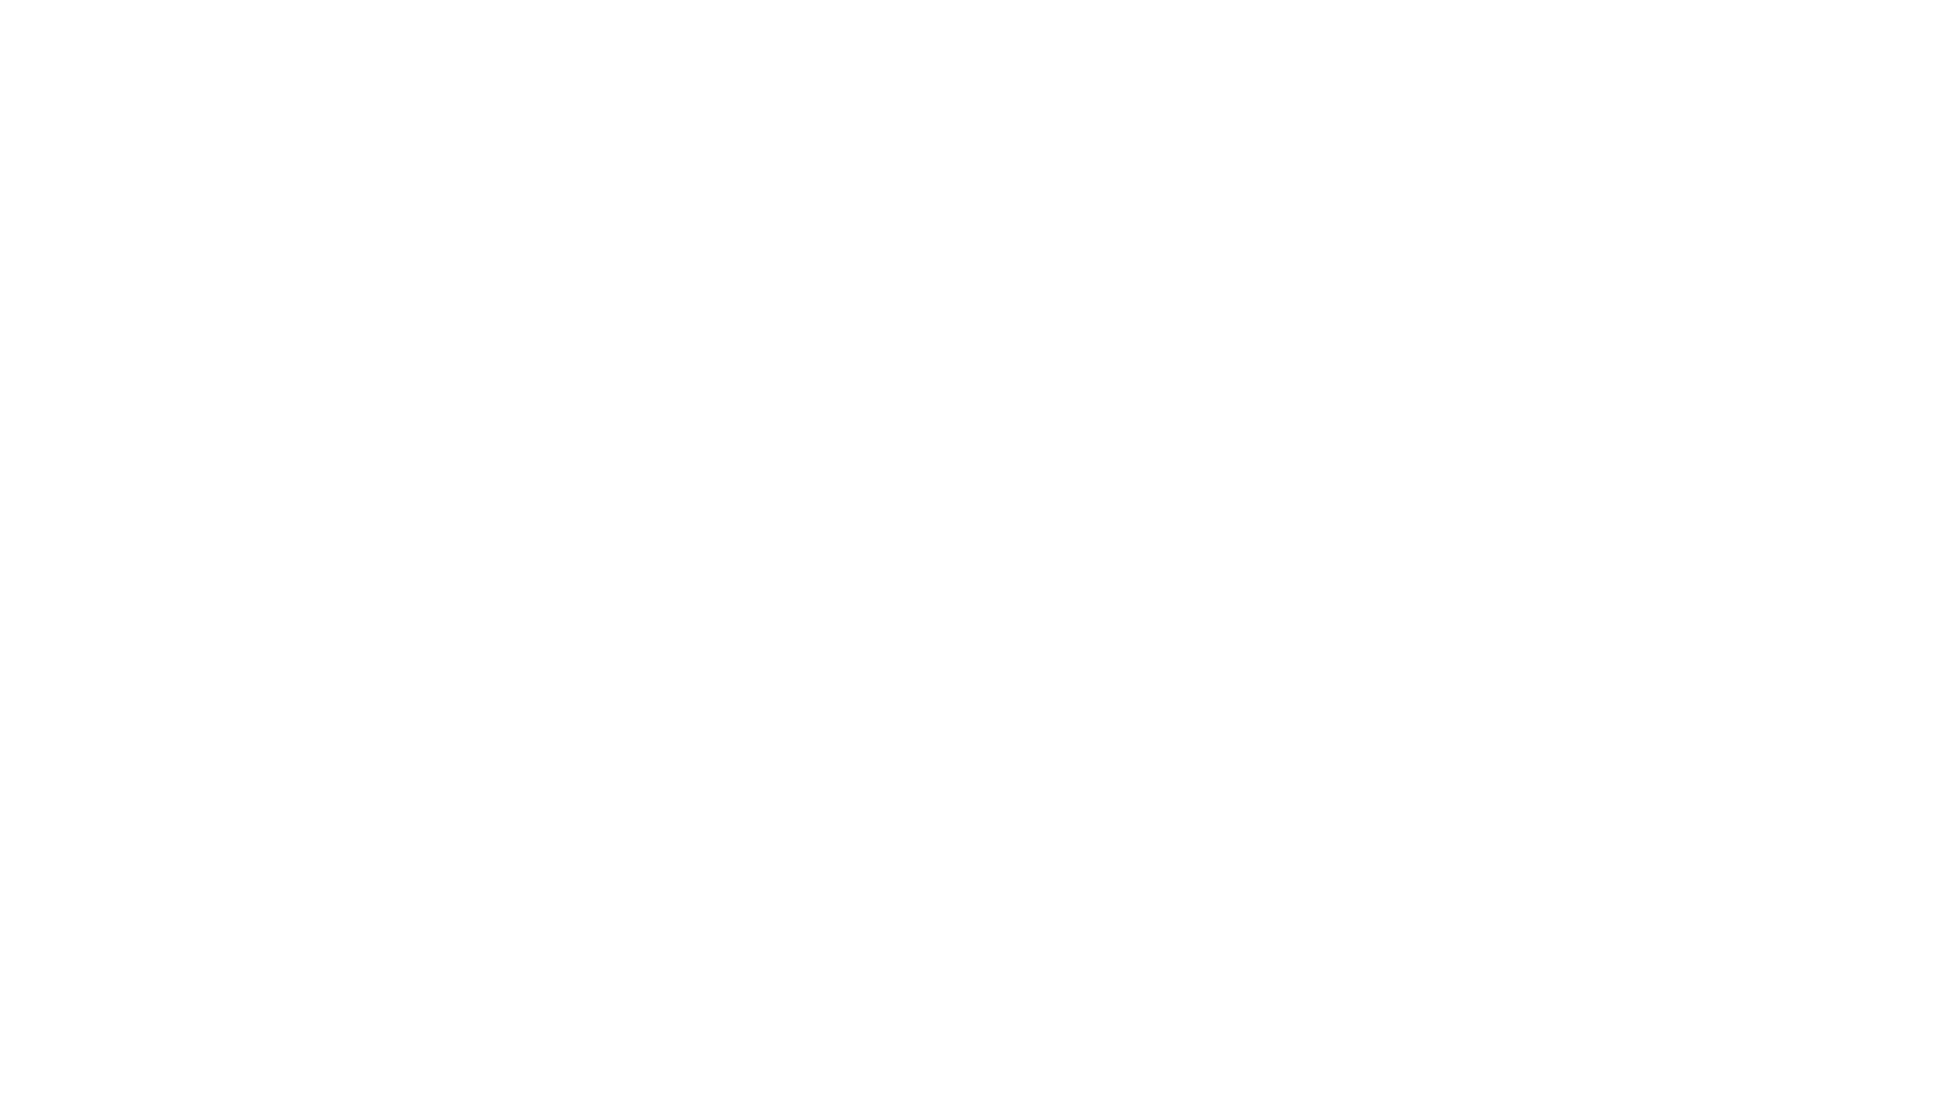

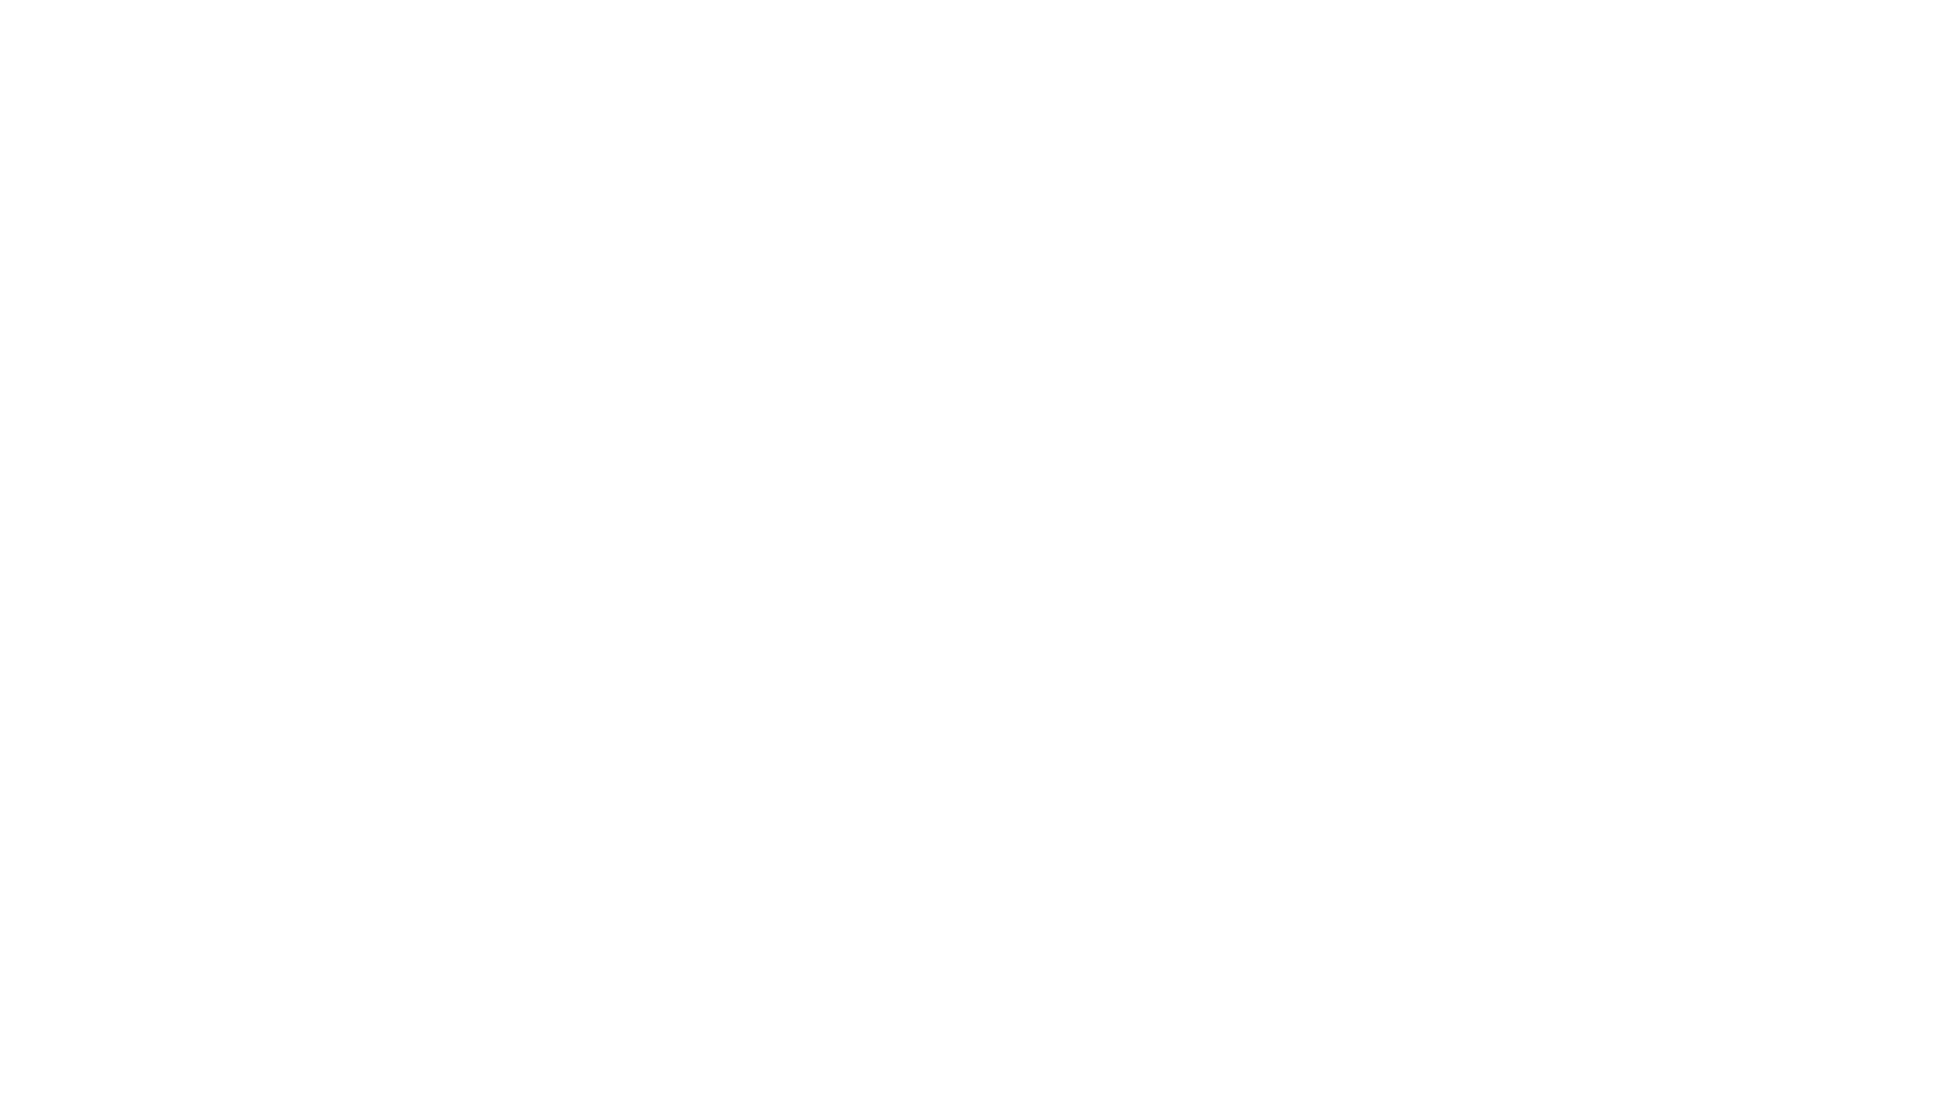

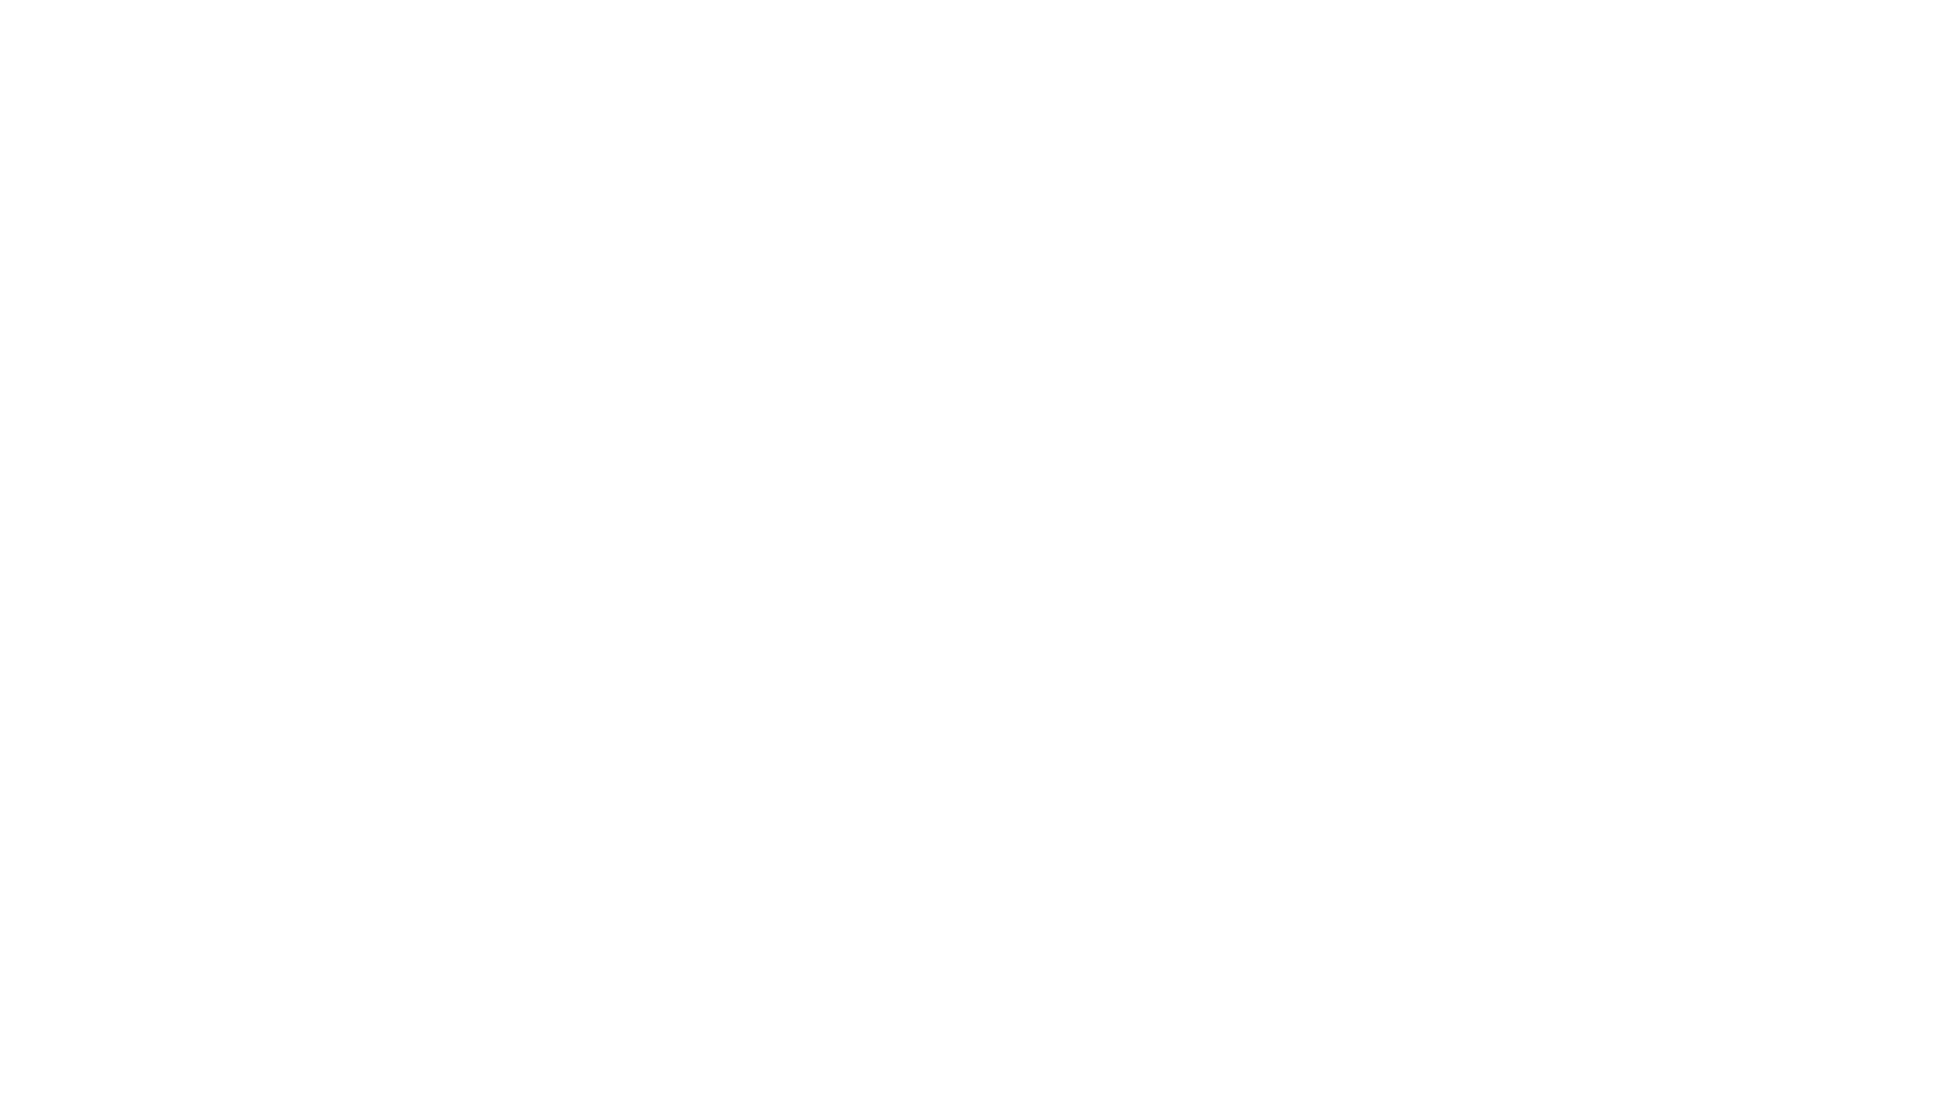

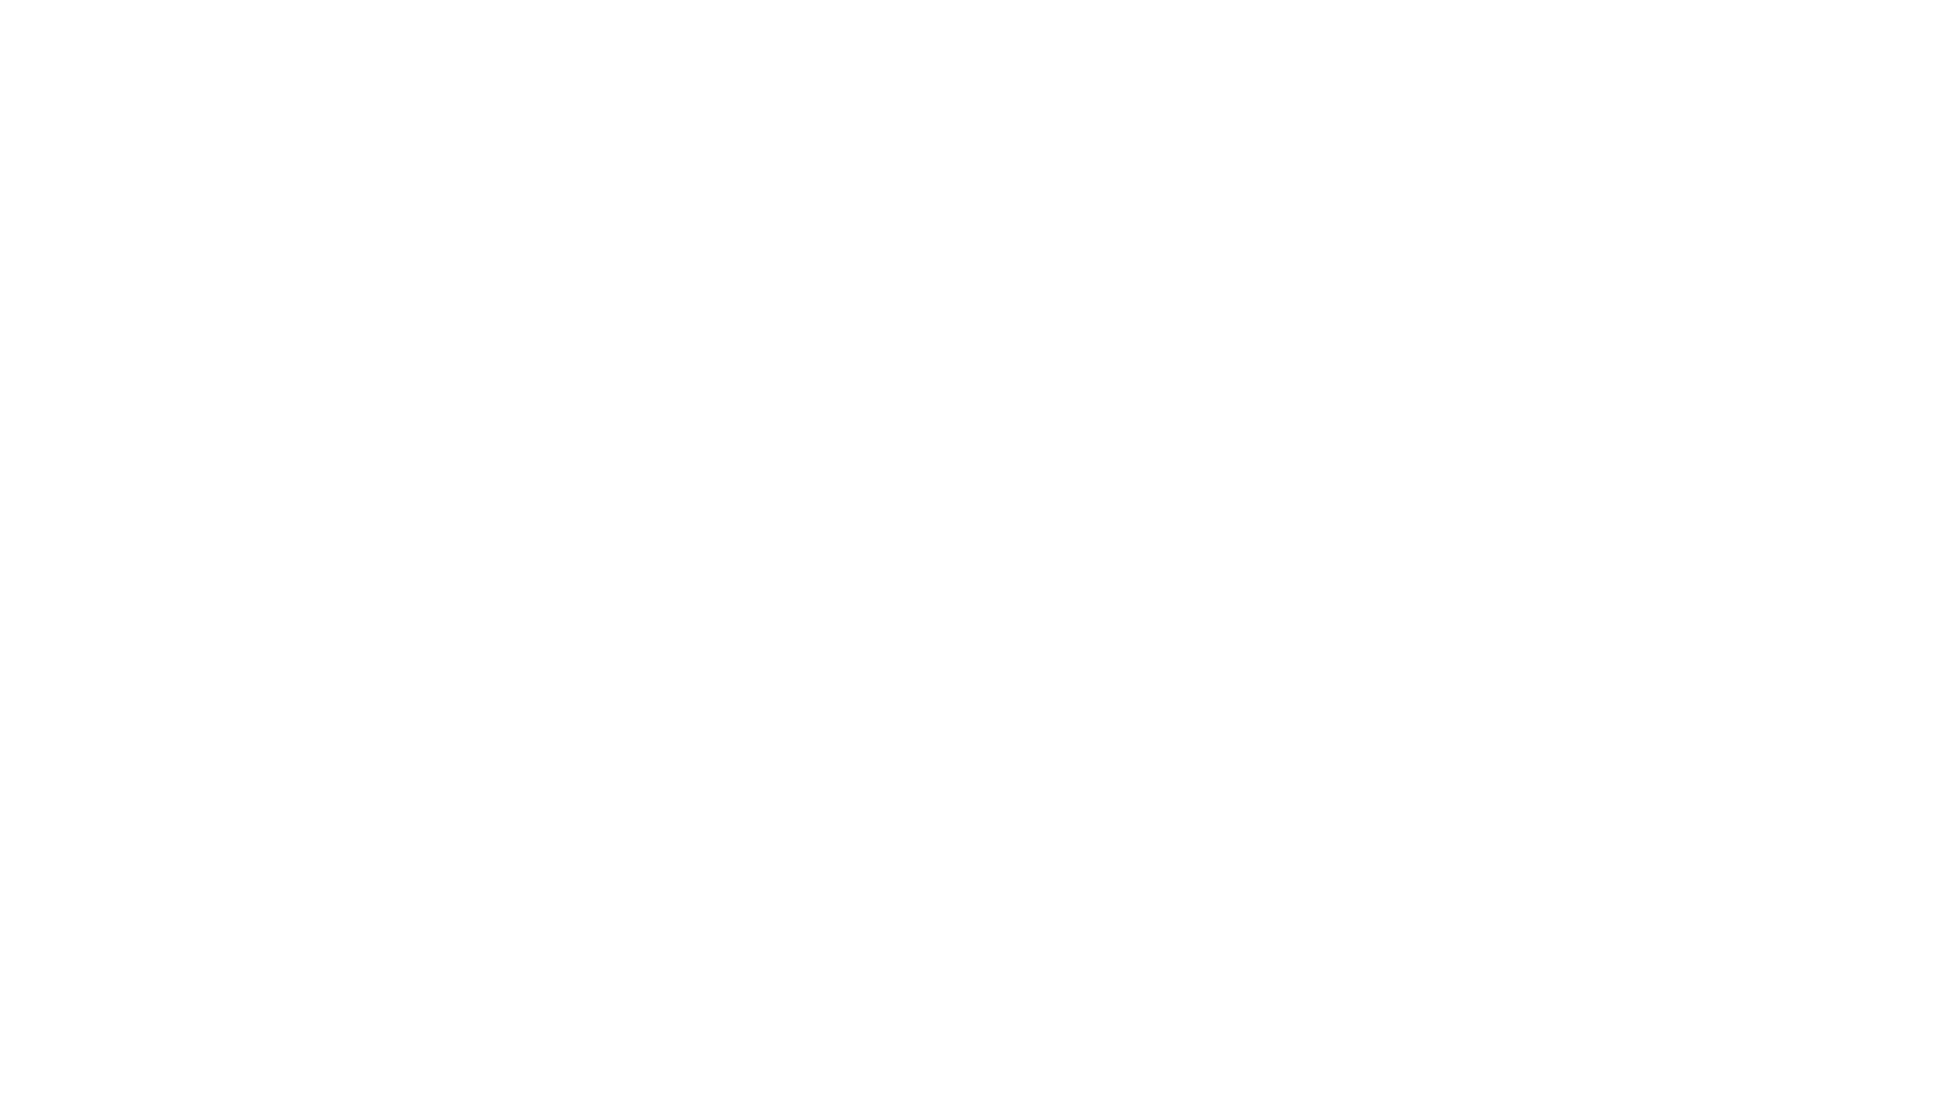

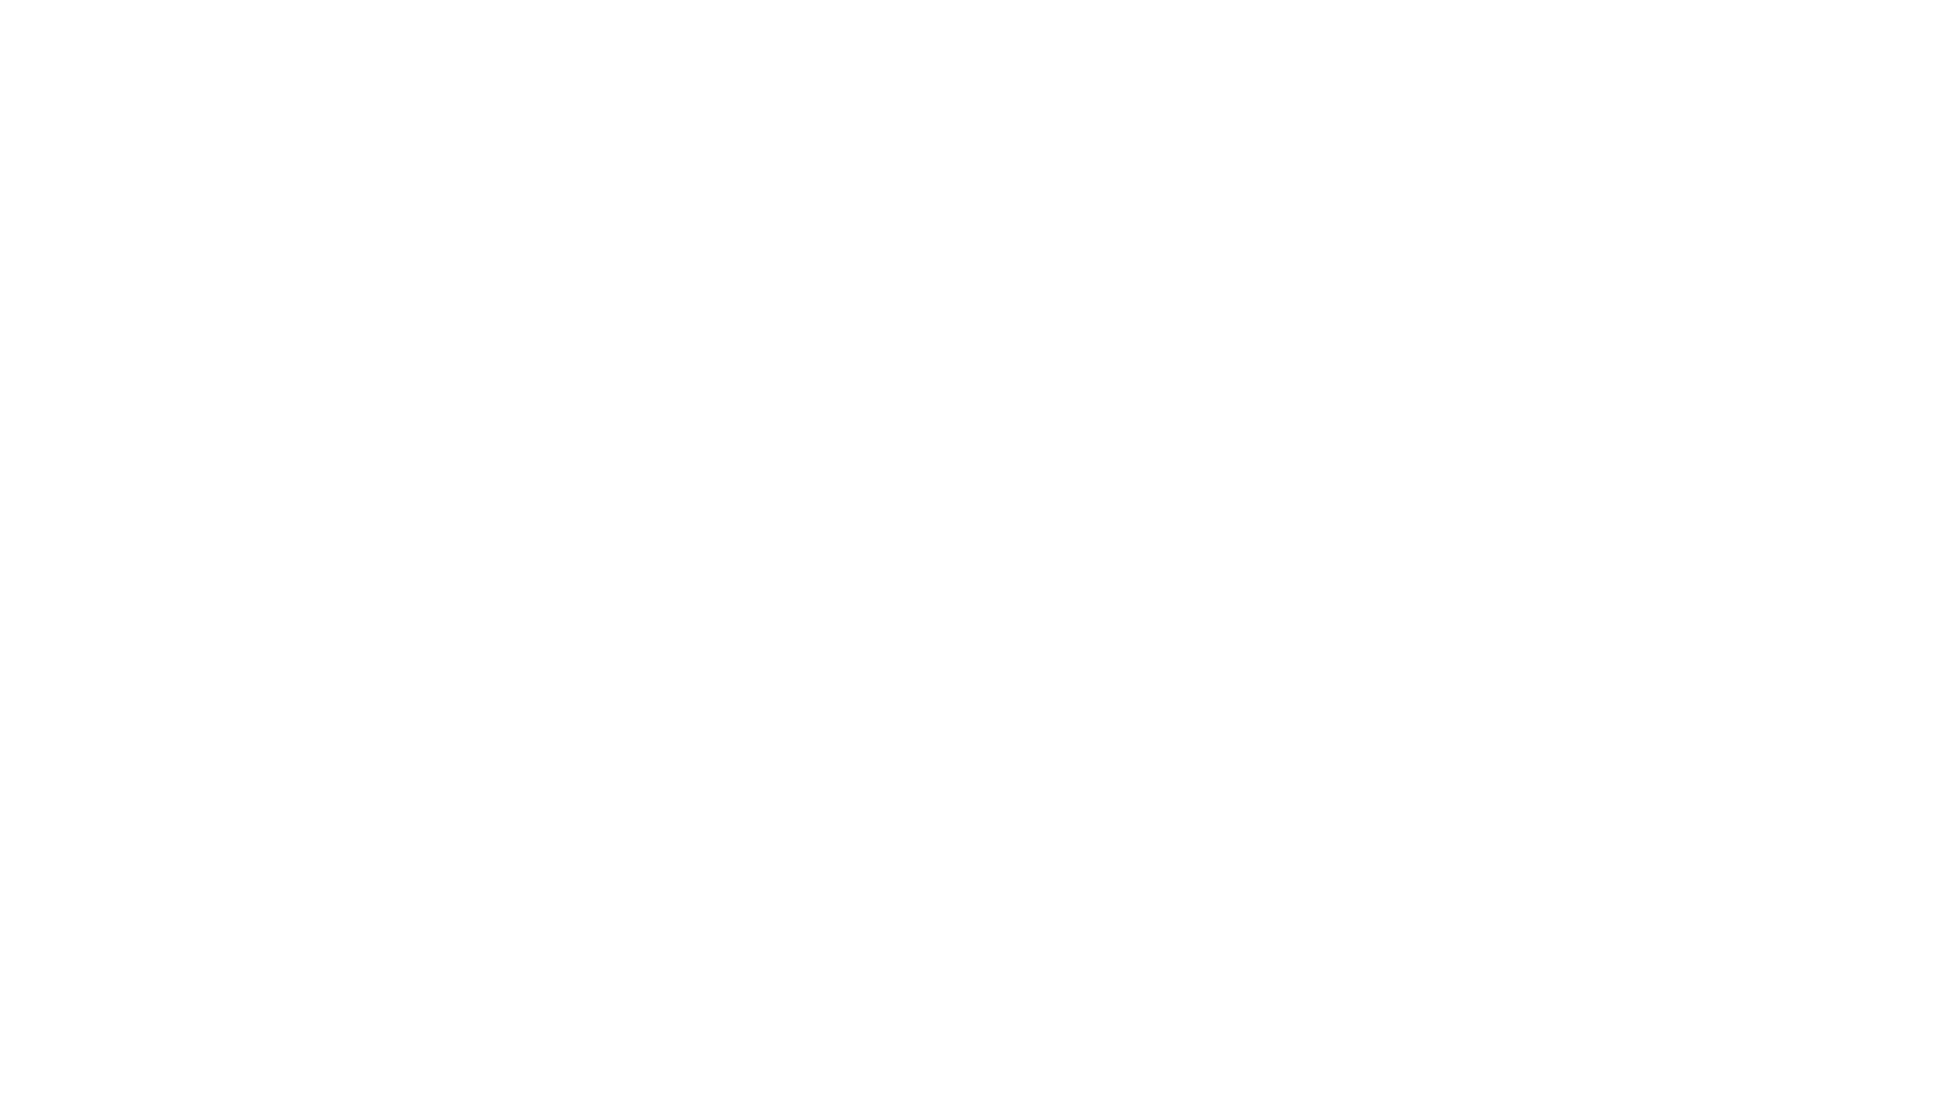

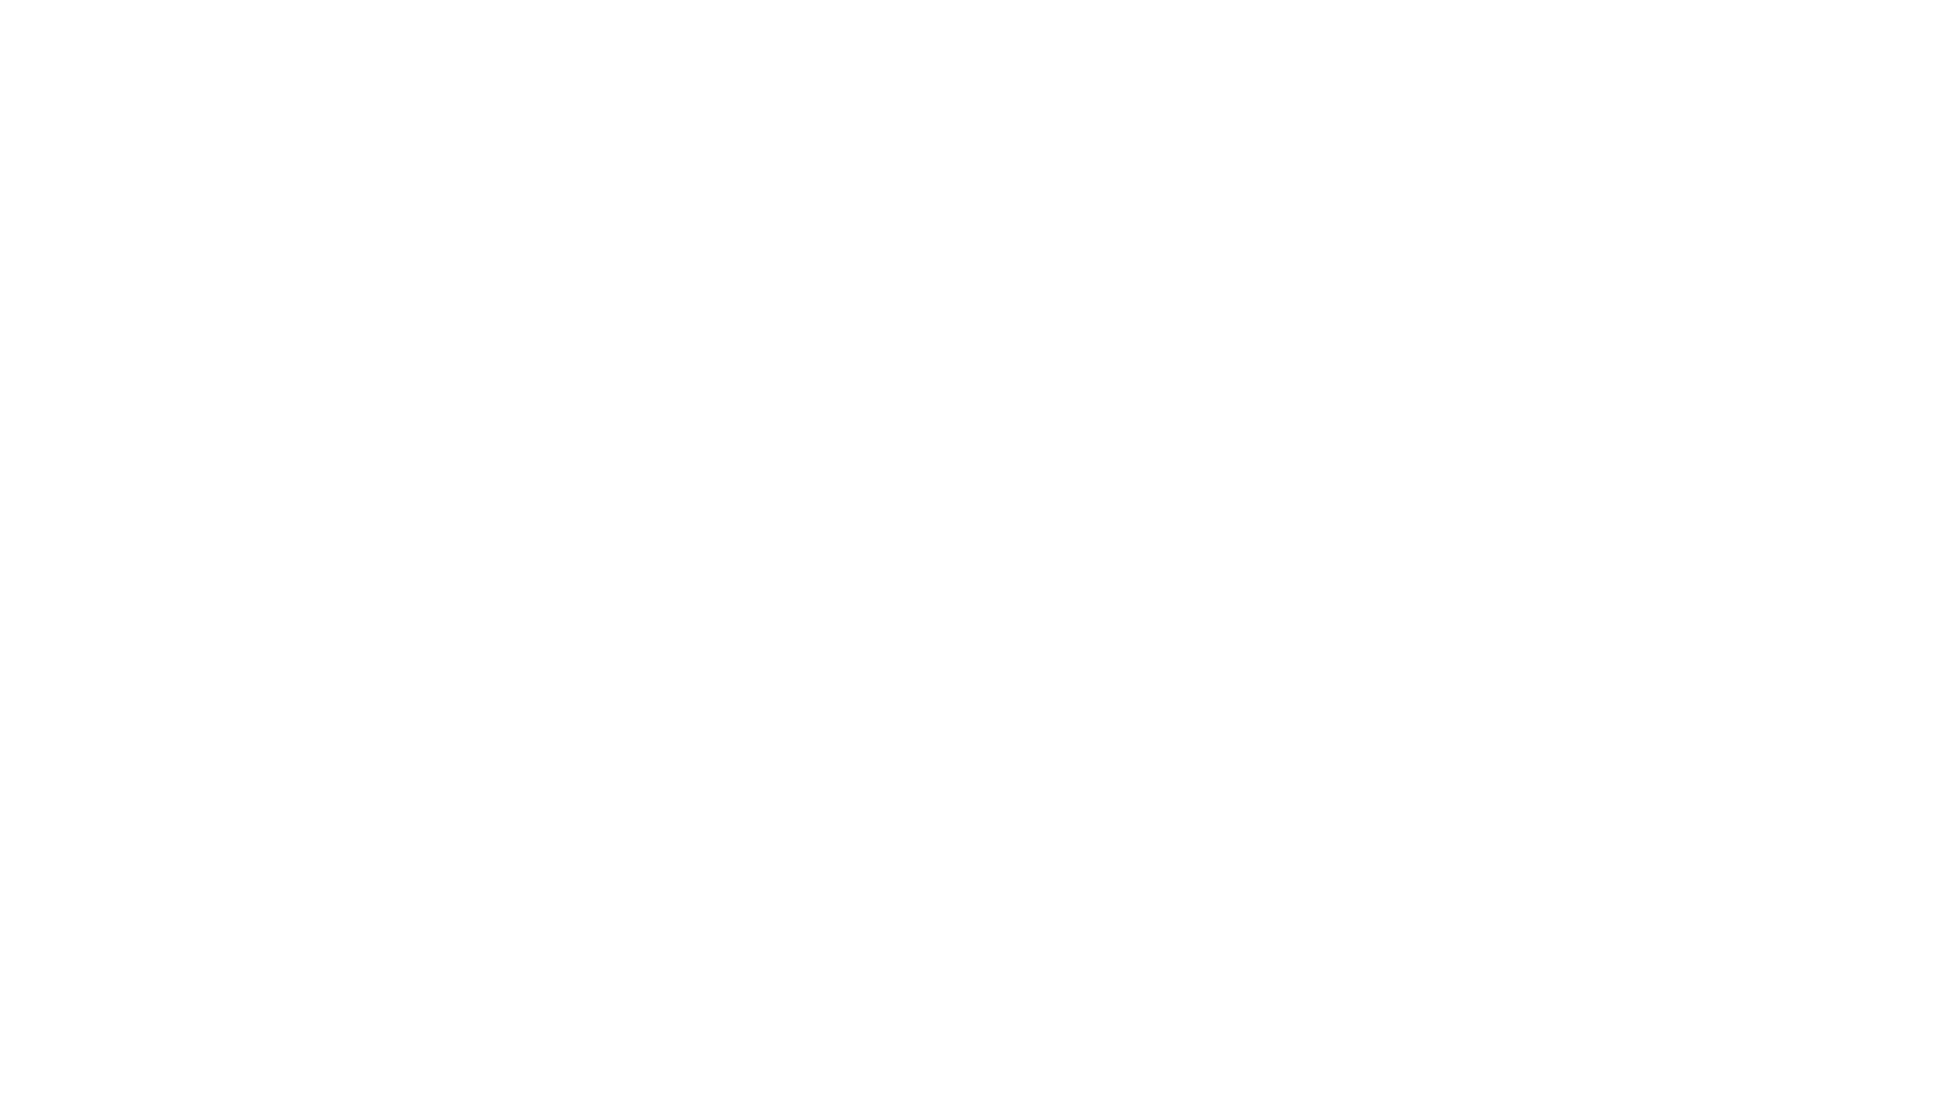

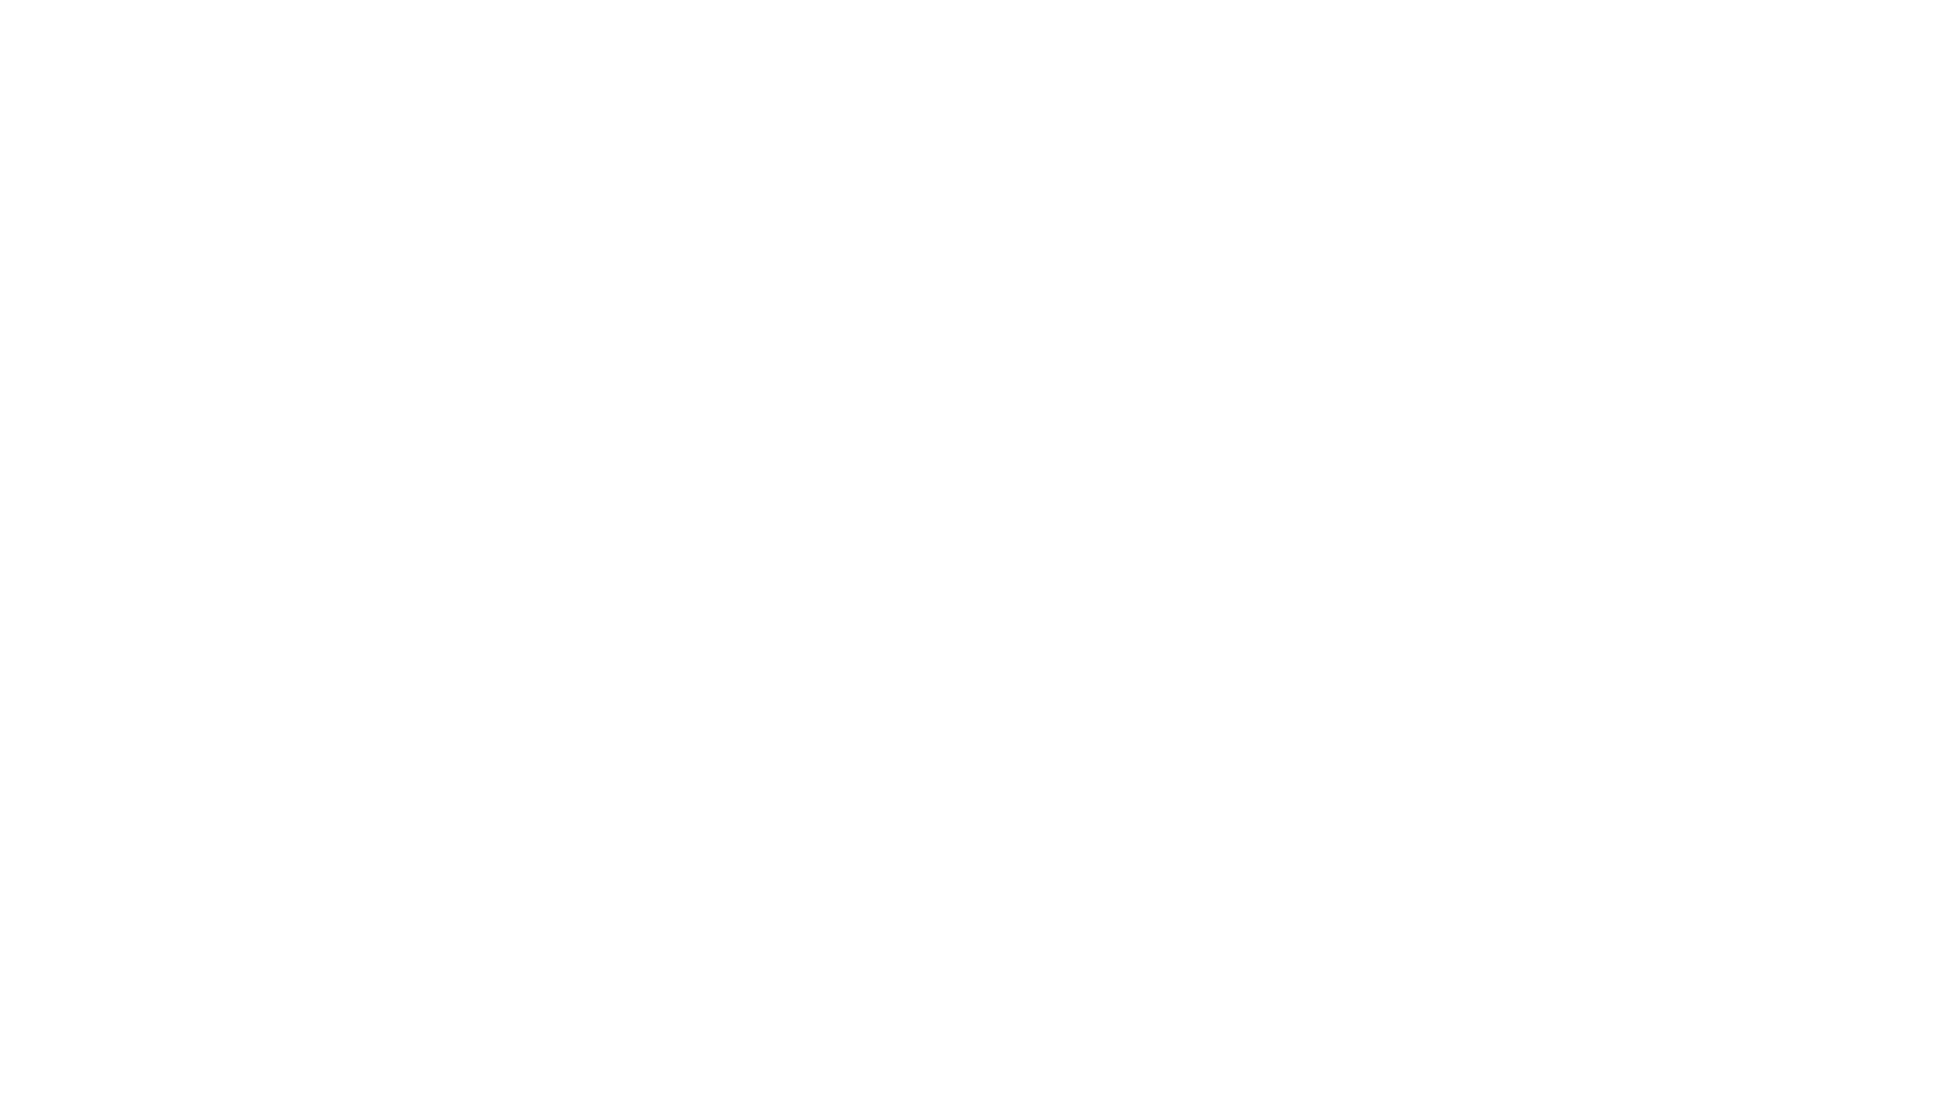

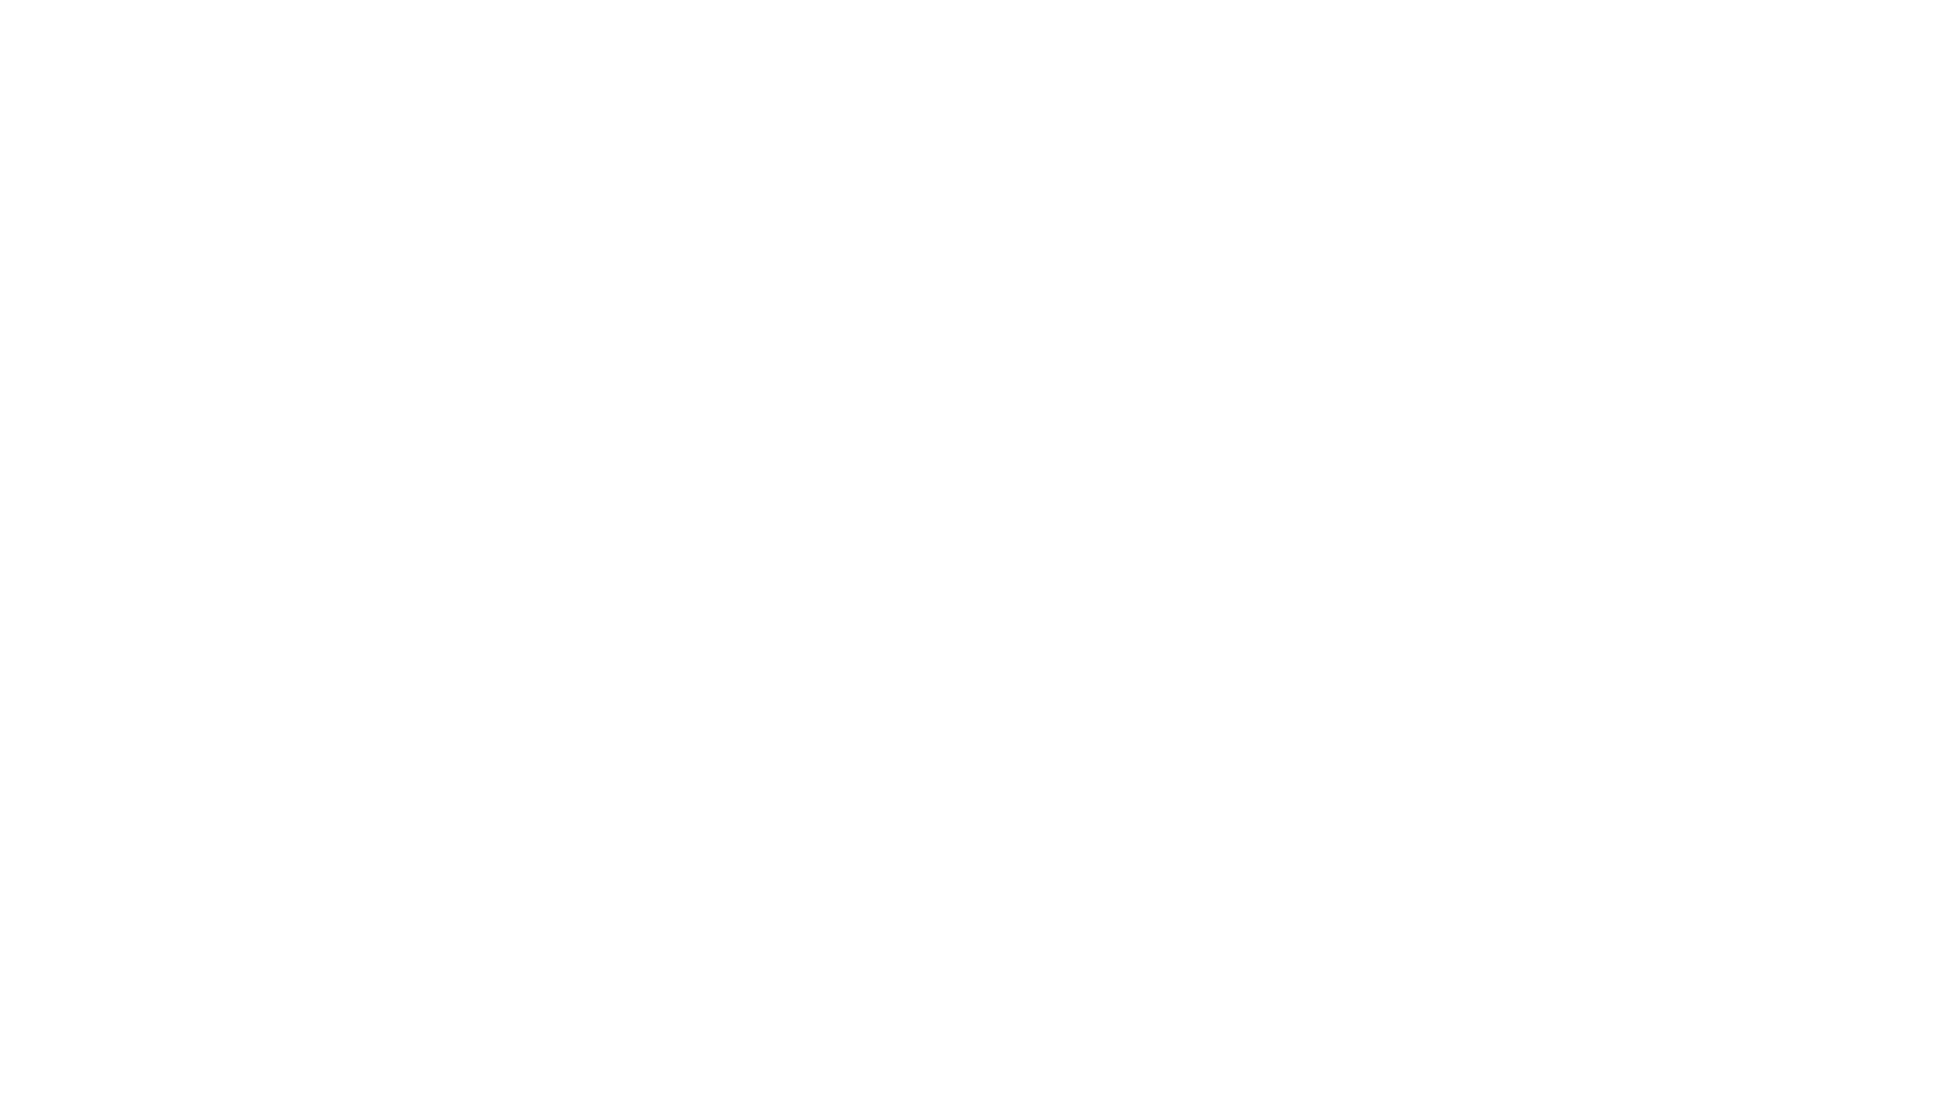

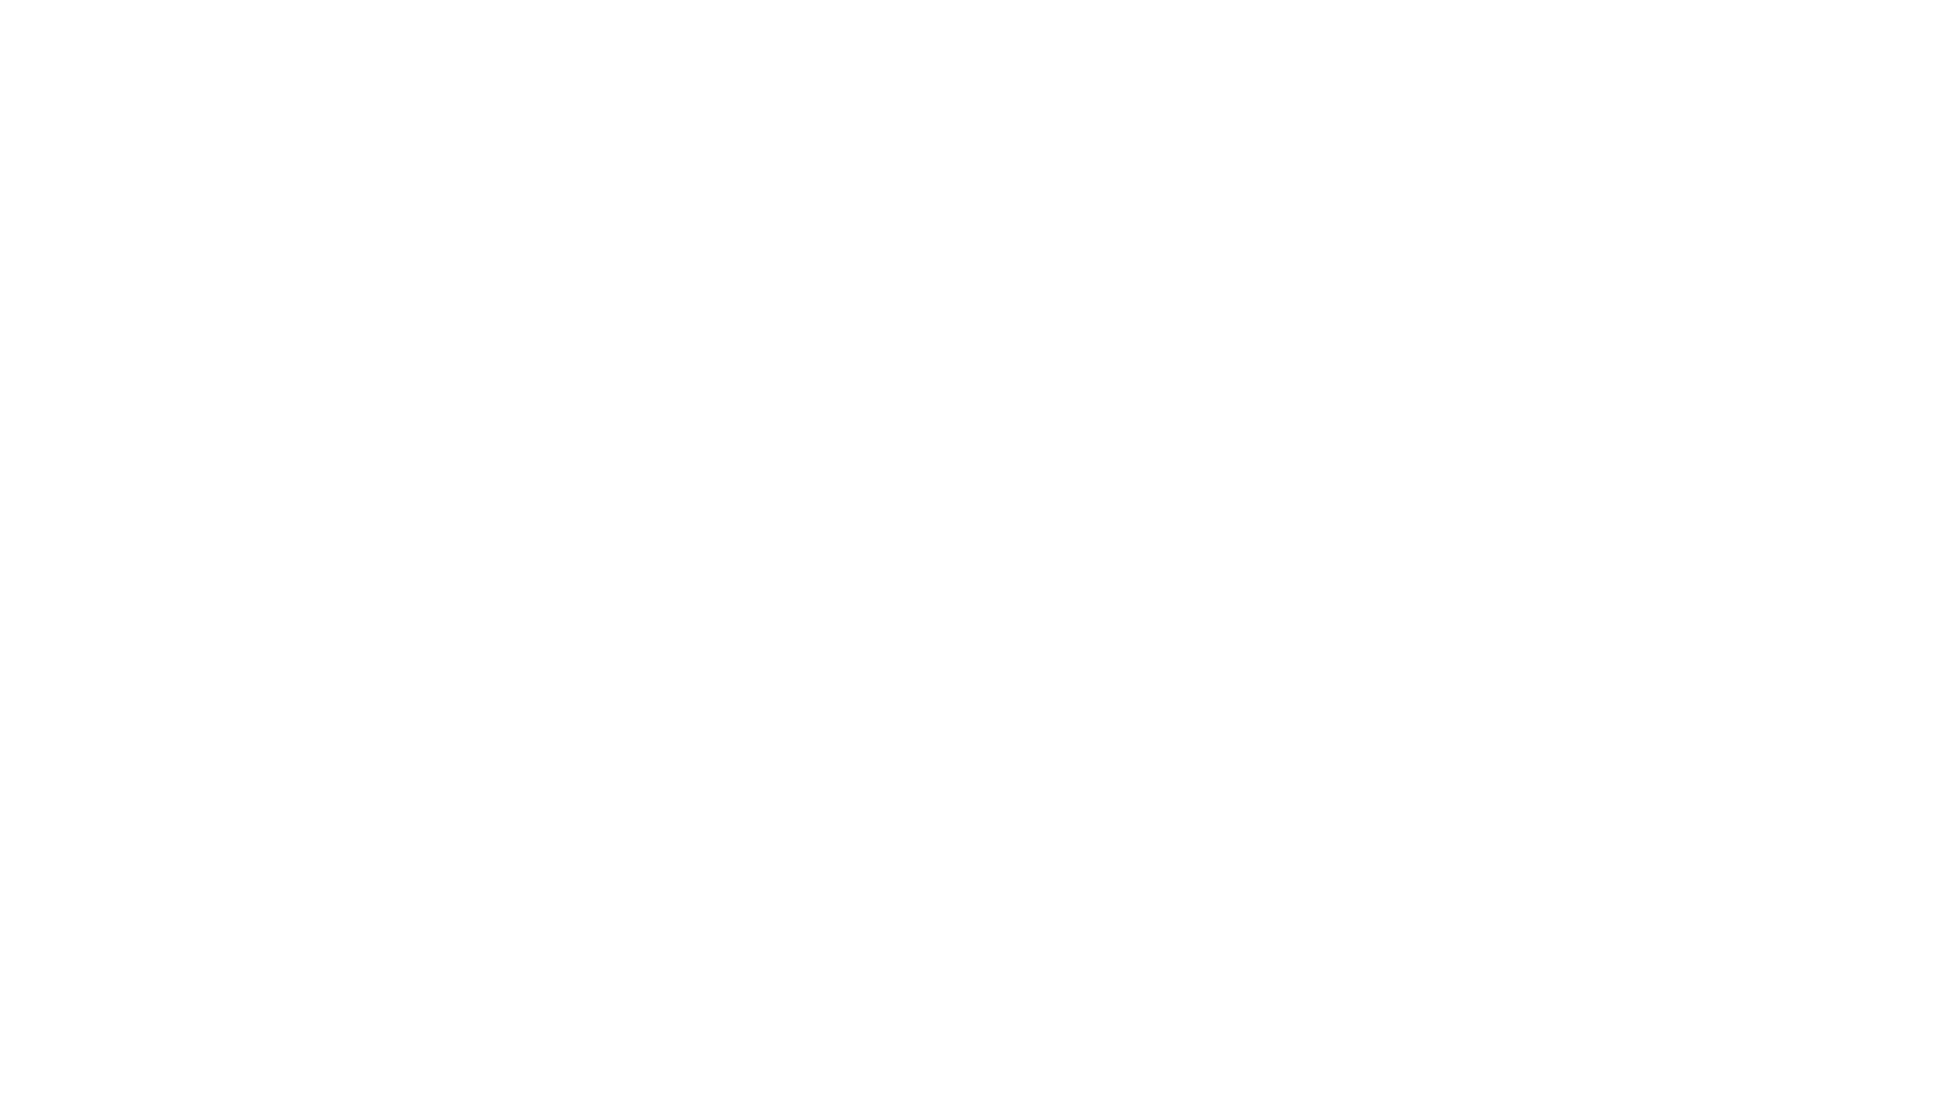

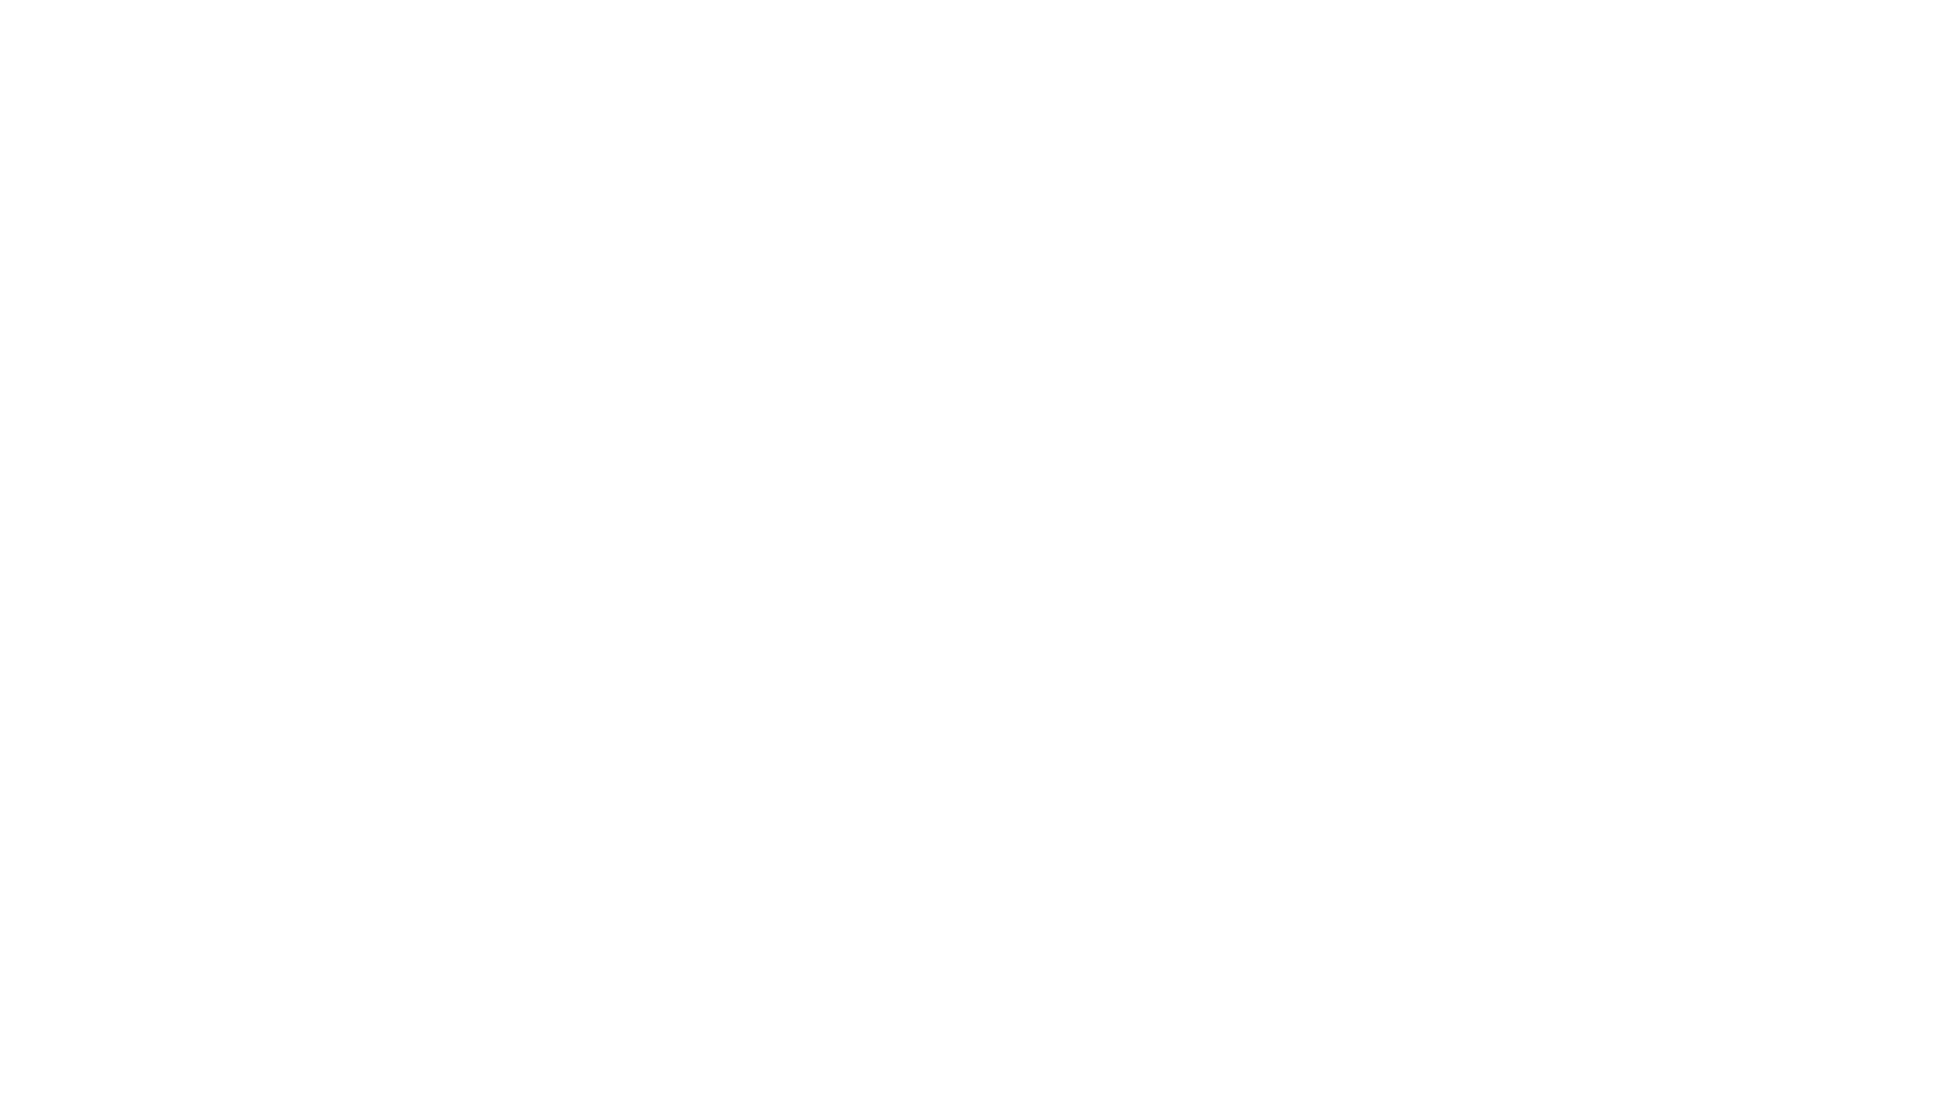

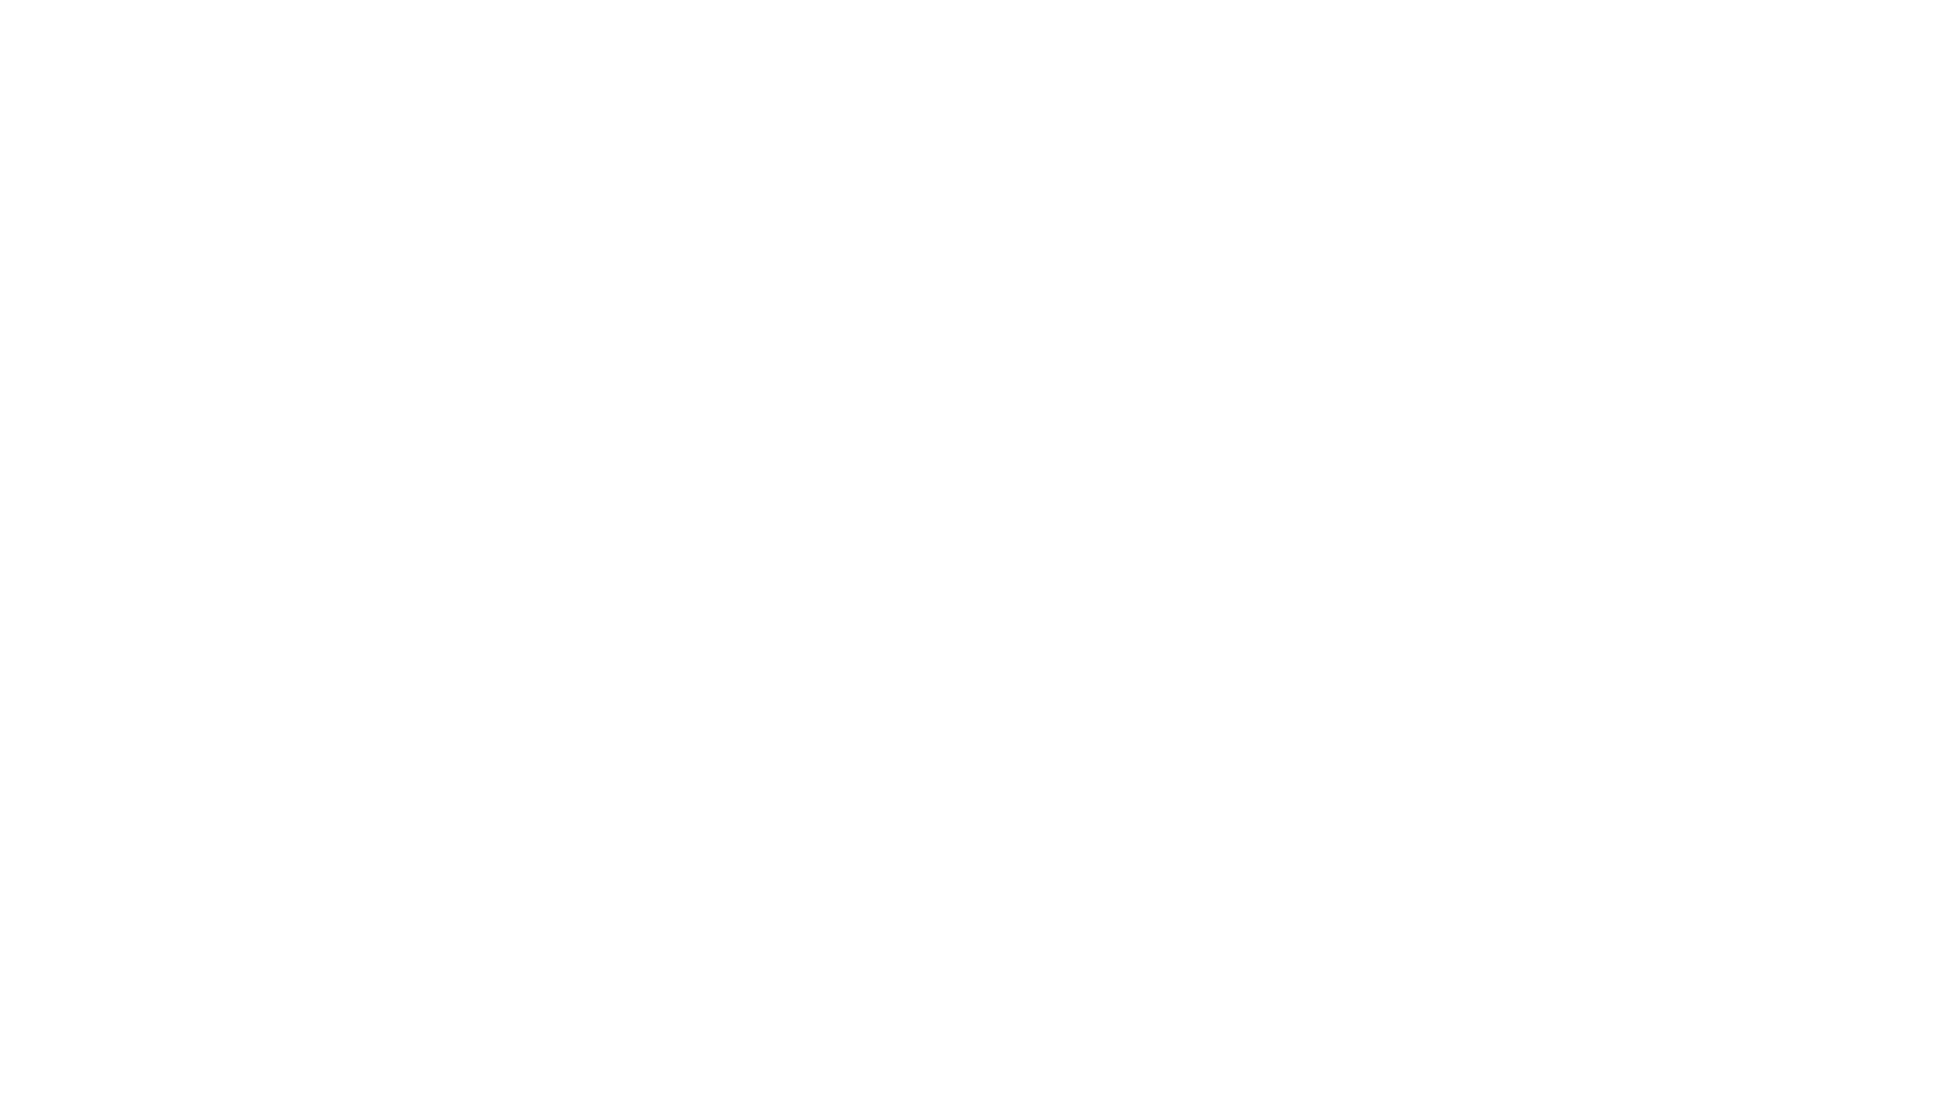

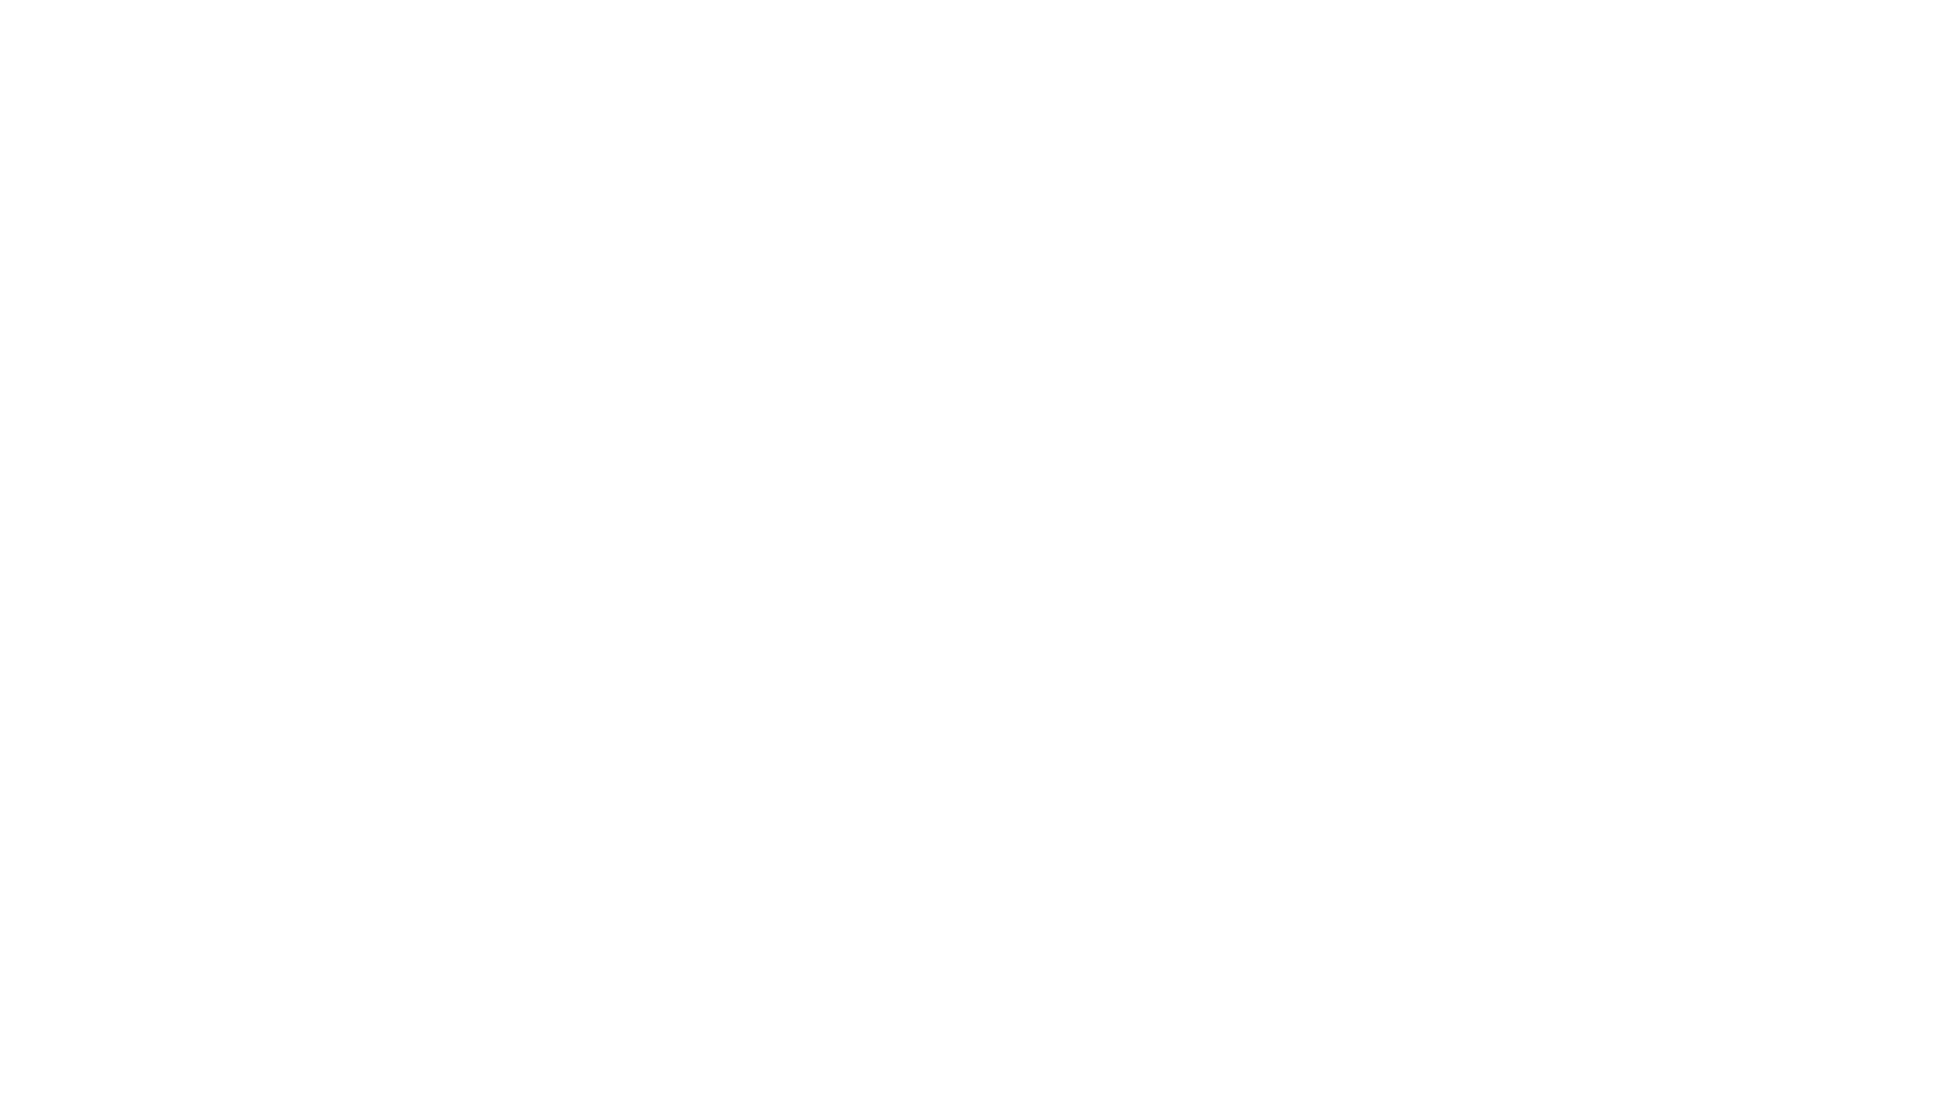

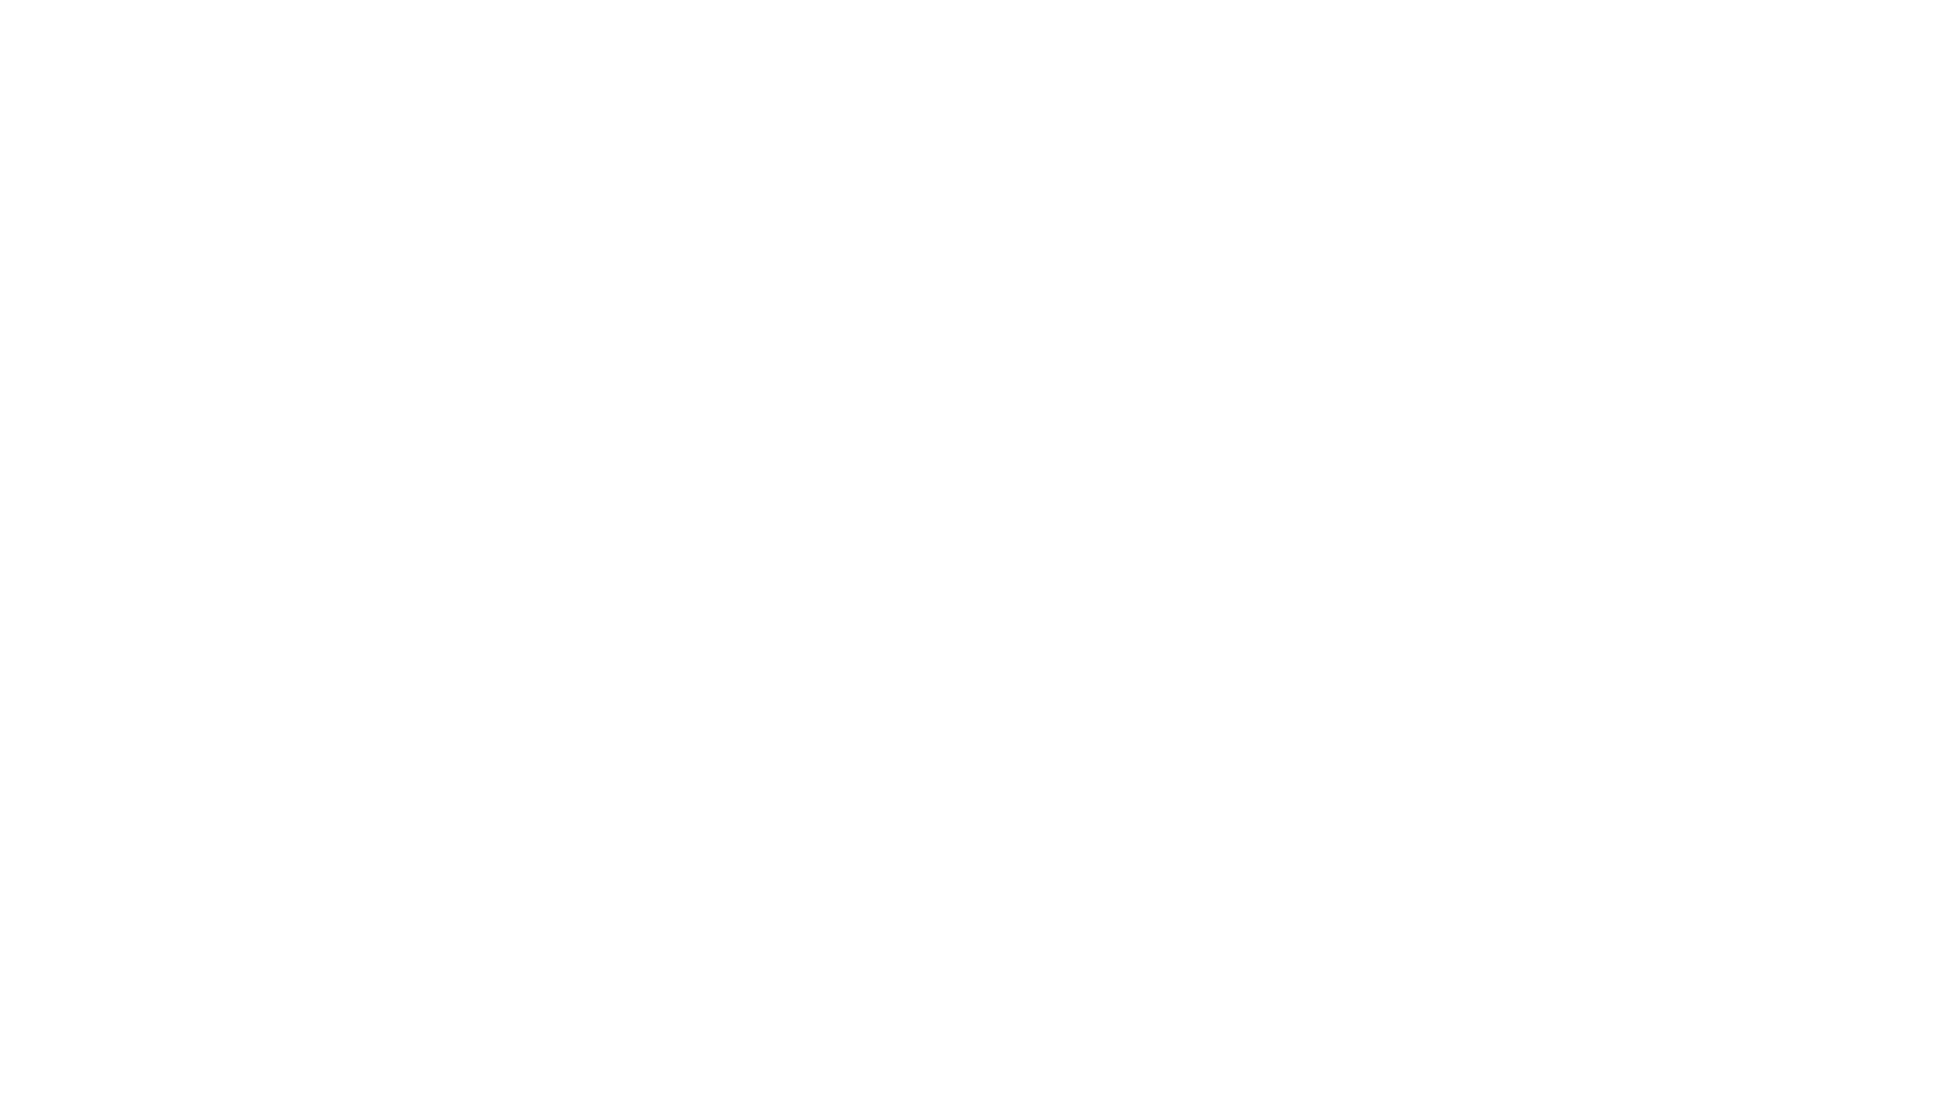

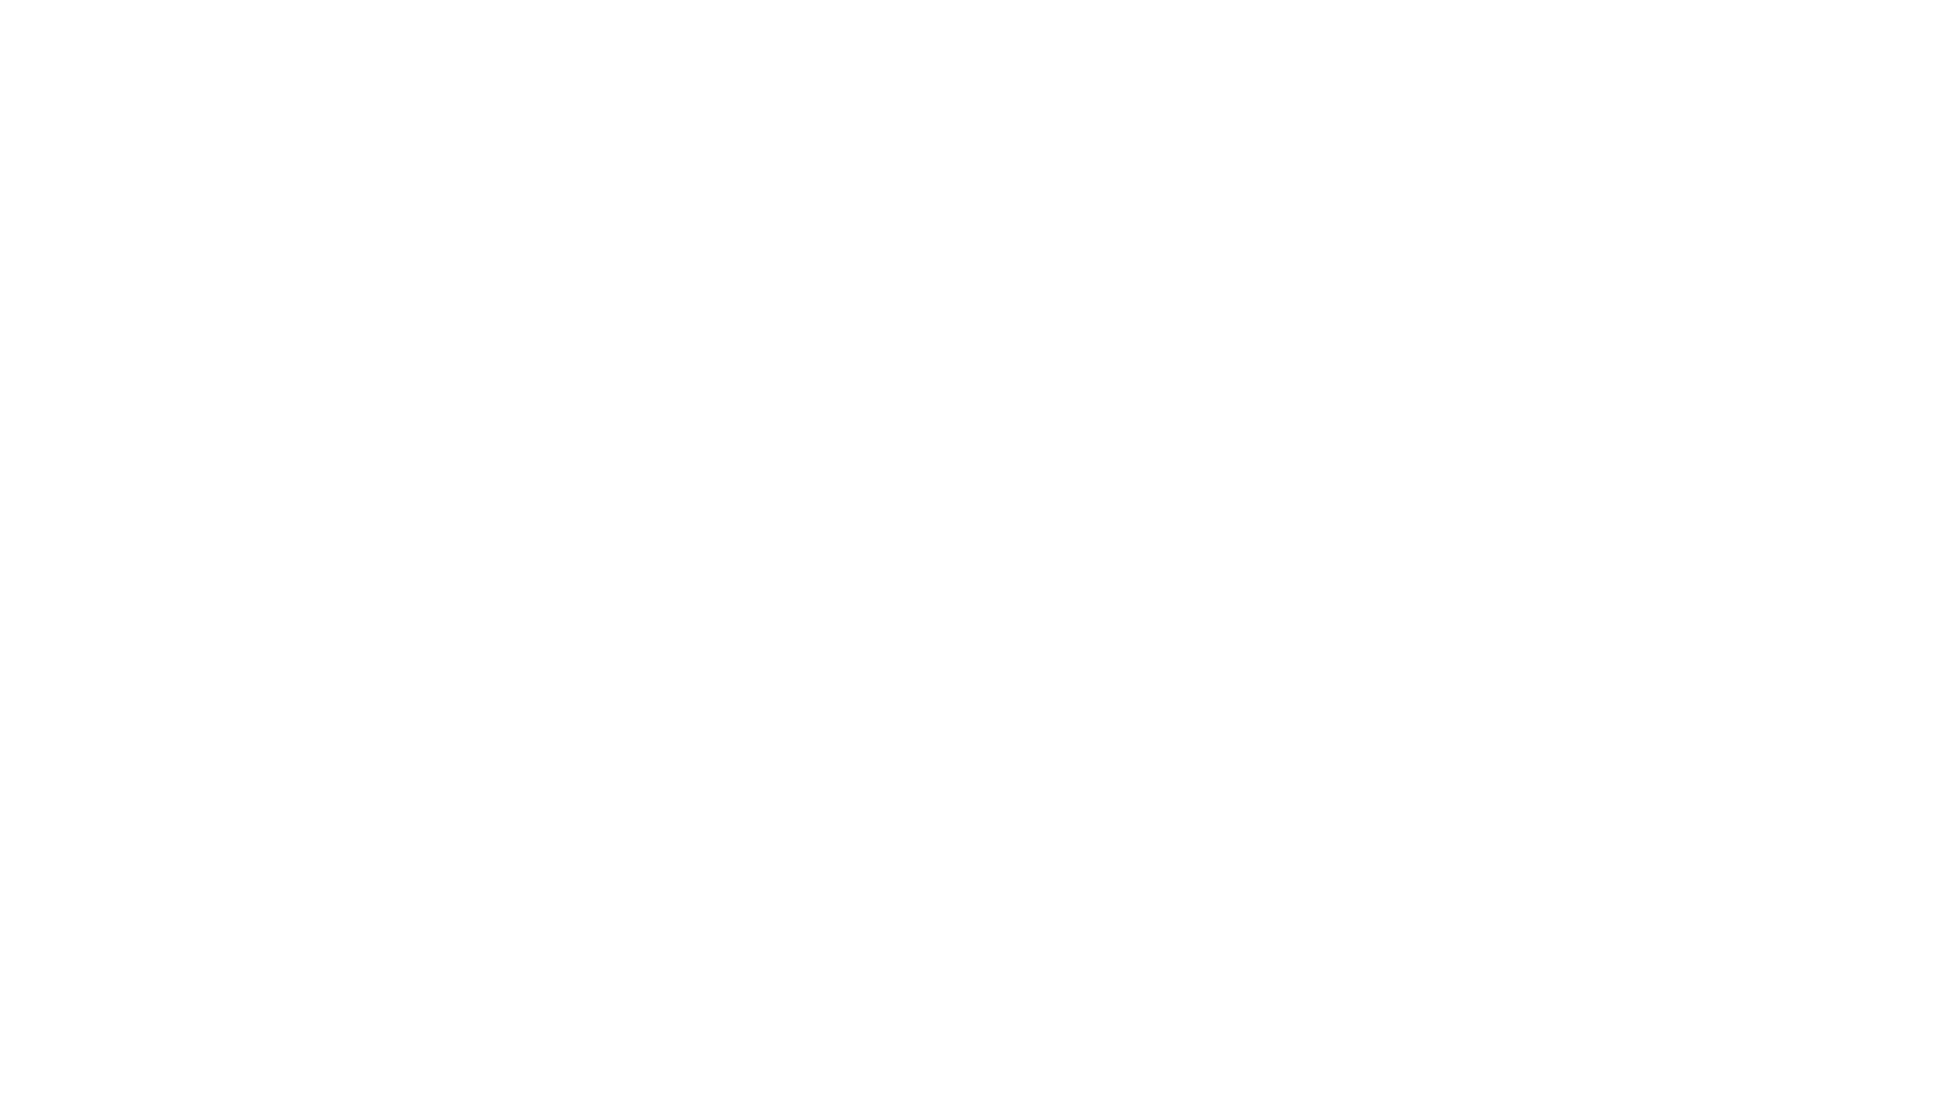

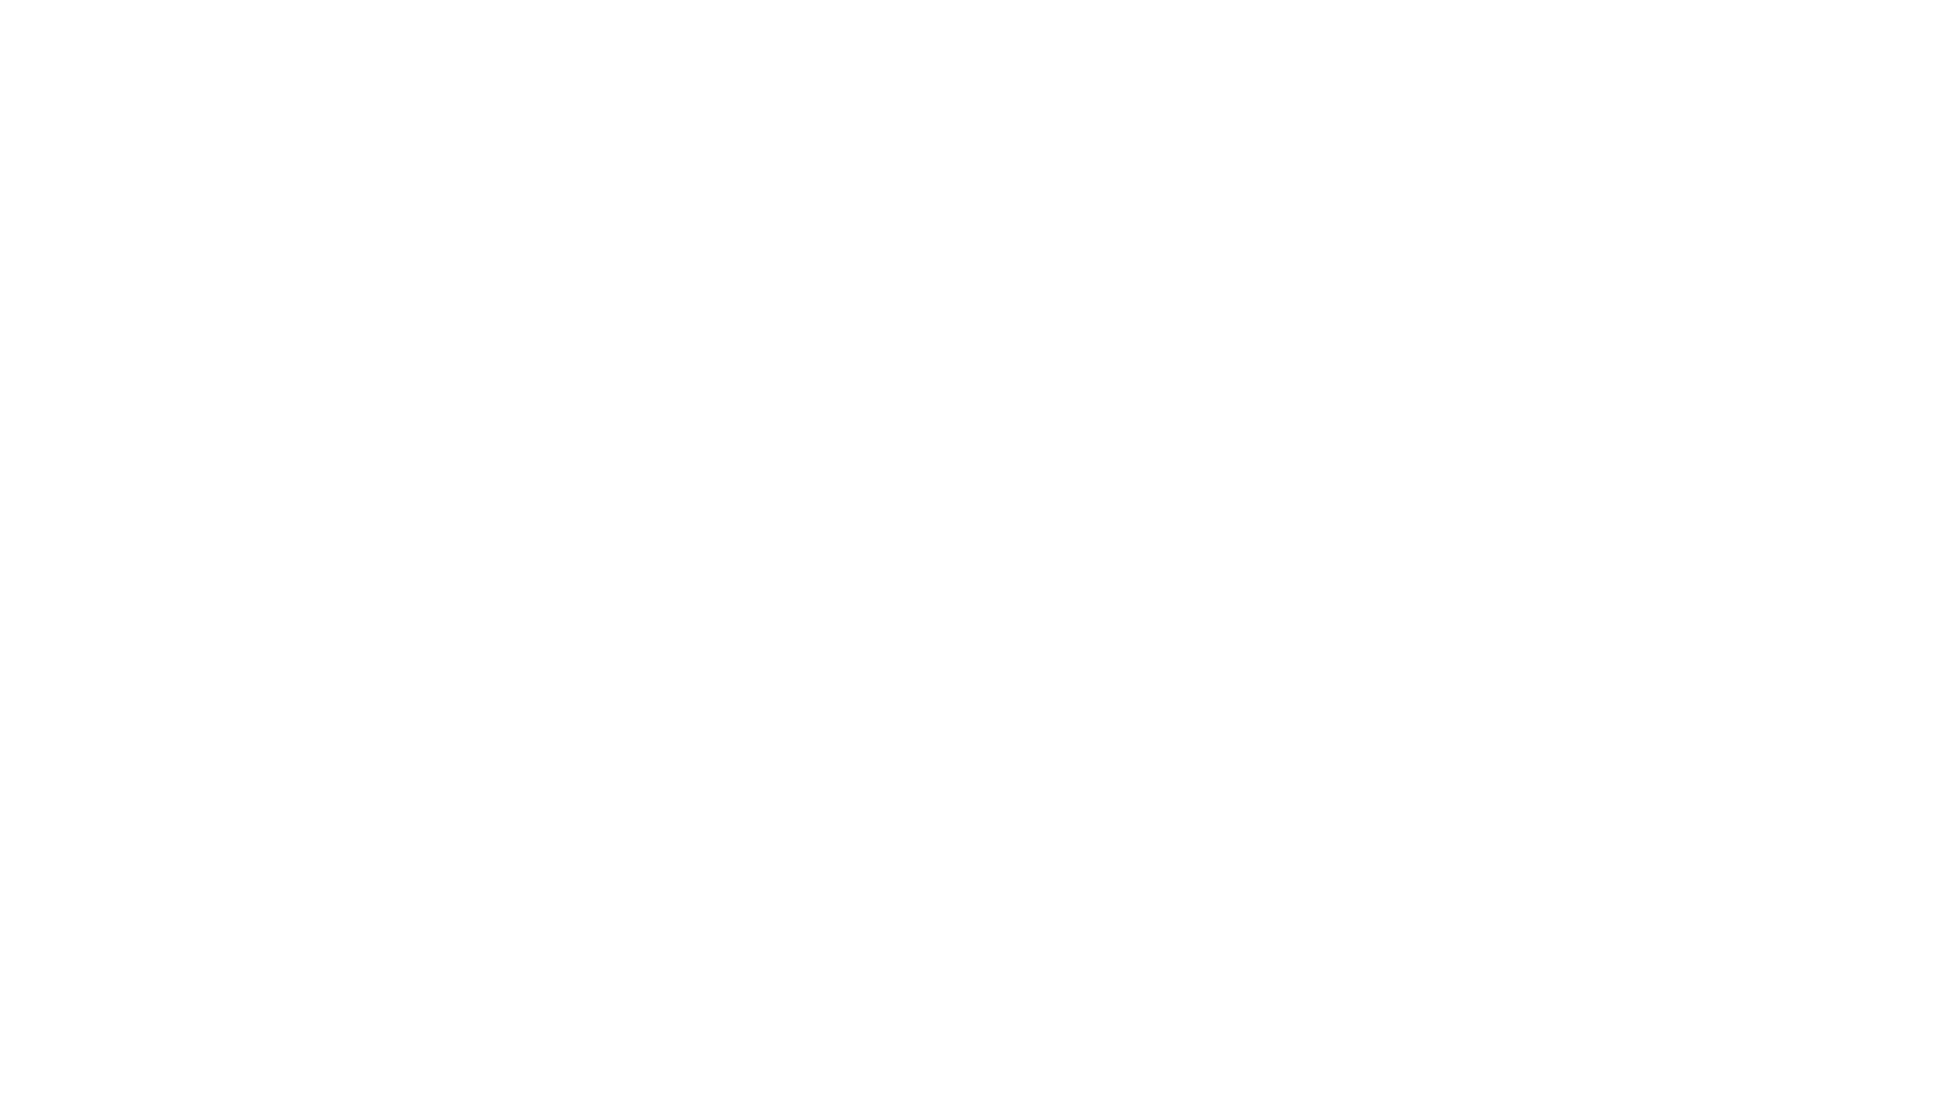

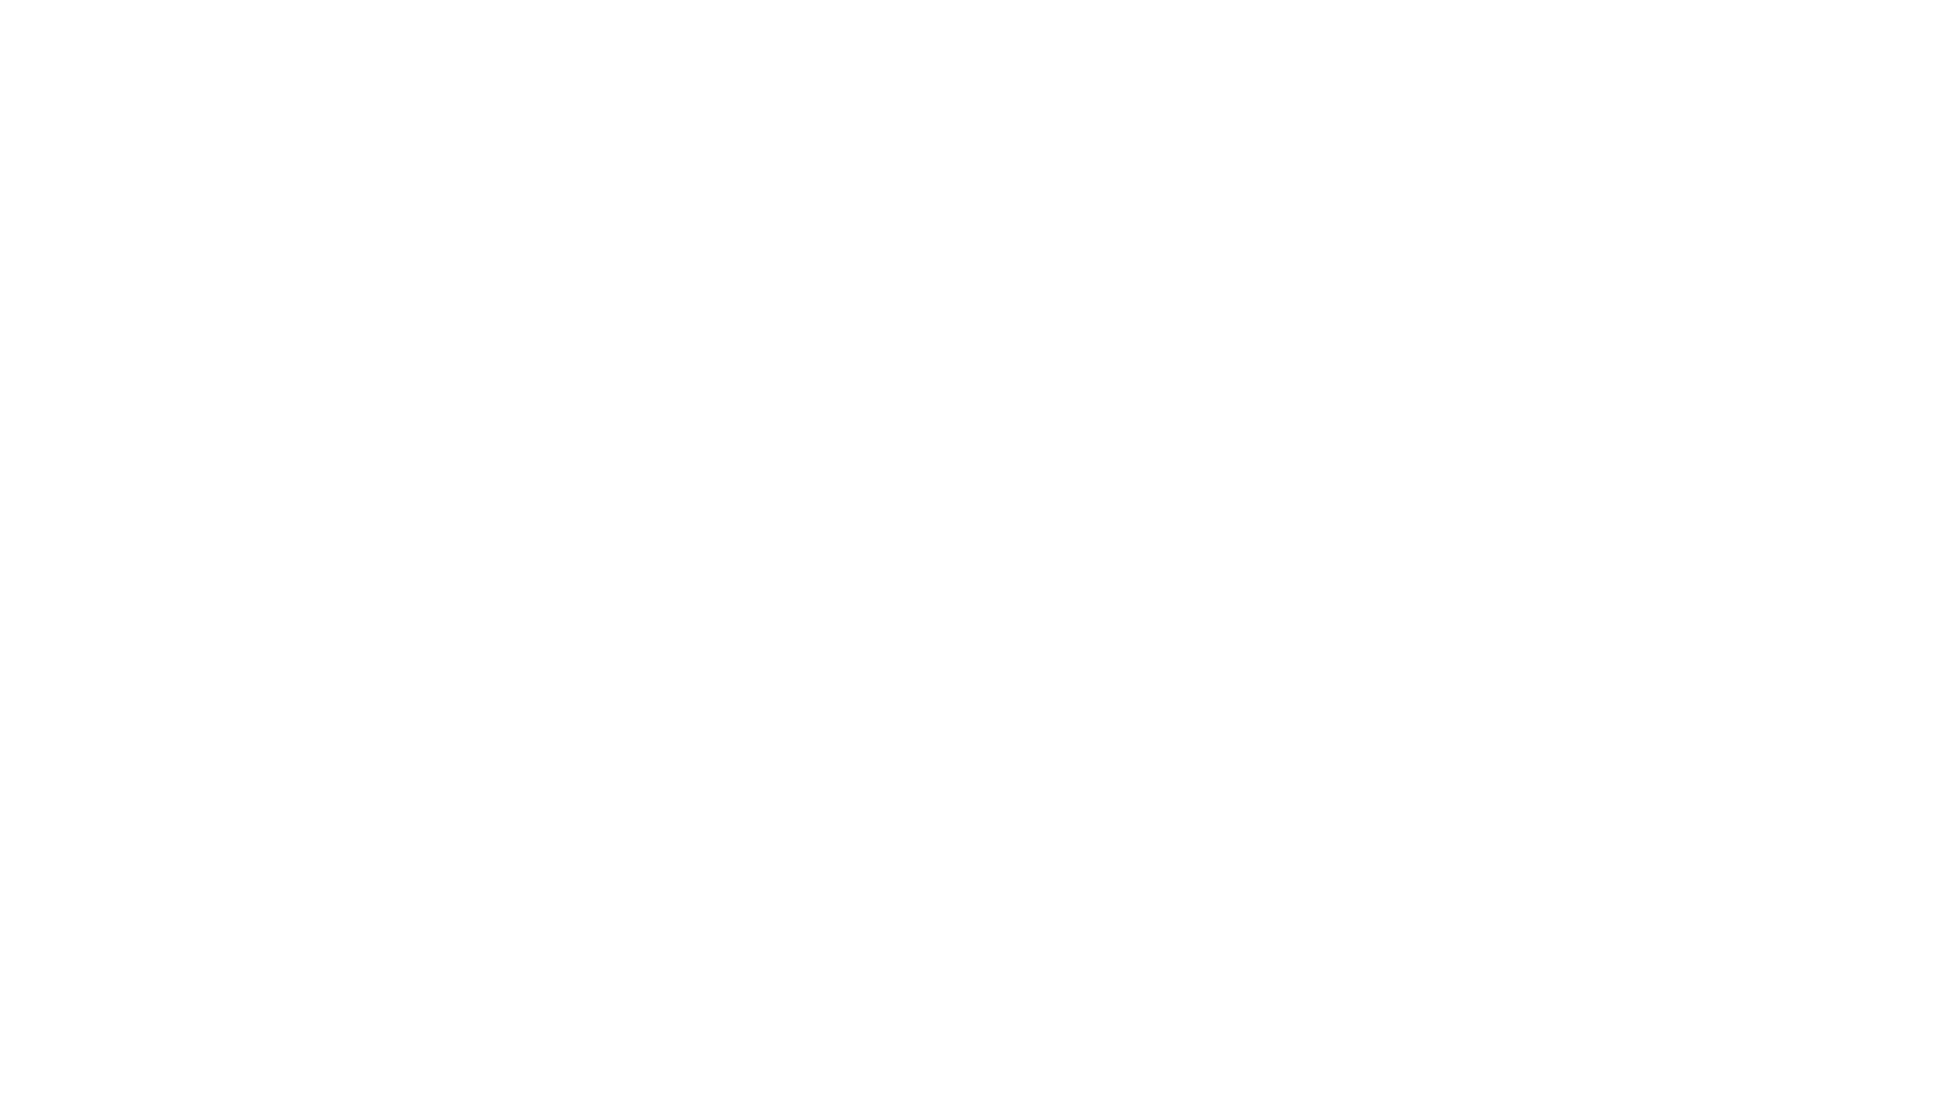

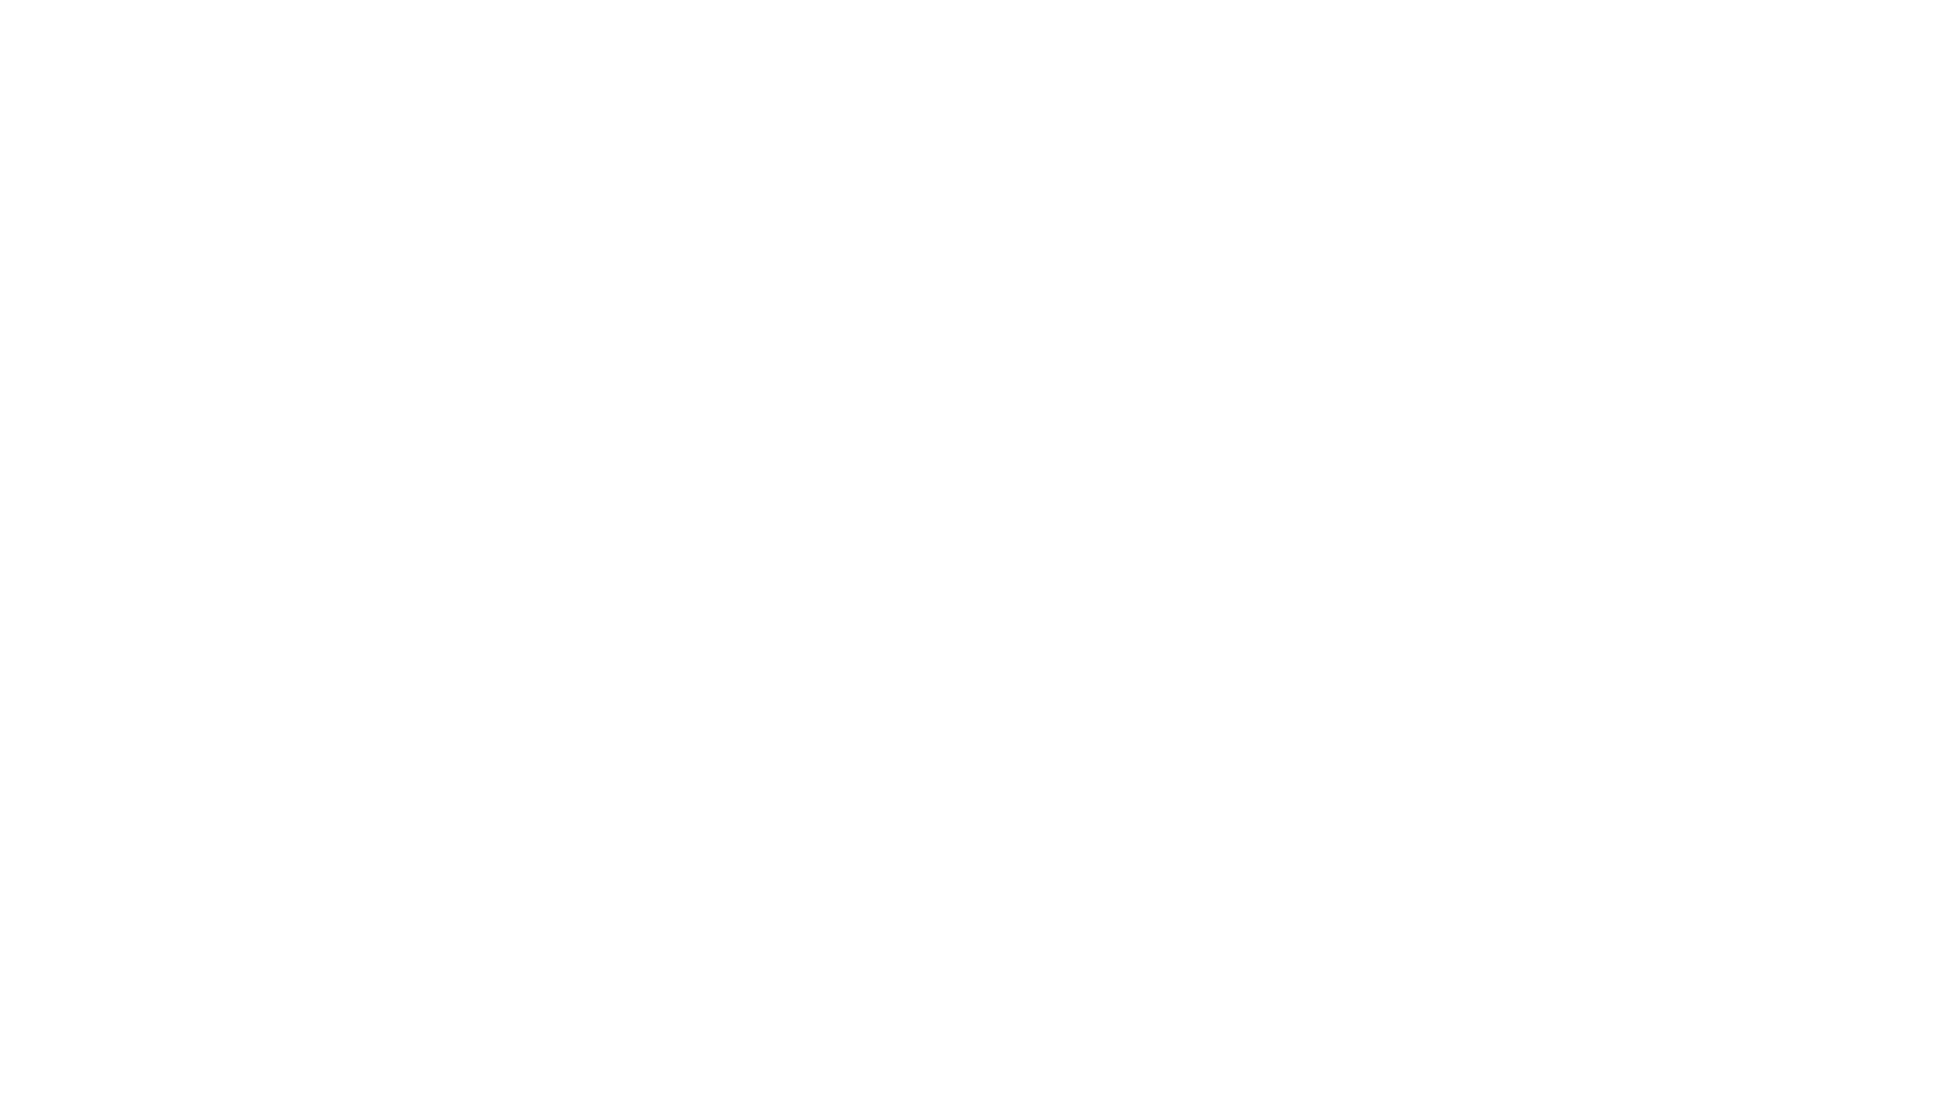

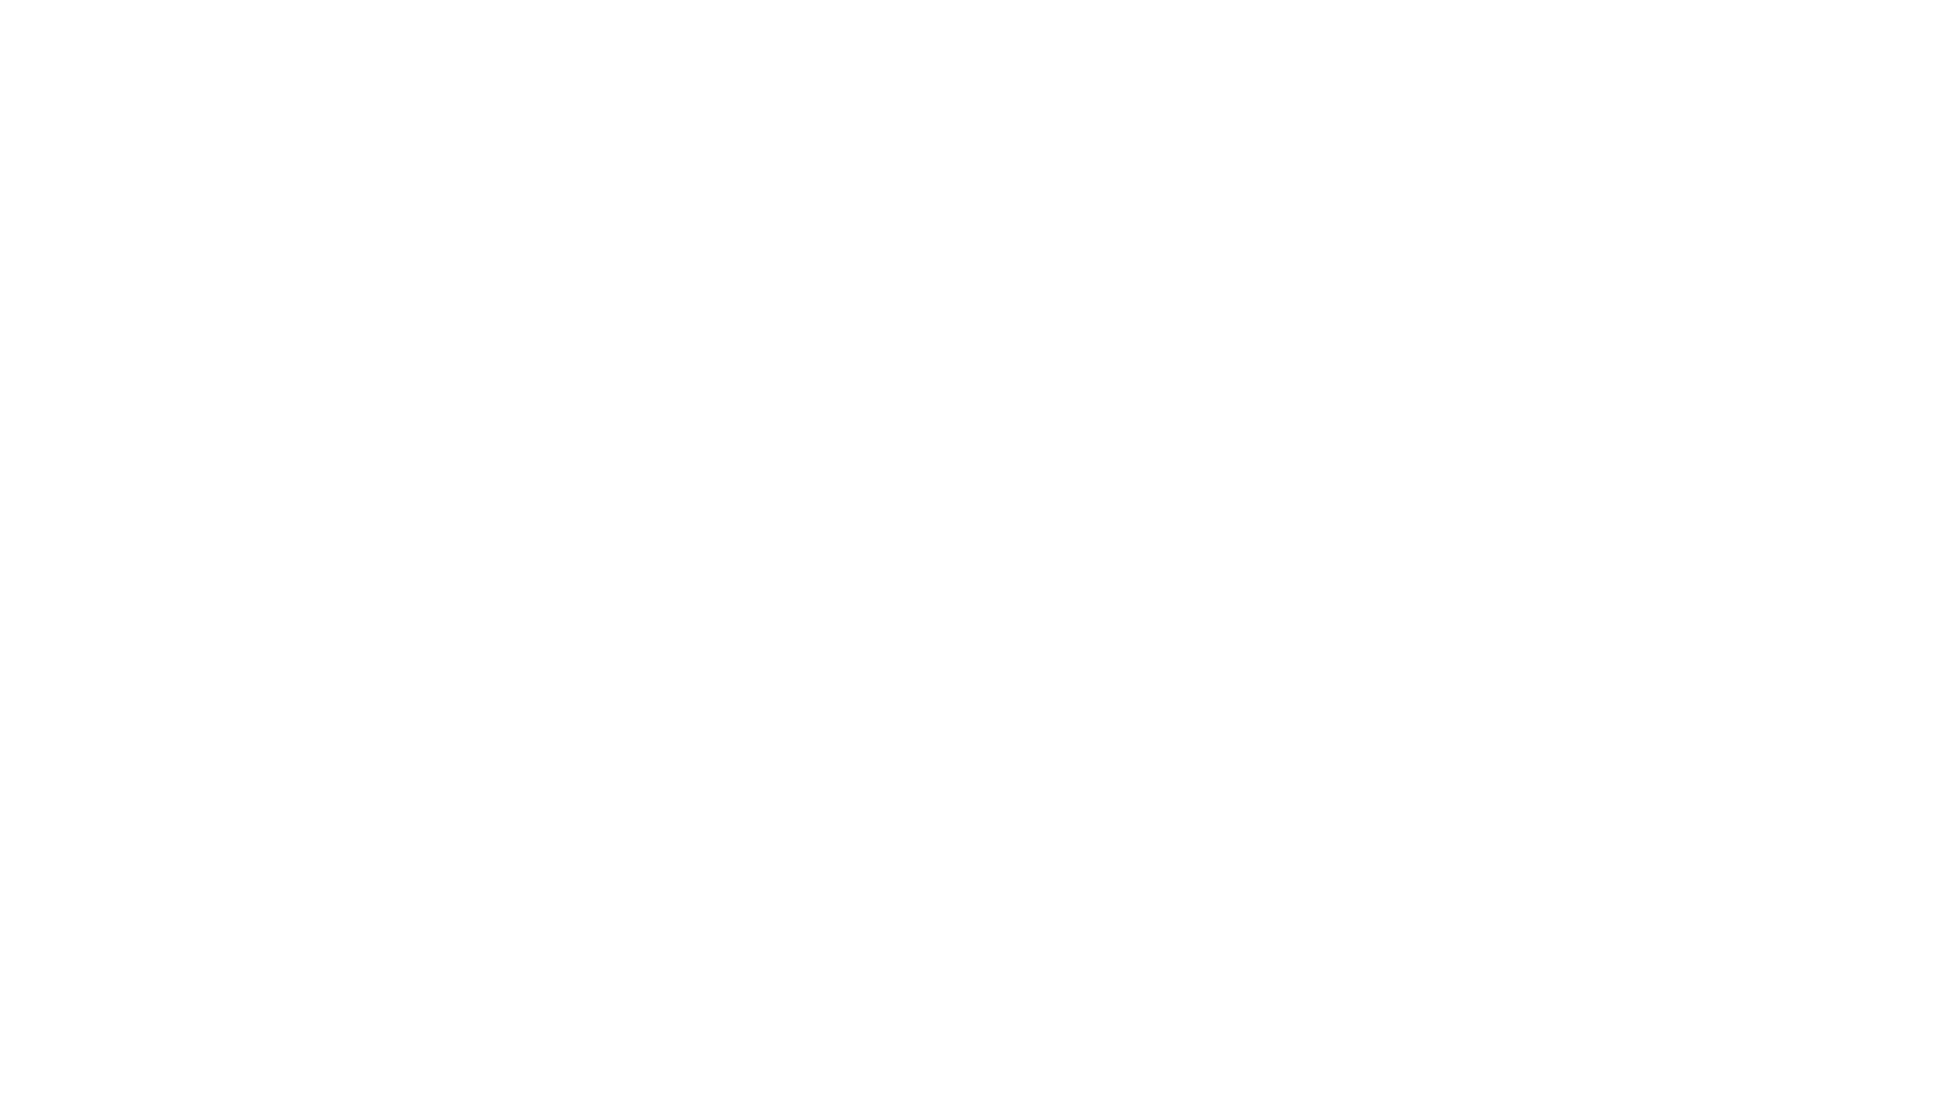

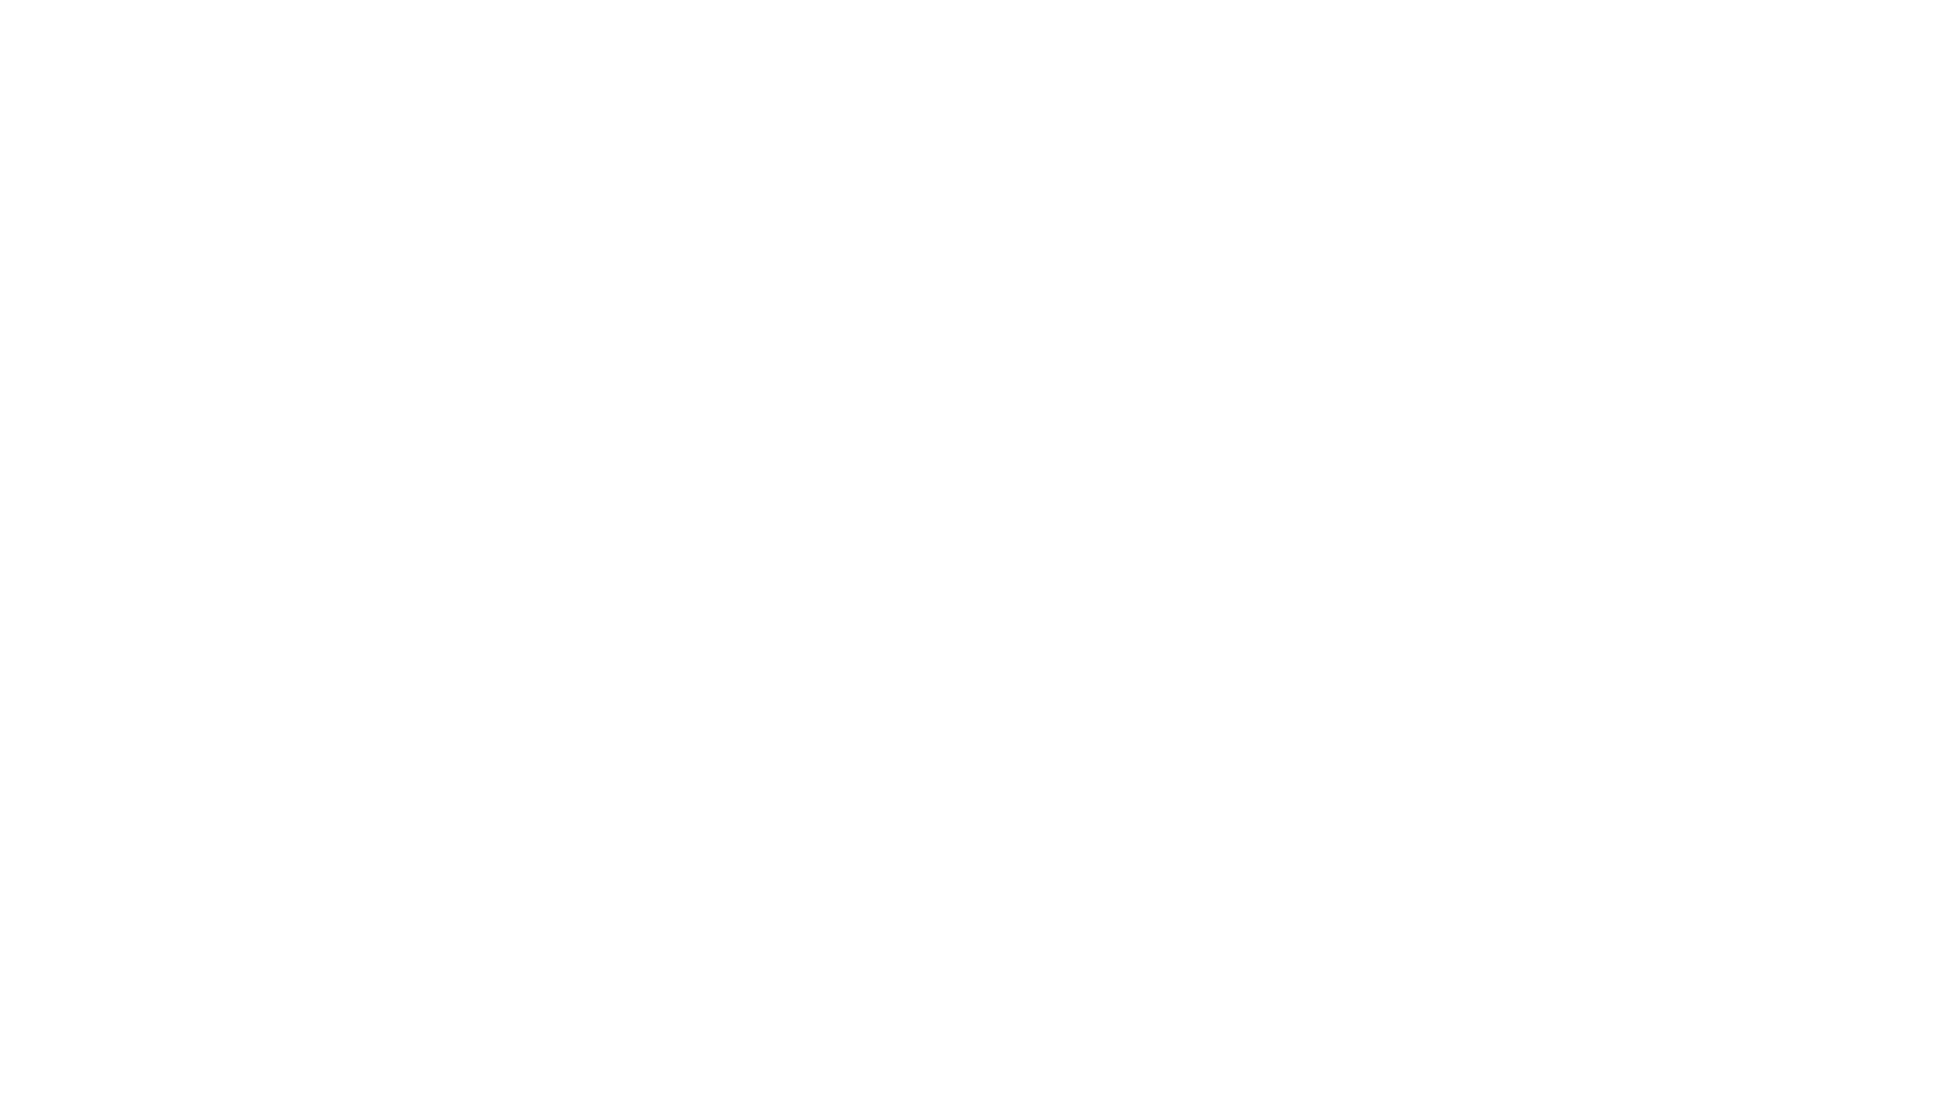

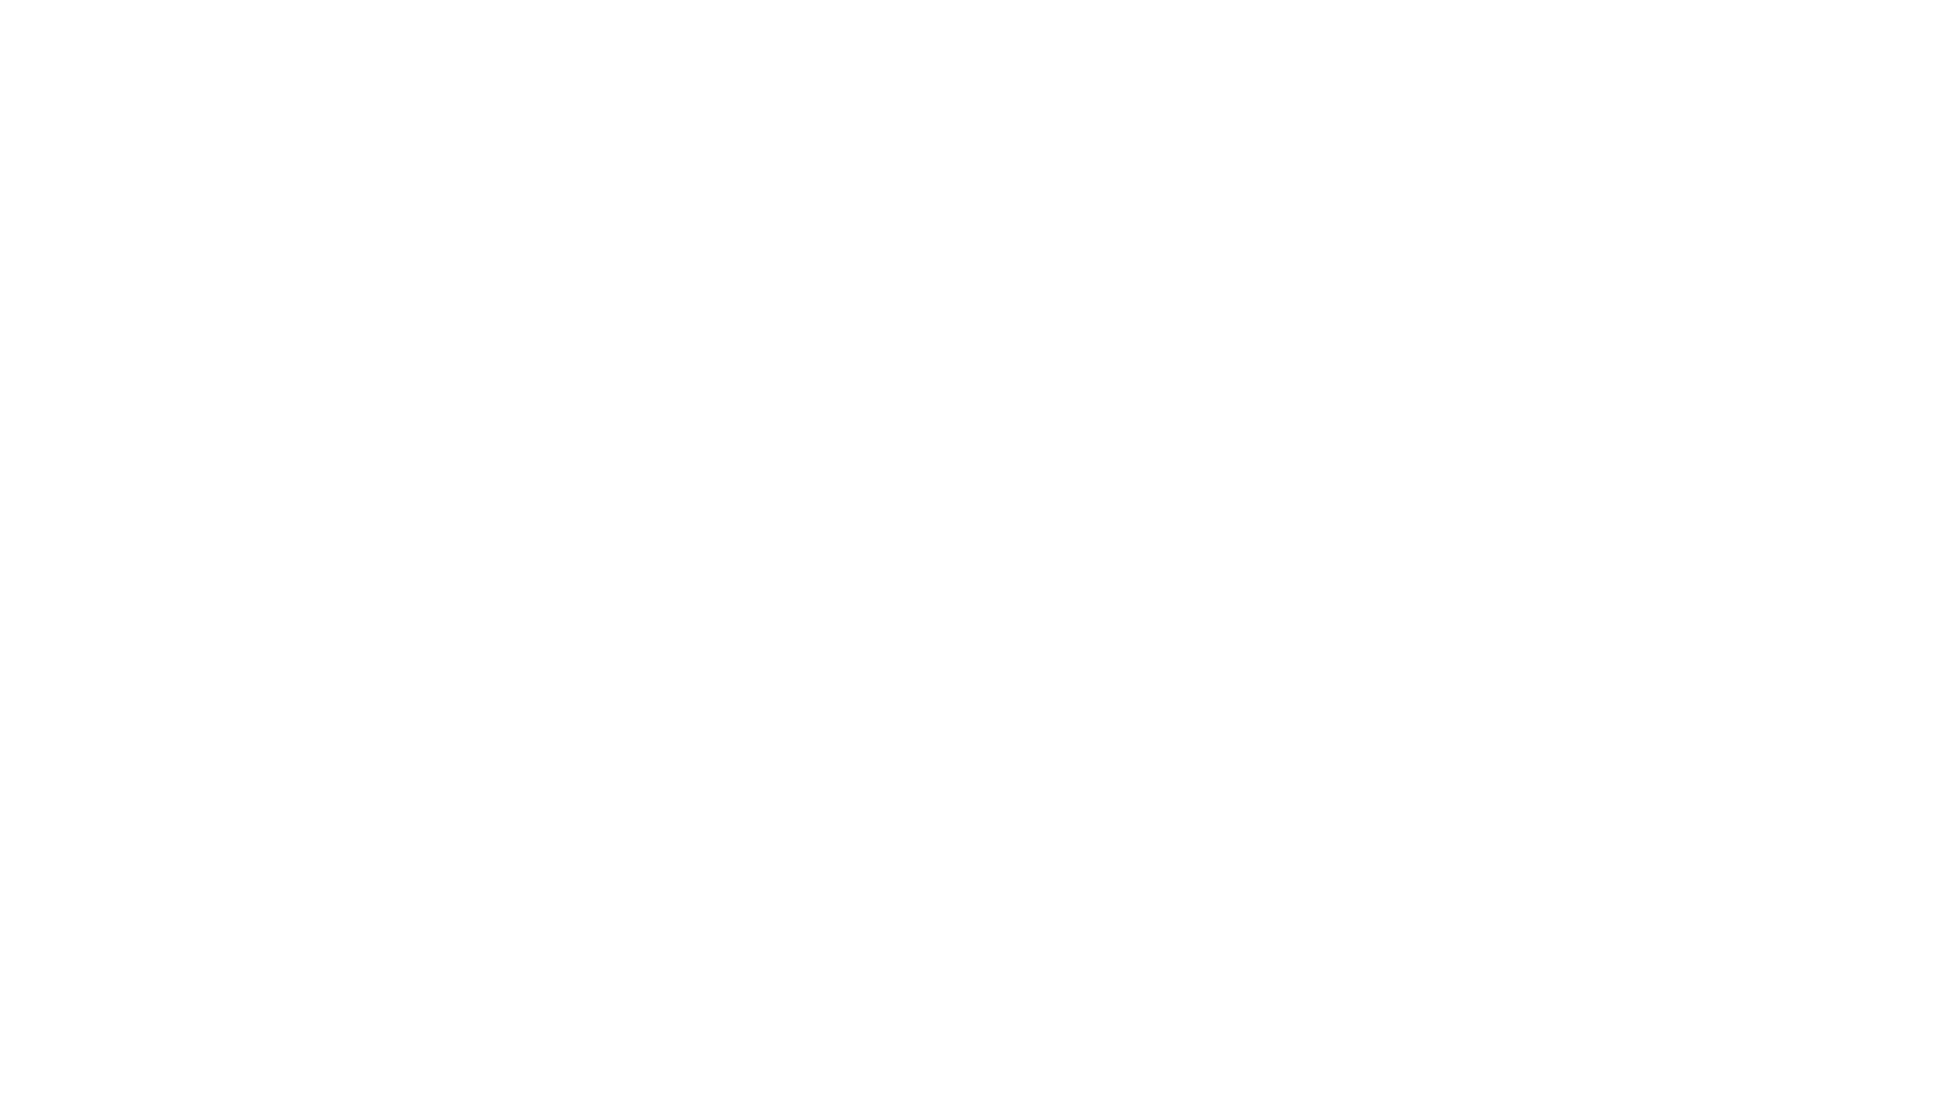

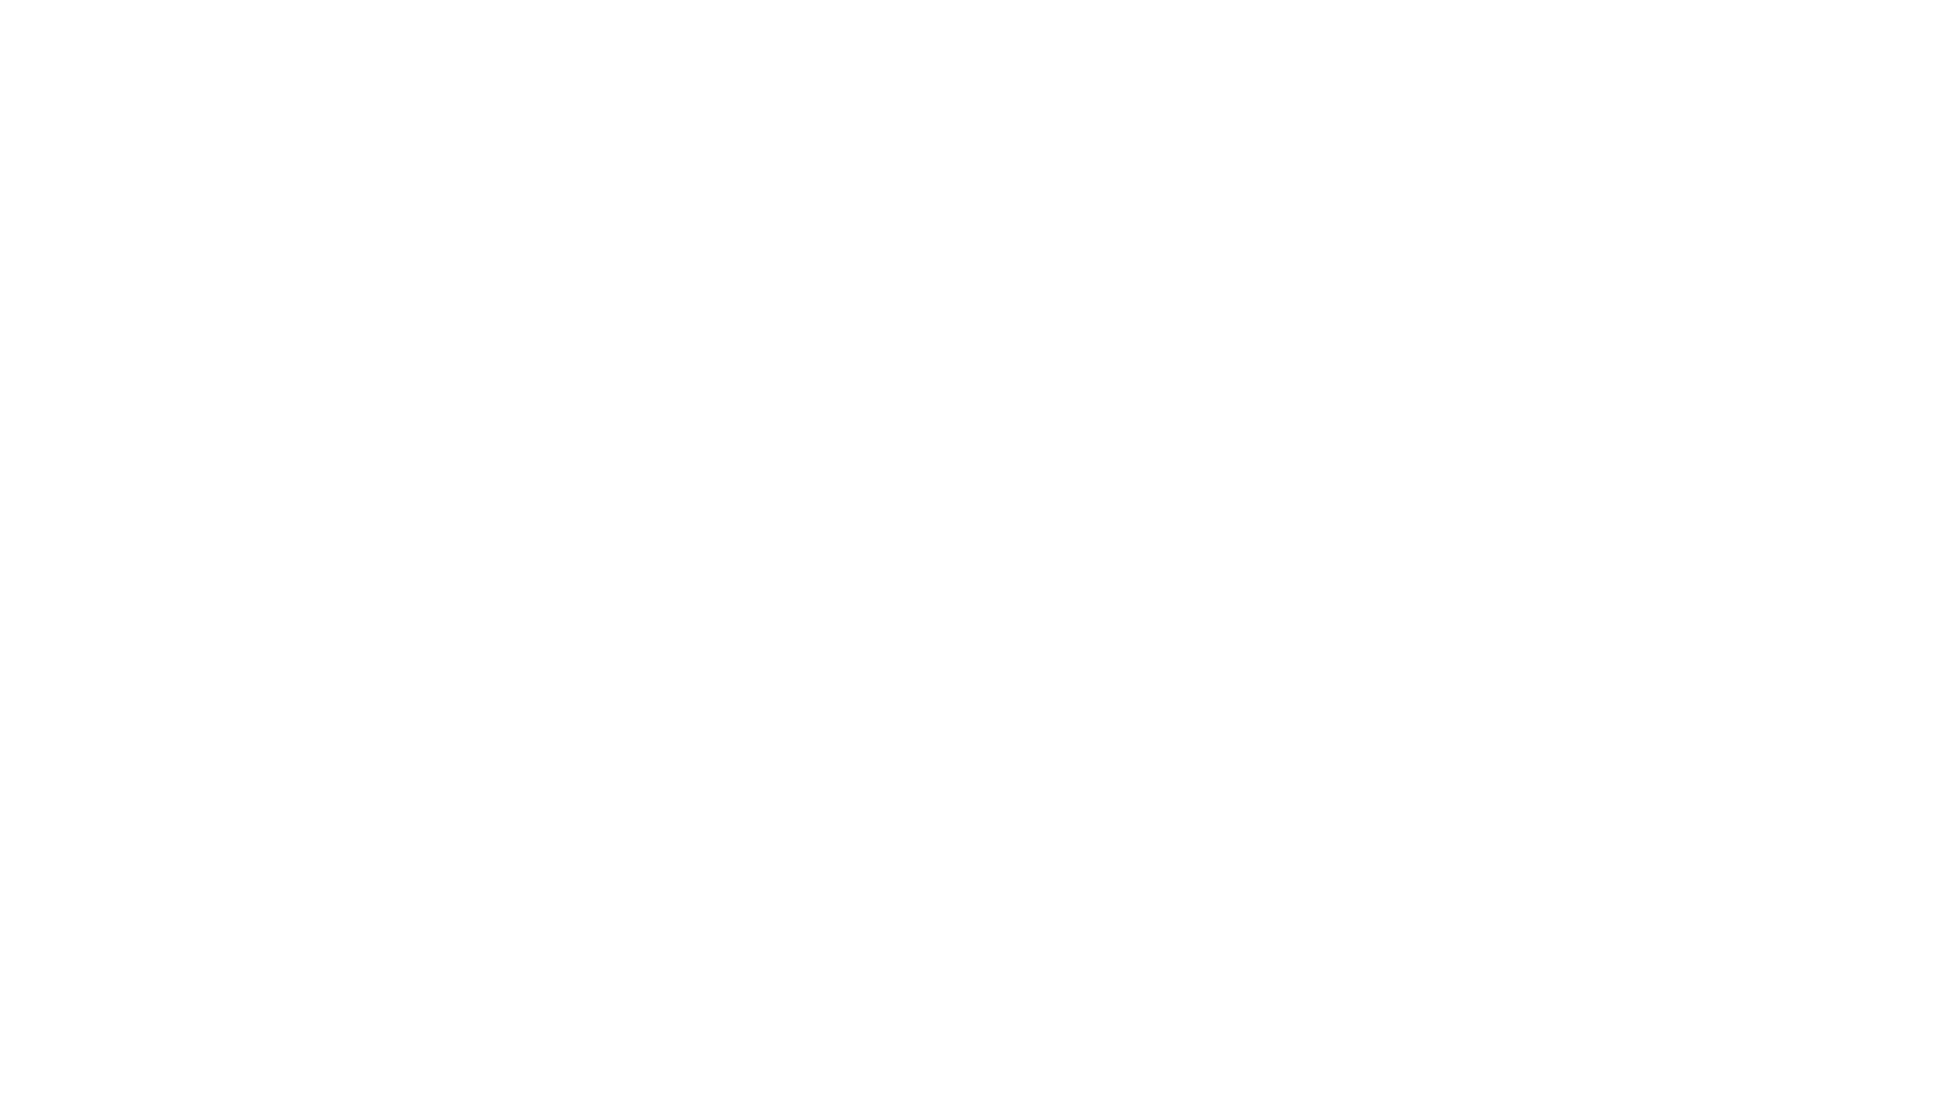

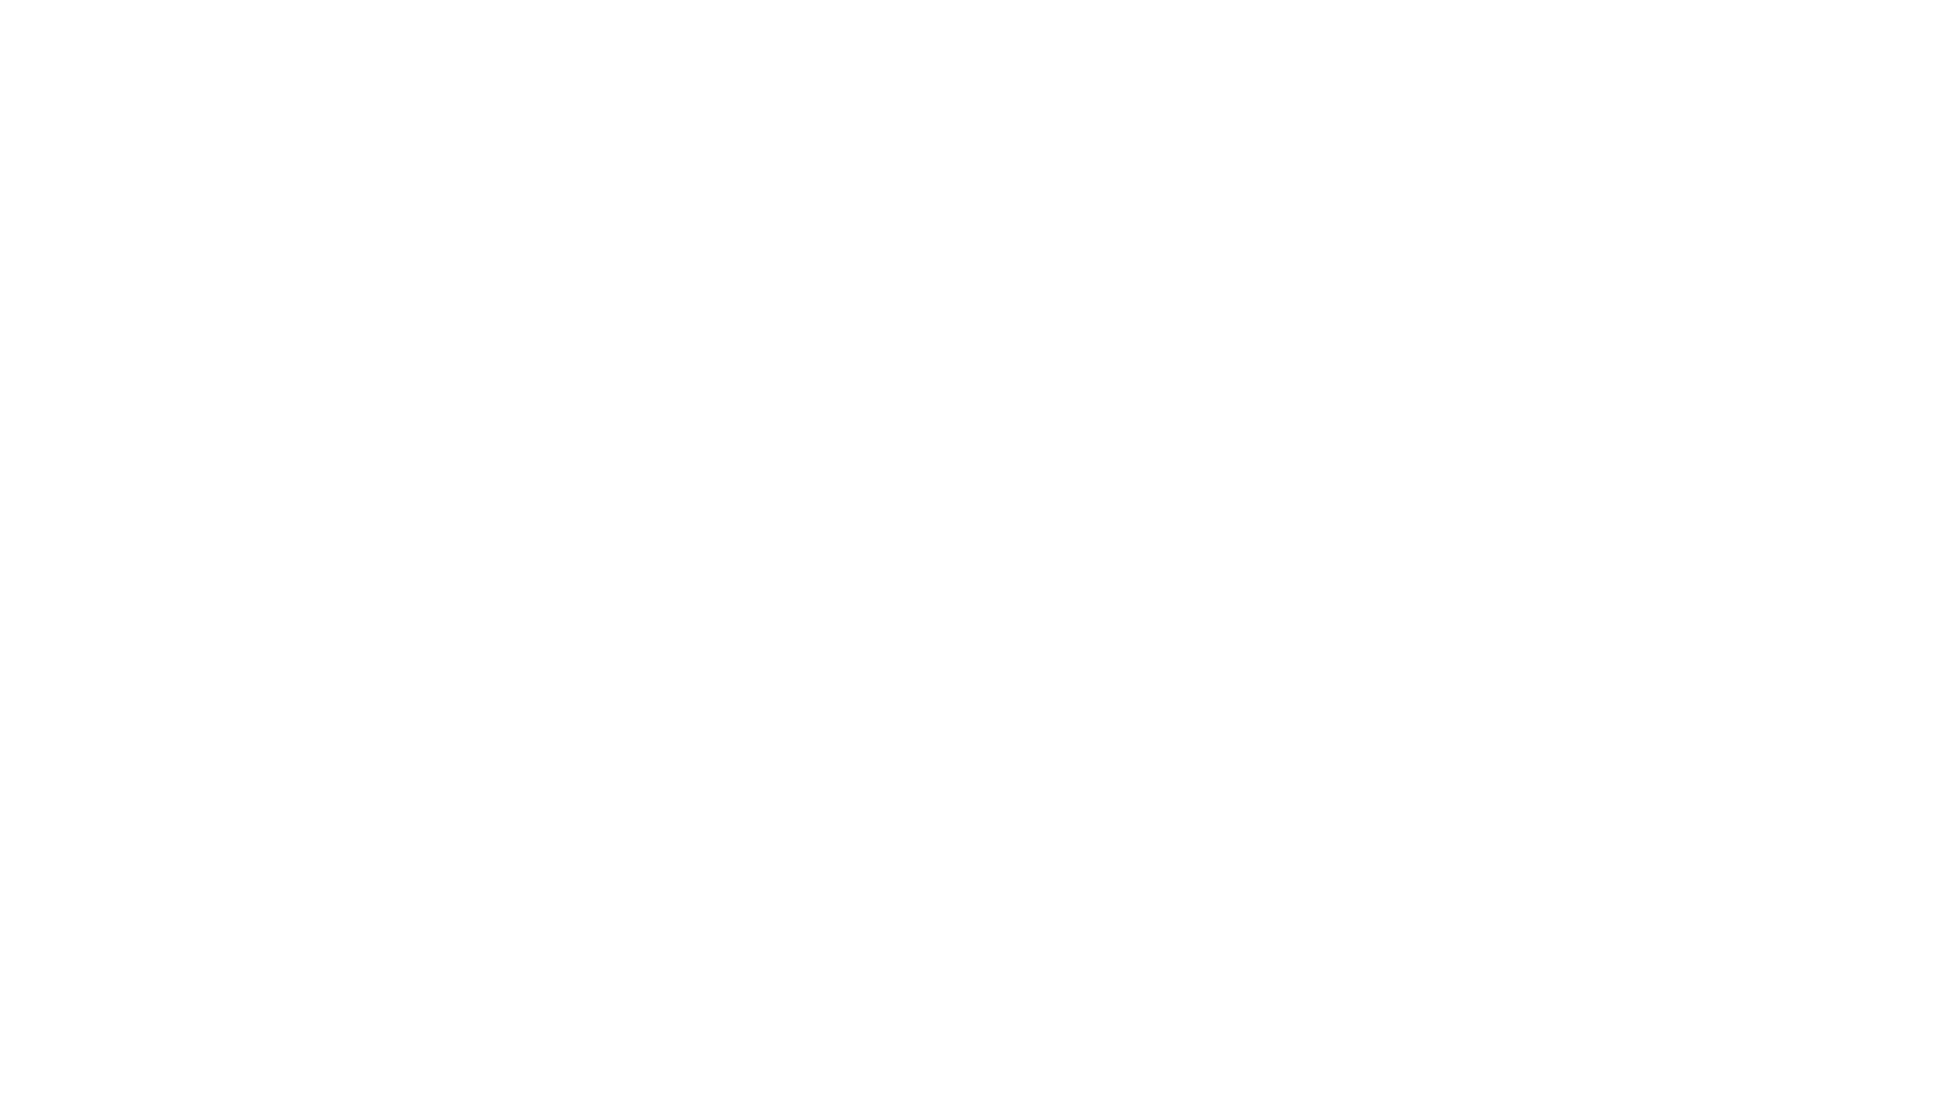

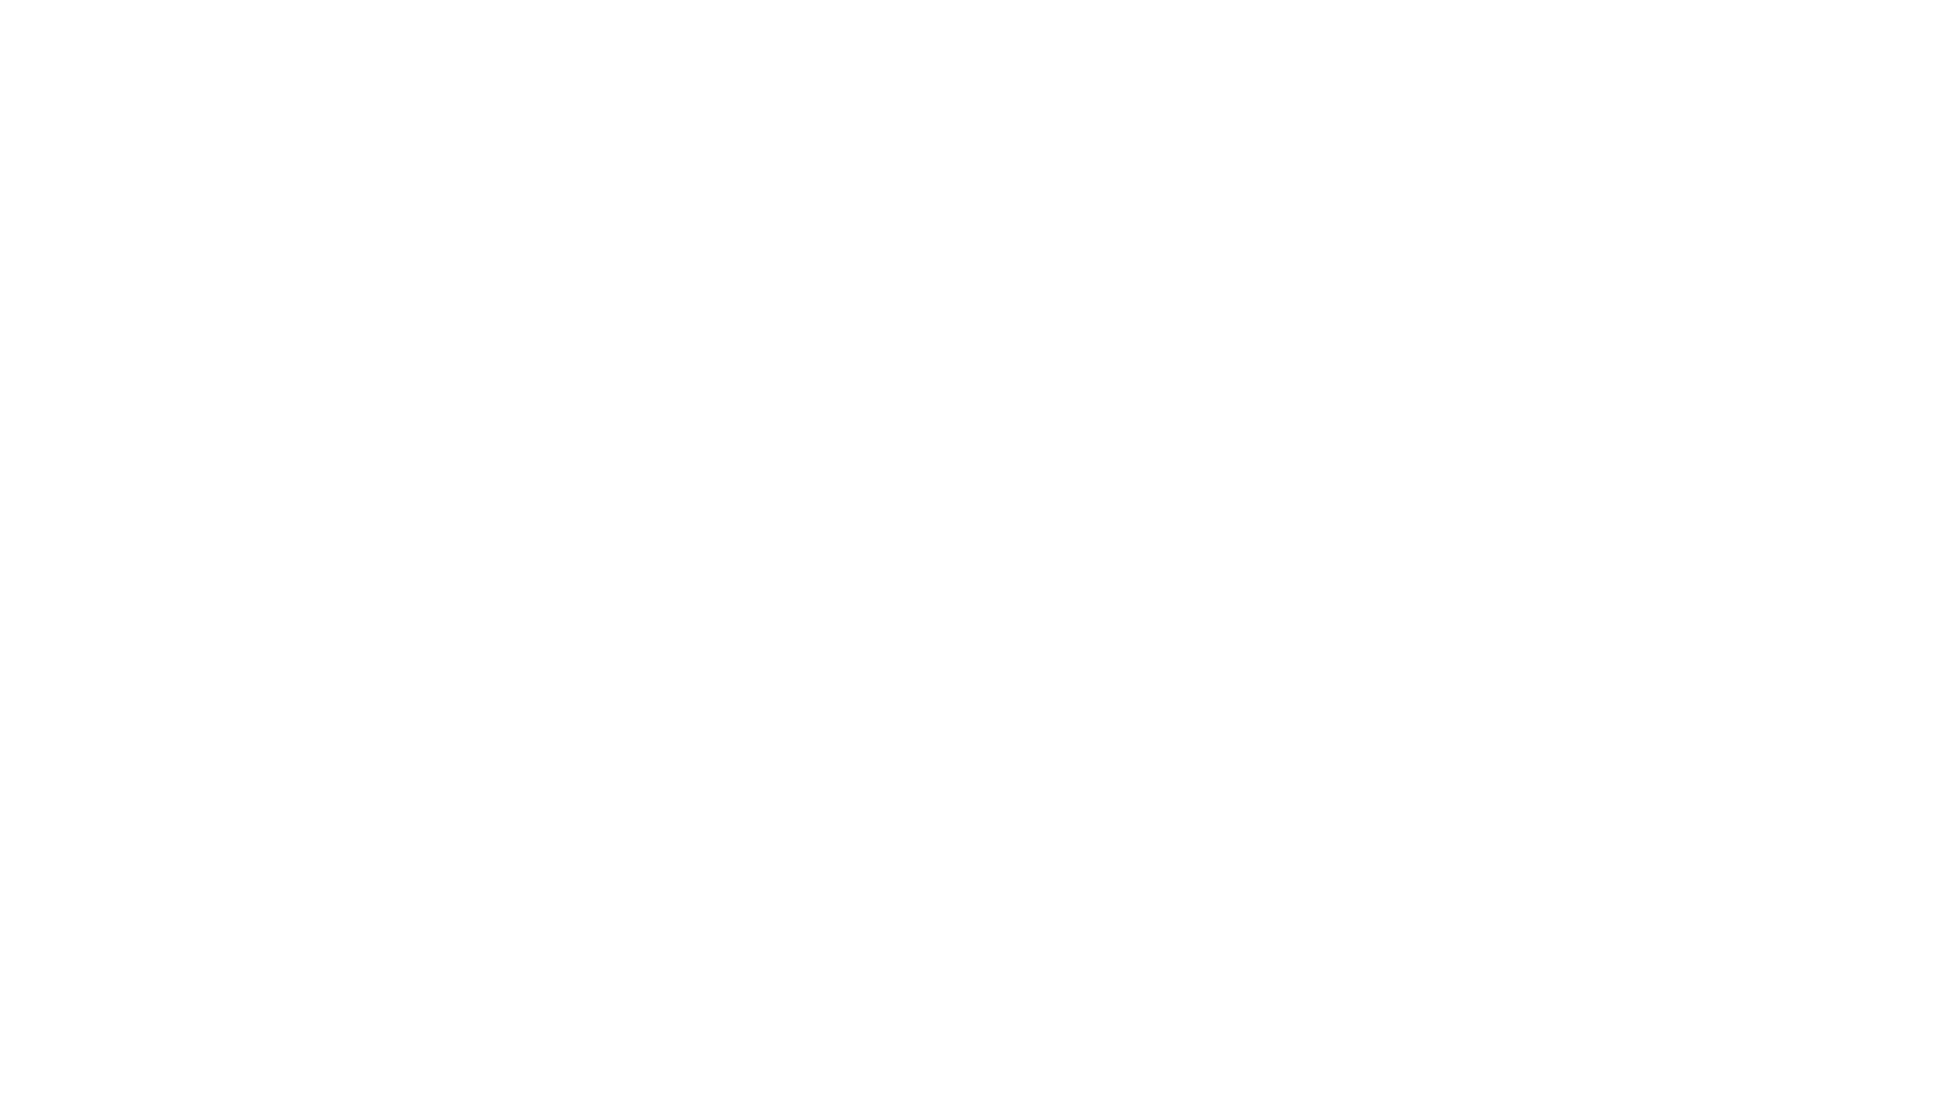

In [7]:
deeplabcut.evaluate_network(path_config_file, Shuffles=[1], plotting=True, gputouse=1)

## Start Analyzing videos
This function analyzes the new video. The user can choose the best model from the evaluation results and specify the correct snapshot index for the variable **snapshotindex** in the **config.yaml** file. Otherwise, by default the most recent snapshot is used to analyse the video.

The results are stored in hd5 file in the same directory where the video resides. 

In [ ]:
videofile_path = ['videos/video3.avi','videos/video4.avi'] #Enter a folder OR a list of videos to analyze.

deeplabcut.analyze_videos(path_config_file,videofile_path, videotype='.avi')

## Extract outlier frames [optional step]

This is an optional step and is used only when the evaluation results are poor i.e. the labels are incorrectly predicted. In such a case, the user can use the following function to extract frames where the labels are incorrectly predicted. This step has many options, so please look at:

In [3]:
# deeplabcut.extract_outlier_frames?

In [ ]:
# deeplabcut.extract_outlier_frames(path_config_file,['/videos/video3.avi']) #pass a specific video

## Refine Labels [optional step]
Following the extraction of outlier frames, the user can use the following function to move the predicted labels to the correct location. Thus augmenting the training dataset. 

In [ ]:
# %gui wx
# deeplabcut.refine_labels(path_config_file)

**NOTE:** Afterwards, if you want to look at the adjusted frames, you can load them in the main GUI by running: ``deeplabcut.label_frames(path_config_file)``

(you can add a new "cell" below to add this code!)

#### Once all folders are relabeled, check the labels again! If you are not happy, adjust them in the main GUI:

``deeplabcut.label_frames(path_config_file)``

Check Labels:

``deeplabcut.check_labels(path_config_file)``

In [ ]:
#NOW, merge this with your original data:

# deeplabcut.merge_datasets(path_config_file)

## Create a new iteration of training dataset [optional step]
Following the refinement of labels and appending them to the original dataset, this creates a new iteration of training dataset. This is automatically set in the config.yaml file, so let's get training!

In [ ]:
# deeplabcut.create_training_dataset(path_config_file)

## Create labeled video
This function is for visualiztion purpose and can be used to create a video in .mp4 format with labels predicted by the network. This video is saved in the same directory where the original video resides. 

THIS HAS MANY FUN OPTIONS! 

``deeplabcut.create_labeled_video(config, videos, videotype='avi', shuffle=1, trainingsetindex=0, filtered=False, save_frames=False, Frames2plot=None, delete=False, displayedbodyparts='all', codec='mp4v', outputframerate=None, destfolder=None, draw_skeleton=False, trailpoints=0, displaycropped=False)``

So please check:

In [4]:
deeplabcut.create_labeled_video?

In [ ]:
deeplabcut.create_labeled_video(path_config_file,videofile_path)

## Plot the trajectories of the analyzed videos
This function plots the trajectories of all the body parts across the entire video. Each body part is identified by a unique color.

In [ ]:
# %matplotlib notebook #for making interactive plots.
# deeplabcut.plot_trajectories(path_config_file,videofile_path)